In [632]:
# %%writefile requirements.txt
# pandas
# numpy
# matplotlib
# geopandas
# cartopy
# rasterio
# atlite
# networkx
# pypsa
# highspy
# xarray
# rioxarray


In [633]:
# from google.colab import drive
# drive.mount('/content/drive')

In [634]:
# !pip install -r requirements.txt

In [635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
#import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio as rio 
import atlite
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
from rasterio.plot import show
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import networkx as nx
import pypsa
import country_converter as coco
import xarray as xr
import os

In [636]:
path = "gadm_410-levels-ADM_1-NLD.gpkg"

In [637]:
country = gpd.read_file(path)

In [638]:
country.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<GeoAxes: >

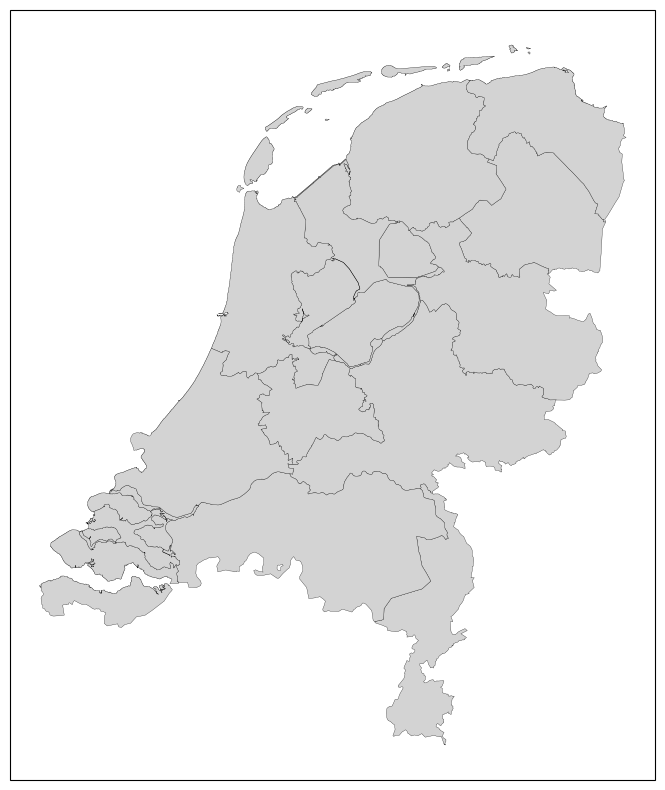

In [639]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.EqualEarth()}, figsize=(10, 10))

country.plot(ax=ax, edgecolor="black", facecolor = "lightgrey", linewidth = 0.2)


In [640]:
ocean = gpd.read_file("eez_v11.gpkg")

In [641]:
ocean.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [642]:
ocean_nld = ocean[ocean["SOVEREIGN1"] == "Netherlands"]
ocean_nld

MRGID                                 GEONAME  MRGID_TER1 POL_TYPE  \
61   26519.0          Aruban Exclusive Economic Zone      8652.0    200NM   
66   26520.0         Bonaire Exclusive Economic Zone     15074.0    200NM   
74   26517.0       Curaçaoan Exclusive Economic Zone     19143.0    200NM   
92   26518.0            Saba Exclusive Economic Zone     19095.0    200NM   
94   26526.0  Sint-Eustatius Exclusive Economic Zone     26525.0    200NM   
100  21803.0    Sint-Maarten Exclusive Economic Zone     21802.0    200NM   
216   5668.0           Dutch Exclusive Economic Zone        15.0    200NM   

     MRGID_SOV1      TERRITORY1 ISO_TER1   SOVEREIGN1  MRGID_TER2  MRGID_SOV2  \
61         15.0           Aruba      ABW  Netherlands         0.0         0.0   
66         15.0         Bonaire      BES  Netherlands         0.0         0.0   
74         15.0         Curaçao      CUW  Netherlands         0.0         0.0   
92         15.0            Saba      BES  Netherlands         0.0         0.0   
94         15.0  Sint-Eustatius      BES  Netherlands         0.0         0.0   
100        15.0    Sint-Maarten      SXM  Netherlands         0.0         0.0   
216        15.0     Netherlands      NLD  Netherlands         0.0         0.0   

     ... ISO_SOV1 ISO_SOV2 ISO_SOV3  UN_SOV1  UN_SOV2 UN_SOV3 UN_TER1 UN_TER2  \
61   ...      NLD     None     None      528      NaN     NaN   533.0     NaN   
66   ...      NLD     None     None      528      NaN     NaN   535.0     NaN   
74   ...      NLD     None     None      528      NaN     NaN   531.0     NaN   
92   ...      NLD     None     None      528      NaN     NaN   535.0     NaN   
94   ...      NLD     None     None      528      NaN     NaN   535.0     NaN   
100  ...      NLD     None     None      528      NaN     NaN   534.0     NaN   
216  ...      NLD     None     None      528      NaN     NaN   528.0     NaN   

     UN_TER3                                           geometry  
61       NaN  MULTIPOLYGON (((-68.87017 15.24185, -68.88133 ...  
66       NaN  MULTIPOLYGON (((-68.40522 11.66667, -68.42272 ...  
74       NaN  MULTIPOLYGON (((-68.86222 15.24111, -68.55902 ...  
92       NaN  MULTIPOLYGON (((-63.28635 17.87370, -63.26729 ...  
94       NaN  MULTIPOLYGON (((-62.76955 17.64394, -62.80457 ...  
100      NaN  MULTIPOLYGON (((-63.01457 18.05186, -63.01409 ...  
216      NaN  MULTIPOLYGON (((7.21028 53.24417, 7.20750 53.2...  

[7 rows x 32 columns]

In [643]:
ocean_nld["GEONAME"]

61             Aruban Exclusive Economic Zone
66            Bonaire Exclusive Economic Zone
74          Curaçaoan Exclusive Economic Zone
92               Saba Exclusive Economic Zone
94     Sint-Eustatius Exclusive Economic Zone
100      Sint-Maarten Exclusive Economic Zone
216             Dutch Exclusive Economic Zone
Name: GEONAME, dtype: object

<GeoAxes: >

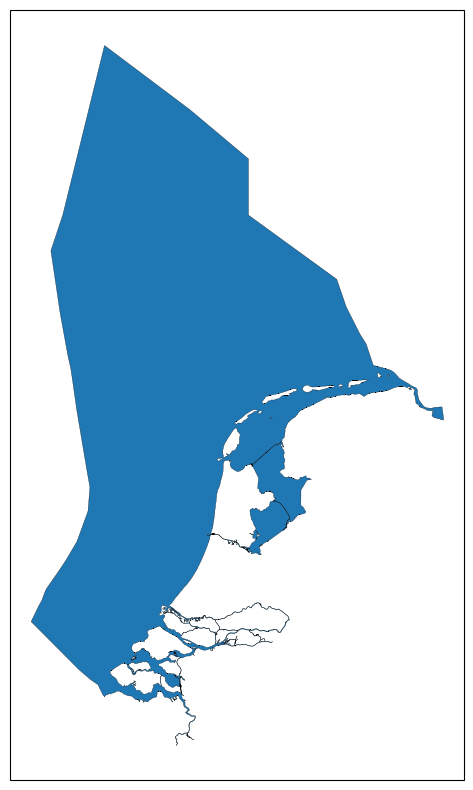

In [644]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.EqualEarth()}, figsize=(10, 10))

ocean_nld[ocean_nld.index.isin([216])].plot(ax=ax, edgecolor="black", linewidth = 0.2)

# Splitting EEZ and Netherlands into regions

In [645]:
eez_nld_4326 = ocean_nld.copy()
eez_nld_4326 = eez_nld_4326[eez_nld_4326["GEONAME"] == "Dutch Exclusive Economic Zone"]
eez_nld_4326["region"] = [6]


<GeoAxes: >

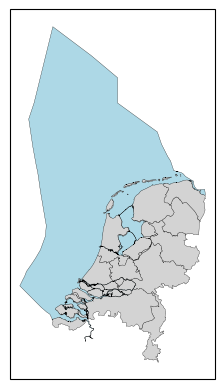

In [646]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.EqualEarth()})

country.plot(ax=ax, edgecolor="black", facecolor="lightgrey",linewidth = 0.2)
ocean_nld[ocean_nld.index.isin([216])].plot(ax=ax, edgecolor="black", facecolor="lightblue",linewidth = 0.2)


In [647]:
nld_4326 = country.copy()
nld_4326

GID_0     GID_1      COUNTRY         NAME_1  \
0    NLD   NLD.1_1  Netherlands        Drenthe   
1    NLD   NLD.2_1  Netherlands      Flevoland   
2    NLD   NLD.3_1  Netherlands        Fryslân   
3    NLD   NLD.4_1  Netherlands     Gelderland   
4    NLD   NLD.5_1  Netherlands      Groningen   
5    NLD   NLD.6_1  Netherlands     IJsselmeer   
6    NLD   NLD.7_1  Netherlands        Limburg   
7    NLD   NLD.8_1  Netherlands  Noord-Brabant   
8    NLD   NLD.9_1  Netherlands  Noord-Holland   
9    NLD  NLD.10_1  Netherlands     Overijssel   
10   NLD  NLD.11_1  Netherlands        Utrecht   
11   NLD  NLD.12_1  Netherlands        Zeeland   
12   NLD  NLD.13_1  Netherlands  Zeeuwse meren   
13   NLD  NLD.14_1  Netherlands             NA   

                                             geometry  
0   MULTIPOLYGON (((6.52366 52.64551, 6.52366 52.6...  
1   MULTIPOLYGON (((5.30388 52.31247, 5.28622 52.3...  
2   MULTIPOLYGON (((6.23919 52.91320, 6.23615 52.9...  
3   MULTIPOLYGON (((5.13576 51.73854, 5.13544 51.7...  
4   MULTIPOLYGON (((6.91710 53.01160, 6.91460 53.0...  
5   MULTIPOLYGON (((5.26216 52.43537, 5.23710 52.4...  
6   MULTIPOLYGON (((6.01553 50.74829, 6.01326 50.7...  
7   MULTIPOLYGON (((5.50305 51.29579, 5.49979 51.2...  
8   MULTIPOLYGON (((4.83937 52.23358, 4.83403 52.2...  
9   MULTIPOLYGON (((6.87309 52.13272, 6.87284 52.1...  
10  MULTIPOLYGON (((5.15190 51.93248, 5.15337 51.9...  
11  MULTIPOLYGON (((3.67419 51.29042, 3.66687 51.2...  
12  MULTIPOLYGON (((3.86646 51.53969, 3.85926 51.5...  
13  MULTIPOLYGON (((4.36117 51.66149, 4.33181 51.6...

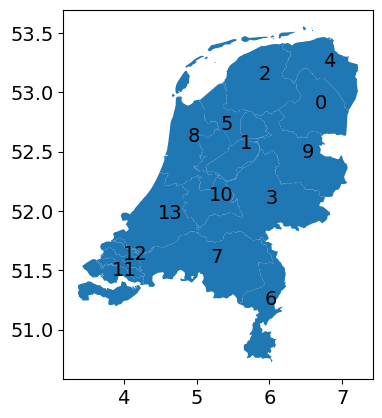

In [648]:
fig, ax = plt.subplots()
nld_4326.plot(ax=ax)

#Visualing the different regions of spain with their index
for idx, geometry in enumerate(nld_4326.geometry):
    centroid = geometry.centroid
    ax.annotate(str(idx), (centroid.x, centroid.y))

plt.show()

In [649]:
nld_4326["region"] = [1,2,1,2,1,6,3,3,4,2,4,5,6,5]
nld_4326_dis = nld_4326.dissolve(by="region")
nld_4326_dis

geometry GID_0     GID_1  \
region                                                                      
1       MULTIPOLYGON (((6.10234 52.84489, 6.10211 52.8...   NLD   NLD.1_1   
2       MULTIPOLYGON (((5.13285 51.73853, 5.13139 51.7...   NLD   NLD.2_1   
3       POLYGON ((6.01326 50.75231, 6.01215 50.75426, ...   NLD   NLD.7_1   
4       MULTIPOLYGON (((5.14756 51.92529, 5.14031 51.9...   NLD   NLD.9_1   
5       MULTIPOLYGON (((3.66083 51.29253, 3.65546 51.2...   NLD  NLD.12_1   
6       MULTIPOLYGON (((3.85372 51.53911, 3.84910 51.5...   NLD   NLD.6_1   

            COUNTRY         NAME_1  
region                              
1       Netherlands        Drenthe  
2       Netherlands      Flevoland  
3       Netherlands        Limburg  
4       Netherlands  Noord-Holland  
5       Netherlands        Zeeland  
6       Netherlands     IJsselmeer

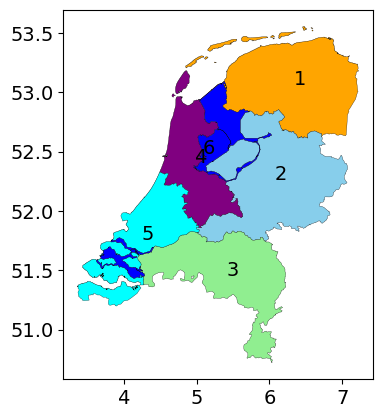

In [650]:
rep_point = nld_4326_dis.representative_point()
colors =  ('orange', 'skyblue', 'lightgreen', 'purple', 'cyan', 'blue')

fig, ax = plt.subplots()
nld_4326_dis.plot(ax=ax, color = colors, edgecolor="black", linewidth=0.2)  # Tracer les géométries

# Ajouter les numéros d'index comme annotations
for idx, geometry in enumerate(nld_4326_dis.geometry):
    centroid = geometry.centroid
    ax.annotate(str(idx+1), (centroid.x, centroid.y))

plt.show()

In [651]:
merged_df = pd.merge(nld_4326_dis, eez_nld_4326, on=['region', 'geometry'], how='outer')
merged_df_dis = merged_df.dissolve(by="region")

In [652]:
merged_df_dis

geometry GID_0     GID_1  \
region                                                                      
1       MULTIPOLYGON (((5.27139 53.25236, 5.27139 53.2...   NLD   NLD.1_1   
2       MULTIPOLYGON (((5.12990 51.74391, 5.13257 51.7...   NLD   NLD.2_1   
3       POLYGON ((6.01326 50.75231, 6.01215 50.75426, ...   NLD   NLD.7_1   
4       MULTIPOLYGON (((4.99422 52.36170, 4.99569 52.3...   NLD   NLD.9_1   
5       MULTIPOLYGON (((3.64316 51.29162, 3.63084 51.2...   NLD  NLD.12_1   
6       MULTIPOLYGON (((4.22318 51.51344, 4.22317 51.5...   NLD   NLD.6_1   

            COUNTRY         NAME_1   MRGID                        GEONAME  \
region                                                                      
1       Netherlands        Drenthe     NaN                           None   
2       Netherlands      Flevoland     NaN                           None   
3       Netherlands        Limburg     NaN                           None   
4       Netherlands  Noord-Holland     NaN                           None   
5       Netherlands        Zeeland     NaN                           None   
6       Netherlands     IJsselmeer  5668.0  Dutch Exclusive Economic Zone   

        MRGID_TER1 POL_TYPE  MRGID_SOV1  ... AREA_KM2 ISO_SOV1 ISO_SOV2  \
region                                   ...                              
1              NaN     None         NaN  ...      NaN     None     None   
2              NaN     None         NaN  ...      NaN     None     None   
3              NaN     None         NaN  ...      NaN     None     None   
4              NaN     None         NaN  ...      NaN     None     None   
5              NaN     None         NaN  ...      NaN     None     None   
6             15.0    200NM        15.0  ...  64328.0      NLD     None   

        ISO_SOV3  UN_SOV1 UN_SOV2 UN_SOV3 UN_TER1  UN_TER2  UN_TER3  
region                                                               
1           None      NaN     NaN     NaN     NaN      NaN      NaN  
2           None      NaN     NaN     NaN     NaN      NaN      NaN  
3           None      NaN     NaN     NaN     NaN      NaN      NaN  
4           None      NaN     NaN     NaN     NaN      NaN      NaN  
5           None      NaN     NaN     NaN     NaN      NaN      NaN  
6           None    528.0     NaN     NaN   528.0      NaN      NaN  

[6 rows x 36 columns]

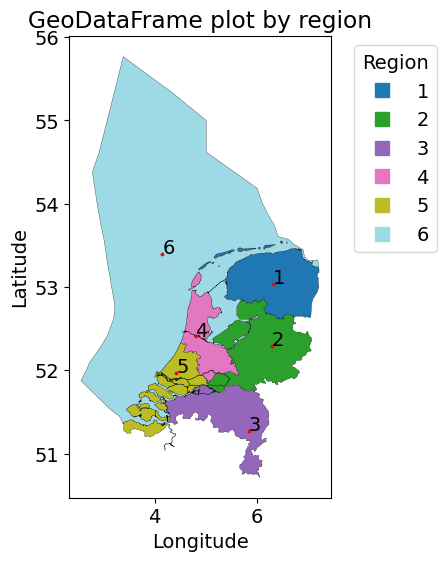

In [653]:
# Définir les couleurs pour chaque région
regions = merged_df_dis.index.unique()
num_regions = len(regions)
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, num_regions)]
color_dict = dict(zip(regions, colors))
rep_point = merged_df_dis.representative_point()

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for region in regions:
    subset = merged_df_dis[merged_df_dis.index == region]
    subset.plot(ax=ax, color=color_dict[region], label=region, edgecolor = "black", linewidth = 0.2)

rep_point.plot(ax=ax, color='red', markersize=3)
for idx, region in enumerate(merged_df_dis.index):
    ax.annotate(region, (rep_point.x[region], rep_point.y[region]))

# Ajouter la légende
handles = [plt.Line2D([0], [0], marker='s', color=color_dict[region], linestyle='', markersize=10, label=region) for region in regions]
ax.legend(handles=handles, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GeoDataFrame plot by region')
plt.show()

In [654]:
nld_land_4326 = merged_df_dis.loc[[1,2,3,4,5]]
nld_sea_4326 = merged_df_dis.loc[[6]]

# II - Land Eligibility Analysis

In [655]:
url_elevation = "GEBCO_2014_2D-NL.nc"
url_airports = "ne_10m_airports.gpkg"
url_roads = "ne_10m_roads.gpkg"
url_nature = "WDPA_Oct2022_Public_shp-NLD.tif"
url_land = "PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-NL.tif"
fn = "gadm_410-levels-ADM_1-NLD.gpkg"

# Onwind

In [656]:
countries_on = nld_land_4326
shape_on = countries_on.to_crs(epsg=3035).geometry

<Axes: >

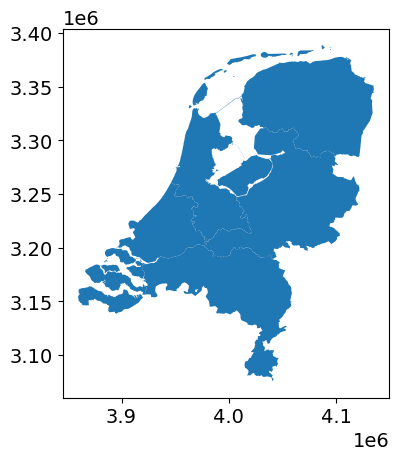

In [657]:
shape_on.plot()

Copernicus classification :

0 : No input data available - RGB: (40, 40, 40)

111 : Closed forest, evergreen needle leaf - RGB: (88, 72, 31)

112 : Closed forest, evergreen, broad leaf - RGB: (0, 153, 0)

113 : Closed forest, deciduous needle leaf - RGB: (112, 102, 62)

114 : Closed forest, deciduous broad leaf - RGB: (0, 204, 0)

115 : Closed forest, mixed - RGB: (78, 117, 31)

116 : Closed forest, unknown - RGB: (0, 120, 0)

121 : Open forest, evergreen needle leaf - RGB: (102, 96, 0)

122 : Open forest, evergreen broad leaf - RGB: (141, 180, 0)

123 : Open forest, deciduous needle leaf - RGB: (141, 116, 0)

124 : Open forest, deciduous broad leaf - RGB: (160, 220, 0)

125 : Open forest, mixed - RGB: (146, 153, 0)

126 : Open forest, unknown - RGB: (100, 140, 0)

20 : Shrubs - RGB: (255, 187, 34)

30 : Herbaceous vegetation - RGB: (255, 255, 76)

90 : Herbaceous wetland - RGB: (0, 150, 160)

100 : Moss and lichen - RGB: (250, 230, 160)

60 : Bare / sparse vegetation - RGB: (180, 180, 180)

40 : Cultivated and managed vegetation/agriculture (cropland) - RGB: (240, 150, 255)

50 : Urban / built up - RGB: (250, 0, 0)

70 : Snow and Ice - RGB: (240, 240, 240)

80 : Permanent water bodies - RGB: (0, 50, 200)

200 : Open sea - RGB: (0, 0, 128)




In [658]:
excluder_onwind = ExclusionContainer(crs=3035, res = 300)

In [659]:
# Protected areas excluded
excluder_onwind.add_raster(url_nature, crs=3035)

# Airports excluded
excluder_onwind.add_geometry(url_airports, buffer=10000)

# Roads excluded
excluder_onwind.add_geometry(url_roads, buffer = 300)

# Elevation above 2000 excluded
excluder_onwind.add_raster(url_elevation, codes=lambda x: x > 2000, crs=4326)

# Urban areas excluded (see Copernicus classification above)
excluder_onwind.add_raster(url_land, codes=[50], buffer=1000, crs=4326)

# Areas to include
excluder_onwind.add_raster(url_land, codes=[20,30,40,60,125], crs=4326, invert=True)

In [660]:
band, transform = shape_availability(shape_on, excluder_onwind)

In [661]:
# geometry_0 = shape_on.iloc[0]

# # Créer un masque pour la région 0
# mask = rio.features.geometry_mask([geometry_0], out_shape=band.shape, transform=transform, invert=True)

# # Compter le nombre de cases True dans band correspondant à la région 0
# num_true_in_region_0 = np.sum(band[mask])

# shape_on

# for index, (key, value) in enumerate(shape_on.items()):
#     print(f"Index: {index}, Key: {key}, Value: {value}")

In [662]:
density_installation = {
    'onwind': 5,    # potential MW/km2
    'offwind': 7, 
    'solar': 100    
}

def renewable_potential(mask, tr, excl, shp, tech) : 

    if tech not in density_installation:
        raise ValueError(f"Unknown technology : {tech}")
    else : 

        potentials = []
        keys = []
        density = density_installation[tech]
        cell_area = excl.res**2

        for i, (region, value) in enumerate(shp.items()):  
            geom = shp.iloc[i]
            mask_r = rio.features.geometry_mask([geom], out_shape=mask.shape, transform=tr, invert=True)
            el_cel_in_r = np.sum(mask[mask_r])
            el_area_in_r = el_cel_in_r * cell_area
            el_area_in_r_km2 = el_area_in_r / 1e6
            potential = el_area_in_r_km2 * density
            potentials.append(potential)
            keys.append(region)
        
        dict_pot = {keys[i]: potentials[i] for i in range(len(keys))}
        
        return dict_pot



In [663]:
renewable_potential(band, transform, excluder_onwind, shape_on, "onwind")

{1: 11943.45,
 2: 10357.650000000001,
 3: 3581.1000000000004,
 4: 2205.45,
 5: 3563.1}

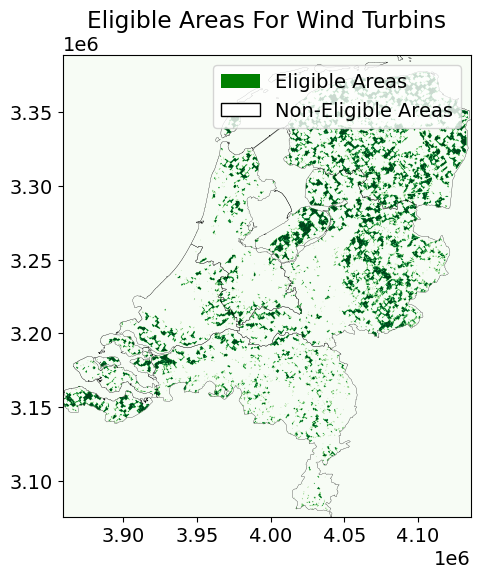

In [664]:
fig, ax = plt.subplots(figsize=(10, 6))
shape_on.plot(ax=ax, color="none", linewidth = 0.2)
show(band, transform=transform, cmap="Greens", ax=ax)

eligible_patch = mpatches.Patch(facecolor='green', label='Eligible Areas')
non_eligible_patch = mpatches.Patch(facecolor='white', label='Non-Eligible Areas', edgecolor='black')

plt.legend(handles=[eligible_patch, non_eligible_patch], loc='upper right')

plt.title("Eligible Areas For Wind Turbins")
plt.show()

# Offshore

In [665]:
# ocean = gpd.read_file("/content/drive/MyDrive/DataDSEM/eez_v11.gpkg")
# ocean_nl = ocean[ocean["SOVEREIGN1"] == "Netherlands"]
# ocean_nl.crs
# ocean_bound = gpd.read_file("/content/drive/MyDrive/DataDSEM/eez_boundaries_v11.gpkg")
# bound_esp = ocean_bound[ocean_bound["SOVEREIGN1"] == "Spain"]

In [666]:
countries_off = nld_sea_4326
shape_off = countries_off.to_crs(epsg=3035).geometry

<Axes: >

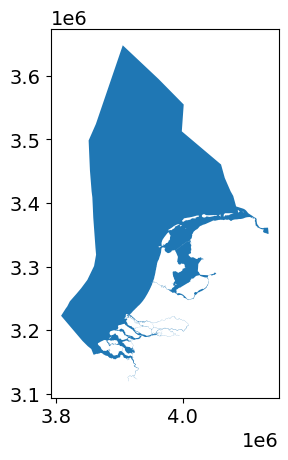

In [667]:
shape_off.plot()

In [668]:
excluder_offshore = ExclusionContainer(crs=3035, res = 300)

In [669]:
# Exclude protected areas
excluder_offshore.add_raster(url_nature, crs=3035)

# Exclude depth beneath 50m
excluder_offshore.add_raster(url_elevation, codes=lambda x: x<(-50), crs=4326)

# Away from coutry shores
excluder_offshore.add_geometry(nld_4326_dis, buffer=10000)

excluder_offshore.add_geometry('eez_boundaries_v11.gpkg') # Within EEZ boundaries

In [670]:
band_off, transform_off = shape_availability(shape_off, excluder_offshore)

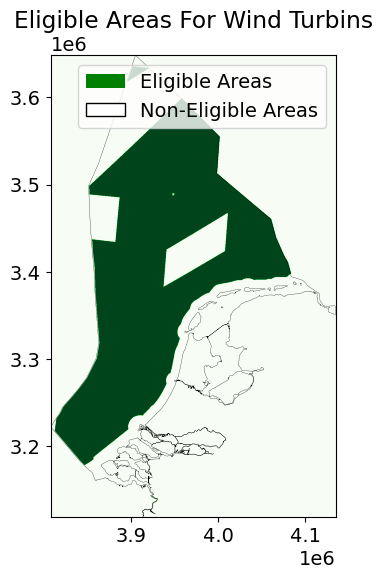

In [671]:
fig, ax = plt.subplots(figsize=(10, 6))
shape_off.plot(ax=ax, color="none", linewidth = 0.2)
show(band_off, transform=transform_off, cmap="Greens", ax=ax)

eligible_patch = mpatches.Patch(facecolor='green', label='Eligible Areas')
non_eligible_patch = mpatches.Patch(facecolor='white', label='Non-Eligible Areas', edgecolor='black')

plt.legend(handles=[eligible_patch, non_eligible_patch], loc='upper right')

plt.title("Eligible Areas For Wind Turbins")
plt.show()

# Solar

In [672]:
countries_so = nld_land_4326
shape_so = countries_so.to_crs(epsg=3035).geometry

In [673]:
excluder_solar = ExclusionContainer(crs=3035, res = 300)

In [674]:
# Exclude protected areas
excluder_solar.add_raster(url_nature, crs=3035)

# Exclude land areas
excluder_solar.add_raster(url_land, codes=[50,70,80,90]+[i for i in range(111,127)], buffer=300, crs=4326)

# Eigible land areas to include
excluder_solar.add_raster(url_land, codes=[20,30,40,60,100], crs=4326, invert=True)

In [675]:
band_so, transform_so = shape_availability(shape_so, excluder_solar)

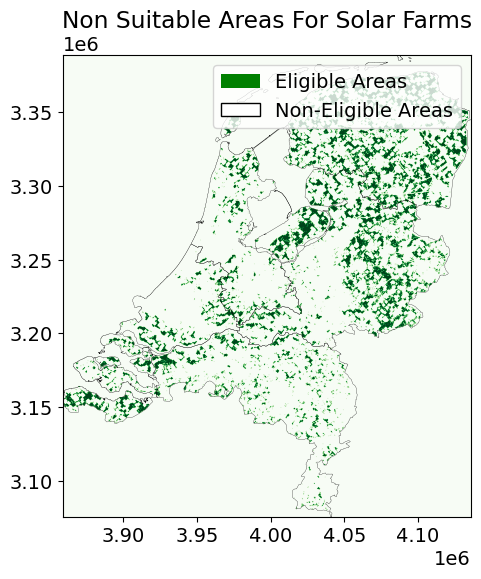

In [676]:
fig, ax = plt.subplots(figsize=(10, 6))
shape_so.plot(ax=ax, color="none", linewidth = 0.2)
show(band, transform=transform, cmap="Greens", ax=ax)

eligible_patch = mpatches.Patch(facecolor='green', label='Eligible Areas')
non_eligible_patch = mpatches.Patch(facecolor='white', label='Non-Eligible Areas', edgecolor='black')

plt.legend(handles=[eligible_patch, non_eligible_patch], loc='upper right')

plt.title("Non Suitable Areas For Solar Farms")
plt.show()

In [677]:
# Calculate the maximum potentials 

pot_max_onwind = renewable_potential(band, transform, excluder_onwind, shape_on, "onwind")
pot_max_offwind = renewable_potential(band_off, transform_off, excluder_offshore, shape_off, "offwind")
pot_max_solar = renewable_potential(band_so, transform_so, excluder_solar, shape_so, "solar")

print(pot_max_onwind, pot_max_offwind, pot_max_solar)

{1: 11943.45, 2: 10357.650000000001, 3: 3581.1000000000004, 4: 2205.45, 5: 3563.1} {6: 316832.04000000004} {1: 233298.0, 2: 131814.0, 3: 42201.0, 4: 61389.0, 5: 101124.0}


# III - Furthers parts 

In [678]:
from urllib.request import urlretrieve

In [679]:
# fn = "era5-2013-NL.nc"
# url = "https://tubcloud.tu-berlin.de/s/bAJj9xmN5ZLZQZJ/download/" + fn
# urlretrieve(url, fn)

# Onshore Capacity Factor

In [680]:
# fn = "gadm_410-levels-ADM_1-NLD.gpkg"
# regions = gpd.read_file(fn)
# regions.head()

In [681]:
# regions.crs

In [682]:
# regions.total_bounds

In [683]:
# nld = regions.copy()
# nld["region"] = [1,2,1,2,1,2,3,3,2,1,2,3,3,3]
# nld_dis = nld.dissolve(by = "region")
# minx, miny, maxx, maxy = nld_dis.total_bounds
# buffer = 0.25


In [684]:
# nld_dis.total_bounds

In [685]:
minx, miny, maxx, maxy = nld_land_4326.total_bounds
buffer = 0.25

In [686]:
cutout = atlite.Cutout("europe-2013-era5.nc")
cutout_nld = cutout.sel(x=slice(minx - buffer, maxx + buffer), y=slice(miny - buffer, maxy + buffer))

In [687]:
cutout_nld

<Cutout "europe-2013-era5-72w3w1c0">
 x = 3.30 ⟷ 7.20, dx = 0.30
 y = 50.70 ⟷ 53.70, dy = 0.30
 time = 2013-01-01 ⟷ 2013-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [688]:
cutout_nld.data

<xarray.Dataset> Size: 86MB
Dimensions:           (x: 14, y: 11, time: 8760)
Coordinates:
  * x                 (x) float64 112B 3.3 3.6 3.9 4.2 4.5 ... 6.3 6.6 6.9 7.2
  * y                 (y) float64 88B 50.7 51.0 51.3 51.6 ... 53.1 53.4 53.7
  * time              (time) datetime64[ns] 70kB 2013-01-01 ... 2013-12-31T23...
    lon               (x) float64 112B dask.array<chunksize=(14,), meta=np.ndarray>
    lat               (y) float64 88B dask.array<chunksize=(11,), meta=np.ndarray>
Data variables: (12/13)
    height            (y, x) float32 616B dask.array<chunksize=(11, 14), meta=np.ndarray>
    wnd100m           (time, y, x) float32 5MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 5MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    roughness         (time, y, x) float32 5MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    influx_toa        (time, y, x) float32 5MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    influx_direct     (time, y, x) float32 5MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    ...                ...
    albedo            (time, y, x) float32 5MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    solar_altitude    (time, y, x) float64 11MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    solar_azimuth     (time, y, x) float64 11MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    temperature       (time, y, x) float64 11MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    soil temperature  (time, y, x) float64 11MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
    runoff            (time, y, x) float32 5MB dask.array<chunksize=(100, 11, 14), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'runoff', 'temperature', 'wind', 'influx']
    chunksize_time:     100
    dx:                 0.3
    dy:                 0.3
    Conventions:        CF-1.6
    history:            2022-03-04 14:08:37 GMT by grib_to_netcdf-2.24.2: /op...

In [689]:
#nld_dis.index = nld_dis.GID_1

In [690]:
#nld_land_4326.crs

In [691]:
onshore_A = cutout_nld.availabilitymatrix(nld_land_4326, excluder_onwind)

Compute availability matrix:   0%|          | 0/5 [00:00<?, ? gridcells/s]

Compute availability matrix: 100%|██████████| 5/5 [01:16<00:00, 15.37s/ gridcells]


In [692]:
cap_per_sqkm = 3  # MW/km2

area = cutout_nld.grid.set_index(["y", "x"]).to_crs(3035).area / 1e6

area = xr.DataArray(area, dims=("spatial"))

capacity_matrix = onshore_A.stack(spatial=["y", "x"]) * area * cap_per_sqkm

In [693]:
onshore = cutout_nld.wind(
    atlite.windturbines.Vestas_V112_3MW,
    matrix=capacity_matrix,
    index=nld_land_4326.index,
    per_unit=True,
)

onshore_df = onshore.to_pandas()
onshore_df

/opt/anaconda3/envs/pitie/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 4.38 s


region                      1         2         3         4         5
time                                                                 
2013-01-01 00:00:00  0.998975  0.997925  0.998468  0.998050  0.998297
2013-01-01 01:00:00  0.981815  0.995112  0.997072  0.988215  0.993124
2013-01-01 02:00:00  0.952146  0.981075  0.988307  0.946122  0.970967
2013-01-01 03:00:00  0.886245  0.916817  0.931022  0.767314  0.861064
2013-01-01 04:00:00  0.655116  0.762757  0.822314  0.523018  0.680503
...                       ...       ...       ...       ...       ...
2013-12-31 19:00:00  0.944623  0.898349  0.790733  0.951875  0.942194
2013-12-31 20:00:00  0.940086  0.876553  0.778794  0.944519  0.938032
2013-12-31 21:00:00  0.920623  0.837225  0.773567  0.938595  0.911153
2013-12-31 22:00:00  0.751153  0.649190  0.676206  0.857340  0.764536
2013-12-31 23:00:00  0.766319  0.694857  0.699070  0.887988  0.692507

[8760 rows x 5 columns]

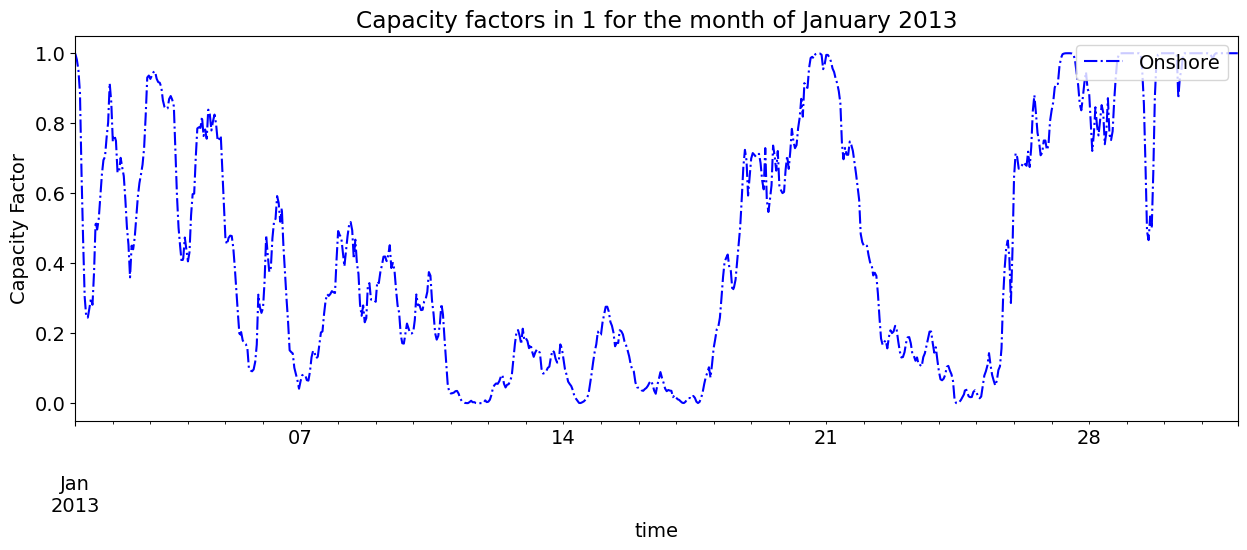

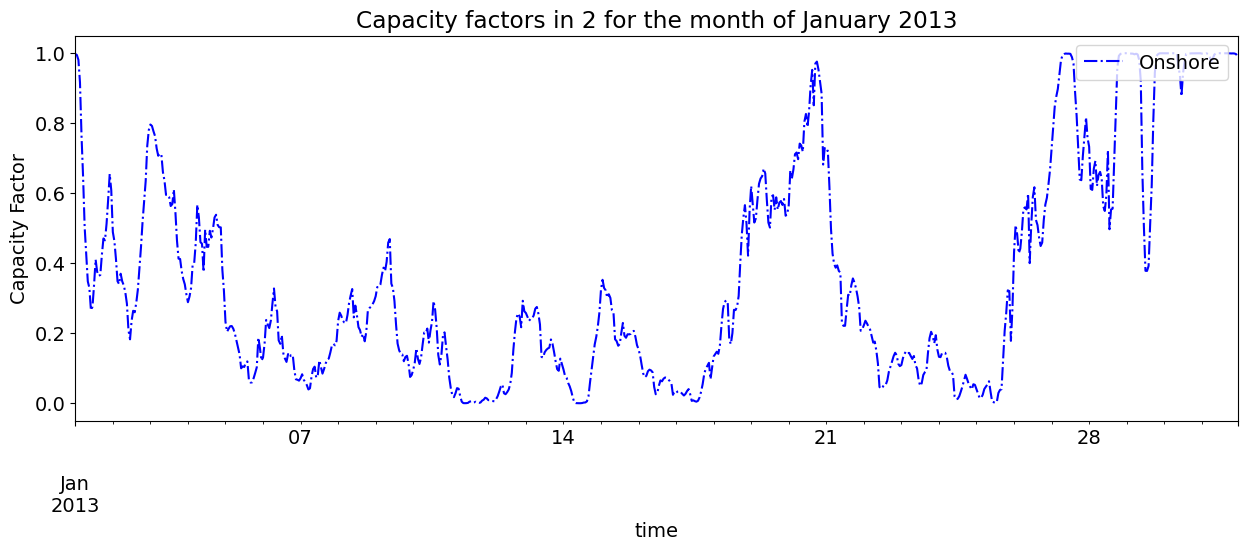

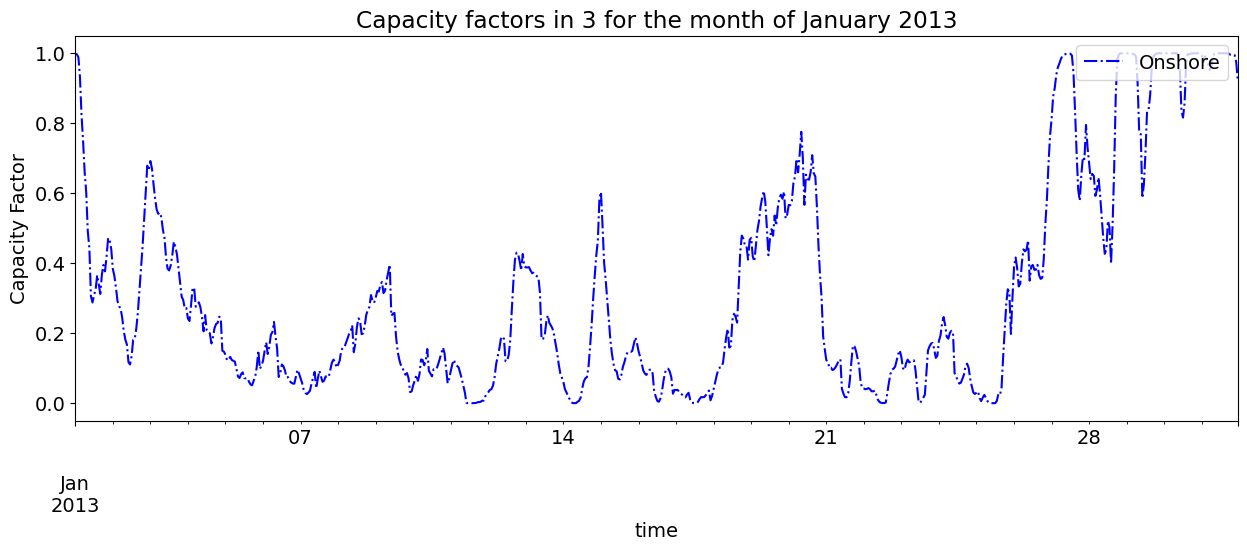

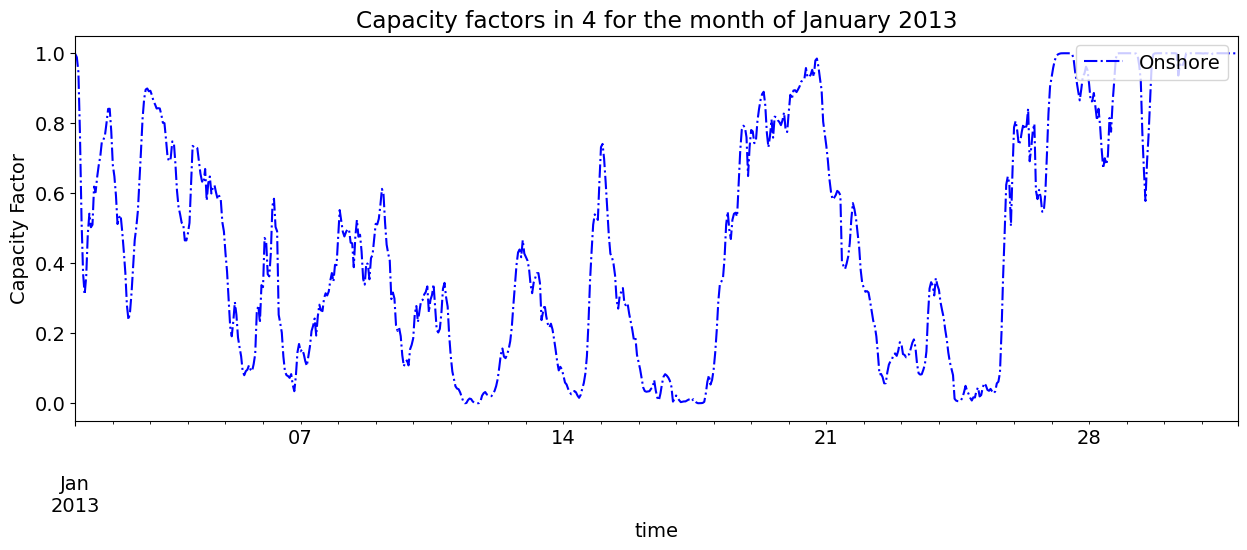

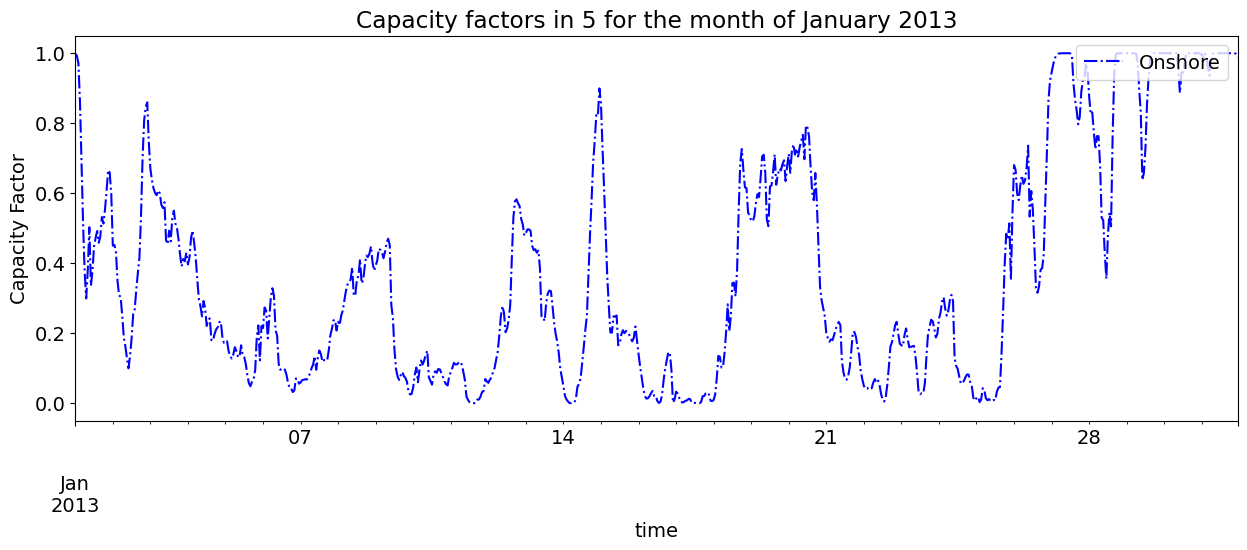

In [694]:
region_names = nld_land_4326.index
for region in region_names:
   
    us = pd.Series(onshore_df[region], index=onshore_df.index)
    

    fig, ax = plt.subplots(figsize=(15,5))
    plt.title(f'Capacity factors in {region} for the month of January 2013')
    us.loc['2013-01'].plot(color="blue", linestyle='-.', label='Onshore')
    plt.ylabel('Capacity Factor')
    plt.legend(loc="upper right")

# Offshore Capacity Factor

In [695]:
minx, miny, maxx, maxy = nld_sea_4326.total_bounds
buffer = 0.25

In [696]:
cutout = atlite.Cutout("europe-2013-era5.nc")
cutout_ocean = cutout.sel(x=slice(minx - buffer, maxx + buffer), y=slice(miny - buffer, maxy + buffer))

In [697]:
offshore_A = cutout_ocean.availabilitymatrix(nld_sea_4326, excluder_offshore)

Compute availability matrix: 100%|██████████| 1/1 [00:01<00:00,  1.67s/ gridcells]


In [698]:
cap_per_sqkm = 3  # MW/km2

area = cutout_ocean.grid.set_index(["y", "x"]).to_crs(3035).area / 1e6

area = xr.DataArray(area, dims=("spatial"))

capacity_matrix = offshore_A.stack(spatial=["y", "x"]) * area * cap_per_sqkm

In [699]:
#create offshore wind profiles
offshore = cutout_ocean.wind(
    atlite.windturbines.NREL_ReferenceTurbine_5MW_offshore,
    matrix= capacity_matrix,
    index= nld_sea_4326.index,
    per_unit=True,
)

offshore_df = offshore.to_pandas()

/opt/anaconda3/envs/pitie/lib/python3.11/site-packages/atlite/resource.py:72: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.13.
  warnings.warn(msg, FutureWarning)
INFO:atlite.convert:Convert and aggregate 'wind'.


[########################################] | 100% Completed | 27.57 s


In [700]:
offshore_df

region                      6
time                         
2013-01-01 00:00:00  0.728403
2013-01-01 01:00:00  0.657270
2013-01-01 02:00:00  0.641306
2013-01-01 03:00:00  0.574383
2013-01-01 04:00:00  0.443536
...                       ...
2013-12-31 19:00:00  0.999919
2013-12-31 20:00:00  0.992884
2013-12-31 21:00:00  0.974395
2013-12-31 22:00:00  0.960512
2013-12-31 23:00:00  0.922488

[8760 rows x 1 columns]

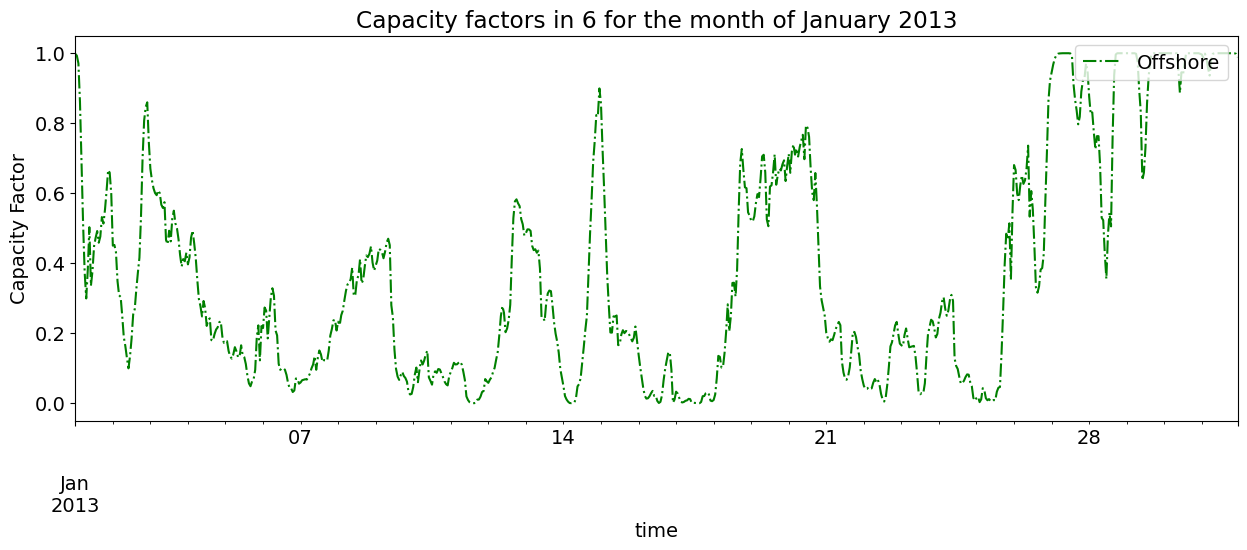

In [701]:
region_names = nld_sea_4326.index

for region in region_names:
   
    vs = pd.Series(offshore_df[region], index=offshore_df.index)
    
    fig, ax = plt.subplots(figsize=(15,5))
    plt.title(f'Capacity factors in {region} for the month of January 2013')
    us.loc['2013-01'].plot(color="green", linestyle='-.', label='Offshore')
    plt.ylabel('Capacity Factor')
    plt.legend(loc="upper right")

# Solar Capacity Factor

In [702]:
minx, miny, maxx, maxy = nld_land_4326.total_bounds
buffer = 0.25

In [703]:
cutout = atlite.Cutout("europe-2013-era5.nc")
cutout_nld = cutout.sel(x=slice(minx - buffer, maxx + buffer), y=slice(miny - buffer, maxy + buffer))

In [704]:
solar_A = cutout_nld.availabilitymatrix(nld_land_4326, excluder_solar)

Compute availability matrix: 100%|██████████| 5/5 [00:01<00:00,  2.56 gridcells/s]


In [705]:
cap_per_sqkm = 3  # MW/km2

area = cutout_nld.grid.set_index(["y", "x"]).to_crs(3035).area / 1e6

area = xr.DataArray(area, dims=("spatial"))

capacity_matrix = solar_A.stack(spatial=["y", "x"]) * area * cap_per_sqkm

In [706]:
#create solar profile
solar = cutout_nld.pv(
    panel=atlite.solarpanels.CdTe,
    matrix=capacity_matrix,
    orientation='latitude_optimal',
    index= nld_land_4326.index,
    per_unit=True,
)

solar_df = solar.to_pandas()
solar_df

INFO:atlite.convert:Convert and aggregate 'pv'.


[########################################] | 100% Completed | 12.08 s


region                 1    2    3    4    5
time                                        
2013-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0
2013-01-01 01:00:00  0.0  0.0  0.0  0.0  0.0
2013-01-01 02:00:00  0.0  0.0  0.0  0.0  0.0
2013-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0
2013-01-01 04:00:00  0.0  0.0  0.0  0.0  0.0
...                  ...  ...  ...  ...  ...
2013-12-31 19:00:00  0.0  0.0  0.0  0.0  0.0
2013-12-31 20:00:00  0.0  0.0  0.0  0.0  0.0
2013-12-31 21:00:00  0.0  0.0  0.0  0.0  0.0
2013-12-31 22:00:00  0.0  0.0  0.0  0.0  0.0
2013-12-31 23:00:00  0.0  0.0  0.0  0.0  0.0

[8760 rows x 5 columns]

In [707]:
solar_df[2]

time
2013-01-01 00:00:00    0.0
2013-01-01 01:00:00    0.0
2013-01-01 02:00:00    0.0
2013-01-01 03:00:00    0.0
2013-01-01 04:00:00    0.0
                      ... 
2013-12-31 19:00:00    0.0
2013-12-31 20:00:00    0.0
2013-12-31 21:00:00    0.0
2013-12-31 22:00:00    0.0
2013-12-31 23:00:00    0.0
Name: 2, Length: 8760, dtype: float64

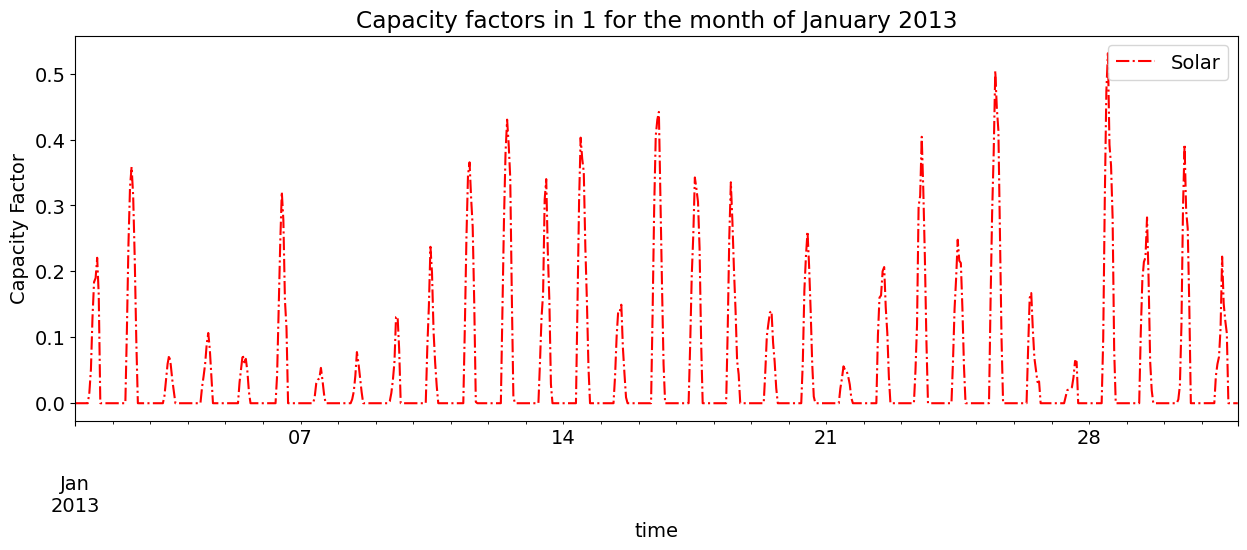

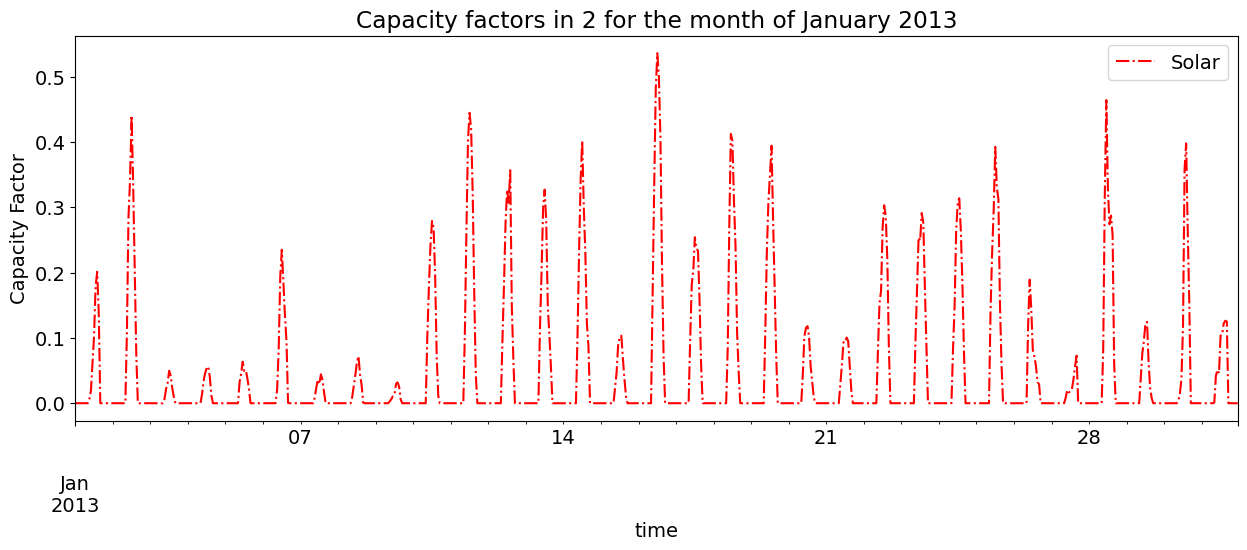

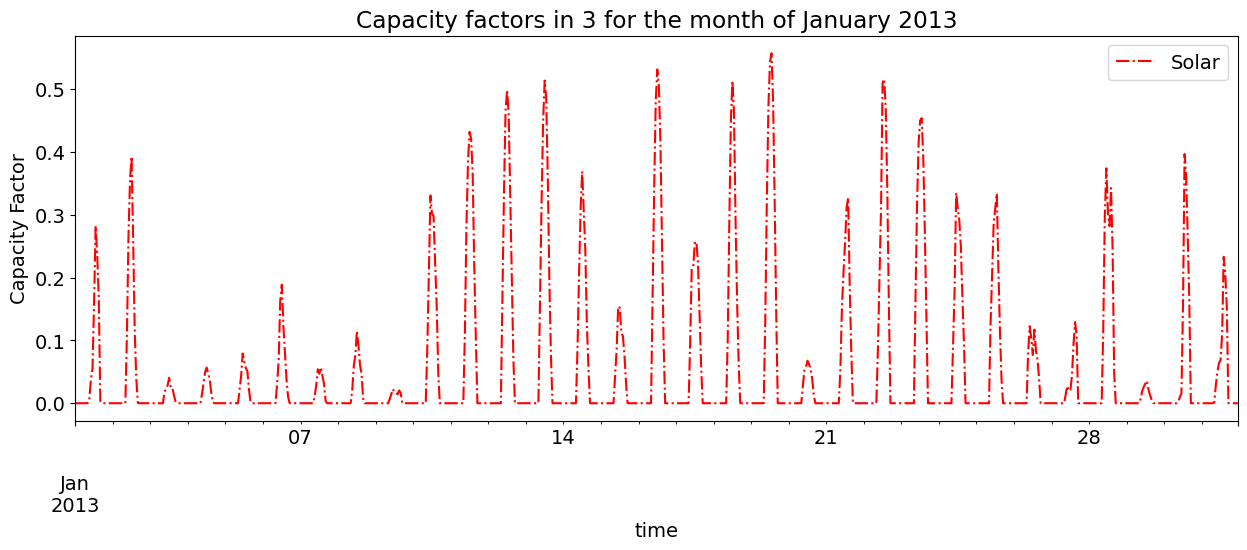

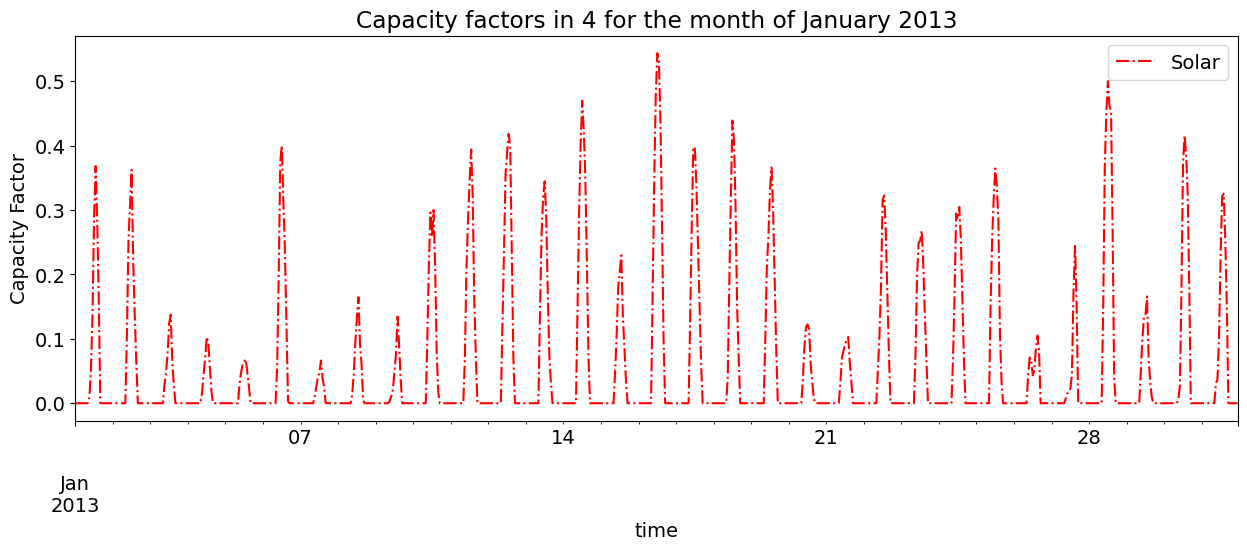

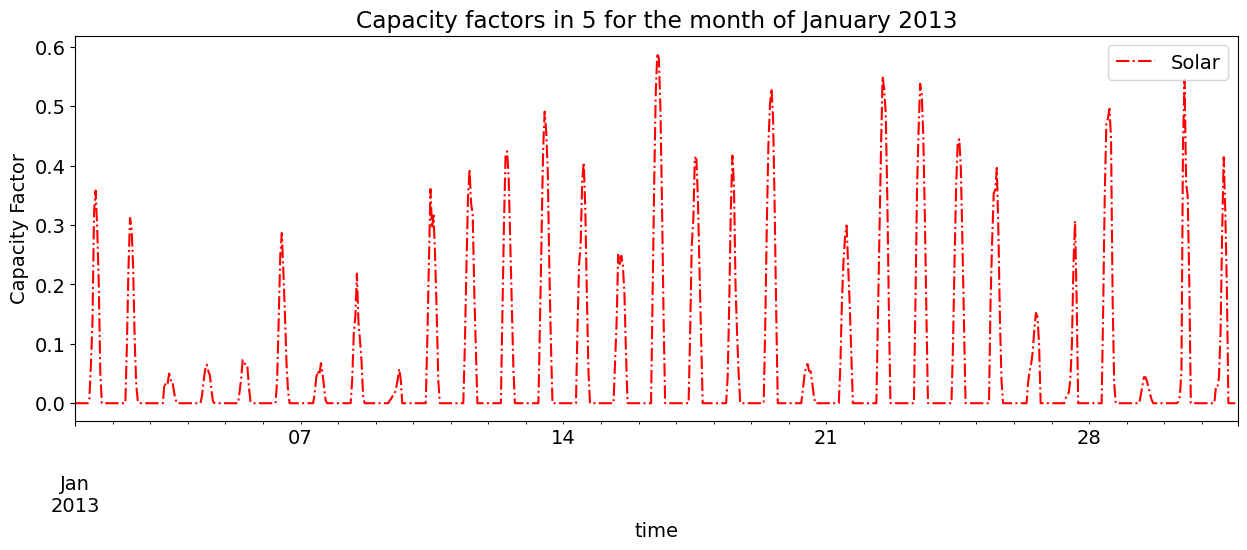

In [708]:
region_names = nld_land_4326.index

for region in region_names:
   
    us = pd.Series(solar_df[region], index=solar_df.index)
    

    fig, ax = plt.subplots(figsize=(15,5))
    plt.title(f'Capacity factors in {region} for the month of January 2013')
    us.loc['2013-01'].plot(color="red", linestyle='-.', label='Solar')
    plt.ylabel('Capacity Factor')
    plt.legend(loc="upper right")

# PyPSA

In [709]:
df_offwind_cf = offshore_df.copy()
df_onwind_cf = onshore_df.copy()
df_solar_cf = solar_df.copy()

In [710]:
df_offwind_cf = df_offwind_cf.drop(labels = df_offwind_cf.loc['2020-02-29 00:00:00':'2020-02-29 23:00:00'].index.array , axis = 0)
df_onwind_cf = df_onwind_cf.drop(labels = df_onwind_cf.loc['2020-02-29 00:00:00':'2020-02-29 23:00:00'].index.array , axis = 0)
df_solar_cf = df_solar_cf.drop(labels = df_solar_cf.loc['2020-02-29 00:00:00':'2020-02-29 23:00:00'].index.array , axis = 0)
len(df_solar_cf) == len(df_onwind_cf) == len(df_offwind_cf) == 8760

True

In [711]:
df_pp = pd.read_csv("global_power_plant_database.csv")
gdf_pp = gpd.GeoDataFrame(df_pp, geometry=gpd.points_from_xy(df_pp.longitude, df_pp.latitude))
gdf_pp.set_crs(epsg=4326, inplace=True)

#only NLP pp
gdf_pp_nl = gdf_pp[gdf_pp.country == 'NLD']

#No existing wind and solar pp's to be considered
#gdf_pp_nl = gdf_pp_nl.drop(gdf_pp_nl[(gdf_pp_nl.primary_fuel == "Solar")].index)
#gdf_pp_nl = gdf_pp_nl.drop(gdf_pp_nl[(gdf_pp_nl.primary_fuel == "Wind")].index)



/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/2596194382.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pp = pd.read_csv("global_power_plant_database.csv")


In [712]:
gdf_pp_nl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [713]:
gdf_pp_nl.head()

country country_long                            name   gppd_idnr  \
17685     NLD  Netherlands                         Ameland  WKS0066277   
17686     NLD  Netherlands                          Andijk  WKS0072735   
17687     NLD  Netherlands                      Beabuorren  WRI1005281   
17688     NLD  Netherlands  Borssele Nuclear Power Station  WRI1019300   
17689     NLD  Netherlands                  Budel-Dorplein  WKS0071714   

       capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
17685          6.0   53.4503     5.6734        Solar         NaN         NaN   
17686         15.0   52.7370     5.2290        Solar         NaN         NaN   
17687         10.4   53.0417     5.5014         Wind         NaN         NaN   
17688        485.0   51.4312     3.7174      Nuclear         NaN         NaN   
17689         43.9   51.2360     5.6150        Solar         NaN         NaN   

       ... estimated_generation_gwh_2014  estimated_generation_gwh_2015  \
17685  ...                          8.95                           8.98   
17686  ...                         22.77                          22.51   
17687  ...                         22.29                          23.53   
17688  ...                           NaN                            NaN   
17689  ...                         62.58                          62.52   

      estimated_generation_gwh_2016 estimated_generation_gwh_2017  \
17685                          9.00                          8.99   
17686                         22.53                         22.52   
17687                         24.76                         22.35   
17688                           NaN                       3203.82   
17689                         63.02                         62.02   

      estimated_generation_note_2013 estimated_generation_note_2014  \
17685                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
17686                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
17687                        WIND-V1                        WIND-V1   
17688                  NO-ESTIMATION                  NO-ESTIMATION   
17689                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   

      estimated_generation_note_2015  estimated_generation_note_2016  \
17685                SOLAR-V1-NO-AGE                 SOLAR-V1-NO-AGE   
17686                SOLAR-V1-NO-AGE                 SOLAR-V1-NO-AGE   
17687                        WIND-V1                         WIND-V1   
17688                  NO-ESTIMATION                   NO-ESTIMATION   
17689                SOLAR-V1-NO-AGE                 SOLAR-V1-NO-AGE   

       estimated_generation_note_2017                  geometry  
17685                 SOLAR-V1-NO-AGE  POINT (5.67340 53.45030)  
17686                 SOLAR-V1-NO-AGE  POINT (5.22900 52.73700)  
17687                         WIND-V1  POINT (5.50140 53.04170)  
17688              CAPACITY-FACTOR-V1  POINT (3.71740 51.43120)  
17689                 SOLAR-V1-NO-AGE  POINT (5.61500 51.23600)  

[5 rows x 37 columns]

In [714]:
unique_values = gdf_pp_nl['primary_fuel'].unique()
unique_values

array(['Solar', 'Wind', 'Nuclear', 'Gas', 'Coal'], dtype=object)

In [715]:
dff = merged_df_dis.copy()
dff = dff.reset_index()
dff

region                                           geometry GID_0     GID_1  \
0       1  MULTIPOLYGON (((5.27139 53.25236, 5.27139 53.2...   NLD   NLD.1_1   
1       2  MULTIPOLYGON (((5.12990 51.74391, 5.13257 51.7...   NLD   NLD.2_1   
2       3  POLYGON ((6.01326 50.75231, 6.01215 50.75426, ...   NLD   NLD.7_1   
3       4  MULTIPOLYGON (((4.99422 52.36170, 4.99569 52.3...   NLD   NLD.9_1   
4       5  MULTIPOLYGON (((3.64316 51.29162, 3.63084 51.2...   NLD  NLD.12_1   
5       6  MULTIPOLYGON (((4.22318 51.51344, 4.22317 51.5...   NLD   NLD.6_1   

       COUNTRY         NAME_1   MRGID                        GEONAME  \
0  Netherlands        Drenthe     NaN                           None   
1  Netherlands      Flevoland     NaN                           None   
2  Netherlands        Limburg     NaN                           None   
3  Netherlands  Noord-Holland     NaN                           None   
4  Netherlands        Zeeland     NaN                           None   
5  Netherlands     IJsselmeer  5668.0  Dutch Exclusive Economic Zone   

   MRGID_TER1 POL_TYPE  ...  AREA_KM2 ISO_SOV1 ISO_SOV2 ISO_SOV3  UN_SOV1  \
0         NaN     None  ...       NaN     None     None     None      NaN   
1         NaN     None  ...       NaN     None     None     None      NaN   
2         NaN     None  ...       NaN     None     None     None      NaN   
3         NaN     None  ...       NaN     None     None     None      NaN   
4         NaN     None  ...       NaN     None     None     None      NaN   
5        15.0    200NM  ...   64328.0      NLD     None     None    528.0   

   UN_SOV2 UN_SOV3 UN_TER1 UN_TER2  UN_TER3  
0      NaN     NaN     NaN     NaN      NaN  
1      NaN     NaN     NaN     NaN      NaN  
2      NaN     NaN     NaN     NaN      NaN  
3      NaN     NaN     NaN     NaN      NaN  
4      NaN     NaN     NaN     NaN      NaN  
5      NaN     NaN   528.0     NaN      NaN  

[6 rows x 37 columns]

In [716]:
# df_nld = nld_land_4326.reset_index()
# df_onld = nld_sea_4326.reset_index()
# merged_df = pd.merge(df_nld, df_onld, on=['region', 'geometry'], how='outer')

In [717]:
# Join in such a way that the geometry of the powerplant is included in the geomtetry of the region 
joined = gpd.sjoin(gdf_pp_nl, dff, how='left', predicate='within')
joined

country country_long                            name   gppd_idnr  \
17685     NLD  Netherlands                         Ameland  WKS0066277   
17686     NLD  Netherlands                          Andijk  WKS0072735   
17687     NLD  Netherlands                      Beabuorren  WRI1005281   
17688     NLD  Netherlands  Borssele Nuclear Power Station  WRI1019300   
17689     NLD  Netherlands                  Budel-Dorplein  WKS0071714   
...       ...          ...                             ...         ...   
17751     NLD  Netherlands                      Westereems  WRI1005474   
17752     NLD  Netherlands             Weststad Oosterhout  WRI1005476   
17753     NLD  Netherlands              Willem Anna Polder  WRI1005477   
17754     NLD  Netherlands                       Zierikzee  WKS0073210   
17755     NLD  Netherlands                        flushing  WRI1005431   

       capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
17685          6.0   53.4503     5.6734        Solar         NaN         NaN   
17686         15.0   52.7370     5.2290        Solar         NaN         NaN   
17687         10.4   53.0417     5.5014         Wind         NaN         NaN   
17688        485.0   51.4312     3.7174      Nuclear         NaN         NaN   
17689         43.9   51.2360     5.6150        Solar         NaN         NaN   
...            ...       ...        ...          ...         ...         ...   
17751        213.3   53.4375     6.8613         Wind         NaN         NaN   
17752         15.0   51.6450     4.8597         Wind         NaN         NaN   
17753          9.0   51.6392     4.1292         Wind         NaN         NaN   
17754         14.1   51.6400     3.9900        Solar         NaN         NaN   
17755          2.3   51.4425     3.5736         Wind         NaN         NaN   

       ... AREA_KM2  ISO_SOV1 ISO_SOV2 ISO_SOV3 UN_SOV1 UN_SOV2 UN_SOV3  \
17685  ...      NaN      None     None     None     NaN     NaN     NaN   
17686  ...      NaN      None     None     None     NaN     NaN     NaN   
17687  ...      NaN      None     None     None     NaN     NaN     NaN   
17688  ...      NaN      None     None     None     NaN     NaN     NaN   
17689  ...      NaN      None     None     None     NaN     NaN     NaN   
...    ...      ...       ...      ...      ...     ...     ...     ...   
17751  ...      NaN      None     None     None     NaN     NaN     NaN   
17752  ...      NaN      None     None     None     NaN     NaN     NaN   
17753  ...      NaN      None     None     None     NaN     NaN     NaN   
17754  ...      NaN      None     None     None     NaN     NaN     NaN   
17755  ...      NaN      None     None     None     NaN     NaN     NaN   

       UN_TER1  UN_TER2  UN_TER3  
17685      NaN      NaN      NaN  
17686      NaN      NaN      NaN  
17687      NaN      NaN      NaN  
17688      NaN      NaN      NaN  
17689      NaN      NaN      NaN  
...        ...      ...      ...  
17751      NaN      NaN      NaN  
17752      NaN      NaN      NaN  
17753      NaN      NaN      NaN  
17754      NaN      NaN      NaN  
17755      NaN      NaN      NaN  

[72 rows x 74 columns]

In [718]:
joined.head()
joined.to_csv('pp_nld_region.csv')

In [719]:
df_fossils = joined.groupby(["region","primary_fuel"]).capacity_mw.sum().unstack().fillna(0)
df_fossils

primary_fuel    Coal     Gas  Nuclear  Solar     Wind
region                                               
1.0           1600.0  4306.0      0.0   62.8   320.18
2.0            590.0   349.0      0.0    0.0    49.10
3.0              0.0     0.0      0.0   67.9    35.80
4.0            685.0  1025.0      0.0   30.0    38.73
5.0           2140.0  1753.0    485.0   80.3   174.28
6.0              0.0  1879.0      0.0    0.0  1178.10

In [720]:
cap_pp_r = df_fossils.copy()
cap_pp_r.index = df_fossils.index.astype(int)
cap_pp_r

primary_fuel    Coal     Gas  Nuclear  Solar     Wind
region                                               
1             1600.0  4306.0      0.0   62.8   320.18
2              590.0   349.0      0.0    0.0    49.10
3                0.0     0.0      0.0   67.9    35.80
4              685.0  1025.0      0.0   30.0    38.73
5             2140.0  1753.0    485.0   80.3   174.28
6                0.0  1879.0      0.0    0.0  1178.10

In [721]:
merged = merged_df_dis.join(cap_pp_r, how='inner')
merged

geometry GID_0     GID_1  \
region                                                                      
1       MULTIPOLYGON (((5.27139 53.25236, 5.27139 53.2...   NLD   NLD.1_1   
2       MULTIPOLYGON (((5.12990 51.74391, 5.13257 51.7...   NLD   NLD.2_1   
3       POLYGON ((6.01326 50.75231, 6.01215 50.75426, ...   NLD   NLD.7_1   
4       MULTIPOLYGON (((4.99422 52.36170, 4.99569 52.3...   NLD   NLD.9_1   
5       MULTIPOLYGON (((3.64316 51.29162, 3.63084 51.2...   NLD  NLD.12_1   
6       MULTIPOLYGON (((4.22318 51.51344, 4.22317 51.5...   NLD   NLD.6_1   

            COUNTRY         NAME_1   MRGID                        GEONAME  \
region                                                                      
1       Netherlands        Drenthe     NaN                           None   
2       Netherlands      Flevoland     NaN                           None   
3       Netherlands        Limburg     NaN                           None   
4       Netherlands  Noord-Holland     NaN                           None   
5       Netherlands        Zeeland     NaN                           None   
6       Netherlands     IJsselmeer  5668.0  Dutch Exclusive Economic Zone   

        MRGID_TER1 POL_TYPE  MRGID_SOV1  ... UN_SOV2 UN_SOV3 UN_TER1  UN_TER2  \
region                                   ...                                    
1              NaN     None         NaN  ...     NaN     NaN     NaN      NaN   
2              NaN     None         NaN  ...     NaN     NaN     NaN      NaN   
3              NaN     None         NaN  ...     NaN     NaN     NaN      NaN   
4              NaN     None         NaN  ...     NaN     NaN     NaN      NaN   
5              NaN     None         NaN  ...     NaN     NaN     NaN      NaN   
6             15.0    200NM        15.0  ...     NaN     NaN   528.0      NaN   

        UN_TER3    Coal     Gas Nuclear  Solar     Wind  
region                                                   
1           NaN  1600.0  4306.0     0.0   62.8   320.18  
2           NaN   590.0   349.0     0.0    0.0    49.10  
3           NaN     0.0     0.0     0.0   67.9    35.80  
4           NaN   685.0  1025.0     0.0   30.0    38.73  
5           NaN  2140.0  1753.0   485.0   80.3   174.28  
6           NaN     0.0  1879.0     0.0    0.0  1178.10  

[6 rows x 41 columns]

In [722]:
merged.representative_point()

region
1    POINT (6.30770 53.03945)
2    POINT (6.29240 52.29567)
3    POINT (5.83110 51.27609)
4    POINT (4.80150 52.41195)
5    POINT (4.41346 51.97036)
6    POINT (4.13744 53.40210)
dtype: geometry

In [723]:

# plt.figure(figsize=(8, 8))
# plt.pie(merged['Coal'], labels=merged.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple', 'pink'])
# plt.title('Capacities by Type of Energy')
# plt.show()

In [724]:
merged.representative_point().iloc[1].coords[0]

(6.292400568002548, 52.29567146350013)

In [725]:
merged['geometry'].iloc[1].representative_point().coords[0]

(6.292400568002548, 52.29567146350013)

In [726]:
bar_plot = merged[['Coal','Gas','Nuclear']].hvplot.bar(
    stacked=True,  # Stack the bars to show distribution within each region
    xlabel='Region',
    ylabel='Capacity (MW)',
    title='Distribution of Energy Capacities by Region',
    rot=45,  # Rotate x-axis labels for better readability
    legend='top_right'
)

bar_plot.opts(legend_position='top_right', title="Distribution of Existing Powerplants' Capacities by Region")
bar_plot

:Bars   [region,Variable]   (value)

In [727]:
# data = {
#     'Region': [1, 2, 3],
#     'Coal': [100, 150, 200],
#     'Gas': [200, 250, 300],
#     'Nuclear': [300, 350, 400]
# }
# df = pd.DataFrame(data)

# # Utilisation de iterrows et row.get
# for idx, row in df.iterrows():
#     #print(f"Index: {idx}")
#     #print(f"Row data:\n{row}")
    
#     coal_capacity = row.get('Coal')
#     gas_capacity = row.get('Gas')
#     nuclear_capacity = row.get('Nuclear')
#     non_existent = row.get('NonExistentColumn', 'DefaultValue')
    
#     print(f"Coal capacity: {coal_capacity}")
#     print(f"Gas capacity: {gas_capacity}")
#     print(f"Nuclear capacity: {nuclear_capacity}")
#     print(f"Non-existent column value: {non_existent}")
#     print("-" * 40)

In [728]:
# merged.to_csv('testte.csv')

In [729]:
# gdf = merged.copy()
# gdf['representative_point'] = gdf.geometry.representative_point()

# # Créer la carte
# fig, ax = plt.subplots(figsize=(12, 12))
# gdf.plot(ax=ax, color='blue', edgecolor='black', label='Geometries')
# gdf.set_geometry('representative_point').plot(ax=ax, color='red', markersize=5, label='Representative Points')

# # Ajouter une légende
# plt.legend()

# # Afficher la carte
# plt.title('Geometries and Their Representative Points')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

In [730]:
import holoviews as hv

In [731]:
import hvplot.pandas

In [732]:
df_pp = pd.read_csv("global_power_plant_database.csv")
gdf_pp = gpd.GeoDataFrame(df_pp, geometry=gpd.points_from_xy(df_pp.longitude, df_pp.latitude))
gdf_pp.set_crs(epsg=4326, inplace=True)

/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/3143510209.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pp = pd.read_csv("global_power_plant_database.csv")


country country_long                                               name  \
0         AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1         AFG  Afghanistan                                       Kandahar DOG   
2         AFG  Afghanistan                                       Kandahar JOL   
3         AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
4         AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
...       ...          ...                                                ...   
34931     ZMB       Zambia                                              Ndola   
34932     ZMB       Zambia                                              Nkana   
34933     ZMB       Zambia                                     Victoria Falls   
34934     ZWE     Zimbabwe                   Hwange Coal Power Plant Zimbabwe   
34935     ZWE     Zimbabwe  Kariba Dam South Hydroelectric Power Station Z...   

          gppd_idnr  capacity_mw  latitude  longitude primary_fuel  \
0      GEODB0040538         33.0   32.3220    65.1190        Hydro   
1        WKS0070144         10.0   31.6700    65.7950        Solar   
2        WKS0071196         10.0   31.6230    65.7920        Solar   
3      GEODB0040541         66.0   34.5560    69.4787        Hydro   
4      GEODB0040534        100.0   34.6410    69.7170        Hydro   
...             ...          ...       ...        ...          ...   
34931    WRI1022386         50.0  -12.9667    28.6333          Oil   
34932    WRI1022384         20.0  -12.8167    28.2000          Oil   
34933    WRI1022380        108.0  -17.9167    25.8500        Hydro   
34934  GEODB0040404        920.0  -18.3835    26.4700         Coal   
34935  GEODB0003803        750.0  -16.5222    28.7619        Hydro   

      other_fuel1 other_fuel2  ... estimated_generation_gwh_2014  \
0             NaN         NaN  ...                        162.90   
1             NaN         NaN  ...                         17.48   
2             NaN         NaN  ...                         17.58   
3             NaN         NaN  ...                        203.55   
4             NaN         NaN  ...                        357.22   
...           ...         ...  ...                           ...   
34931         NaN         NaN  ...                           NaN   
34932         NaN         NaN  ...                           NaN   
34933         NaN         NaN  ...                        575.78   
34934         NaN         NaN  ...                           NaN   
34935         NaN         NaN  ...                       3999.75   

       estimated_generation_gwh_2015 estimated_generation_gwh_2016  \
0                              97.39                        137.76   
1                              18.25                         17.70   
2                              19.10                         17.62   
3                             146.90                        230.18   
4                             270.99                        395.38   
...                              ...                           ...   
34931                            NaN                           NaN   
34932                            NaN                           NaN   
34933                         548.94                        579.90   
34934                            NaN                           NaN   
34935                        3745.02                       3428.65   

      estimated_generation_gwh_2017 estimated_generation_note_2013  \
0                            119.50                       HYDRO-V1   
1                             18.29                SOLAR-V1-NO-AGE   
2                             18.72                SOLAR-V1-NO-AGE   
3                            174.91                       HYDRO-V1   
4                            350.80                       HYDRO-V1   
...                             ...                            ...   
34931                        183.79         

In [733]:
gdf_pp_nl = gdf_pp[gdf_pp.country == 'NLD']
gdf_pp_nl

country country_long                            name   gppd_idnr  \
17685     NLD  Netherlands                         Ameland  WKS0066277   
17686     NLD  Netherlands                          Andijk  WKS0072735   
17687     NLD  Netherlands                      Beabuorren  WRI1005281   
17688     NLD  Netherlands  Borssele Nuclear Power Station  WRI1019300   
17689     NLD  Netherlands                  Budel-Dorplein  WKS0071714   
...       ...          ...                             ...         ...   
17751     NLD  Netherlands                      Westereems  WRI1005474   
17752     NLD  Netherlands             Weststad Oosterhout  WRI1005476   
17753     NLD  Netherlands              Willem Anna Polder  WRI1005477   
17754     NLD  Netherlands                       Zierikzee  WKS0073210   
17755     NLD  Netherlands                        flushing  WRI1005431   

       capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
17685          6.0   53.4503     5.6734        Solar         NaN         NaN   
17686         15.0   52.7370     5.2290        Solar         NaN         NaN   
17687         10.4   53.0417     5.5014         Wind         NaN         NaN   
17688        485.0   51.4312     3.7174      Nuclear         NaN         NaN   
17689         43.9   51.2360     5.6150        Solar         NaN         NaN   
...            ...       ...        ...          ...         ...         ...   
17751        213.3   53.4375     6.8613         Wind         NaN         NaN   
17752         15.0   51.6450     4.8597         Wind         NaN         NaN   
17753          9.0   51.6392     4.1292         Wind         NaN         NaN   
17754         14.1   51.6400     3.9900        Solar         NaN         NaN   
17755          2.3   51.4425     3.5736         Wind         NaN         NaN   

       ... estimated_generation_gwh_2014  estimated_generation_gwh_2015  \
17685  ...                          8.95                           8.98   
17686  ...                         22.77                          22.51   
17687  ...                         22.29                          23.53   
17688  ...                           NaN                            NaN   
17689  ...                         62.58                          62.52   
...    ...                           ...                            ...   
17751  ...                        706.12                         684.72   
17752  ...                         36.62                          36.68   
17753  ...                         17.80                          18.96   
17754  ...                         21.57                          21.39   
17755  ...                           NaN                            NaN   

      estimated_generation_gwh_2016 estimated_generation_gwh_2017  \
17685                          9.00                          8.99   
17686                         22.53                         22.52   
17687                         24.76                         22.35   
17688                           NaN                       3203.82   
17689                         63.02                         62.02   
...                             ...                           ...   
17751                        652.30                        663.99   
17752                         33.10                         35.03   
17753                         17.17                         18.51   
17754                         21.63                         21.44   
17755                          5.88                          7.70   

      estimated_generation_note_2013 estimated_generation_note_2014  \
17685                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
17686                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
17687                        WIND-V1                        WIND-V1   
17688                  NO-ESTIMATION                  NO-ESTIMATION   
17689                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   


In [734]:
gdf_pp_nl.query("primary_fuel == 'Gas'").hvplot(
    geo=True, tiles=True
)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [735]:
plot = gdf_pp_nl.query("primary_fuel in ['Nuclear', 'Coal', 'Gas']").hvplot(
    geo=True,
    tiles="CartoLight",
    frame_height=600,
    color="primary_fuel",
    cmap="Category10",
    size="capacity_mw",
    alpha=0.6,
    title="Gas, Coal and Nucear Powerplants in NLD"
)
plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (primary_fuel,capacity_mw)

# Population

In [736]:
country

GID_0     GID_1      COUNTRY         NAME_1  \
0    NLD   NLD.1_1  Netherlands        Drenthe   
1    NLD   NLD.2_1  Netherlands      Flevoland   
2    NLD   NLD.3_1  Netherlands        Fryslân   
3    NLD   NLD.4_1  Netherlands     Gelderland   
4    NLD   NLD.5_1  Netherlands      Groningen   
5    NLD   NLD.6_1  Netherlands     IJsselmeer   
6    NLD   NLD.7_1  Netherlands        Limburg   
7    NLD   NLD.8_1  Netherlands  Noord-Brabant   
8    NLD   NLD.9_1  Netherlands  Noord-Holland   
9    NLD  NLD.10_1  Netherlands     Overijssel   
10   NLD  NLD.11_1  Netherlands        Utrecht   
11   NLD  NLD.12_1  Netherlands        Zeeland   
12   NLD  NLD.13_1  Netherlands  Zeeuwse meren   
13   NLD  NLD.14_1  Netherlands             NA   

                                             geometry  
0   MULTIPOLYGON (((6.52366 52.64551, 6.52366 52.6...  
1   MULTIPOLYGON (((5.30388 52.31247, 5.28622 52.3...  
2   MULTIPOLYGON (((6.23919 52.91320, 6.23615 52.9...  
3   MULTIPOLYGON (((5.13576 51.73854, 5.13544 51.7...  
4   MULTIPOLYGON (((6.91710 53.01160, 6.91460 53.0...  
5   MULTIPOLYGON (((5.26216 52.43537, 5.23710 52.4...  
6   MULTIPOLYGON (((6.01553 50.74829, 6.01326 50.7...  
7   MULTIPOLYGON (((5.50305 51.29579, 5.49979 51.2...  
8   MULTIPOLYGON (((4.83937 52.23358, 4.83403 52.2...  
9   MULTIPOLYGON (((6.87309 52.13272, 6.87284 52.1...  
10  MULTIPOLYGON (((5.15190 51.93248, 5.15337 51.9...  
11  MULTIPOLYGON (((3.67419 51.29042, 3.66687 51.2...  
12  MULTIPOLYGON (((3.86646 51.53969, 3.85926 51.5...  
13  MULTIPOLYGON (((4.36117 51.66149, 4.33181 51.6...

<Axes: >

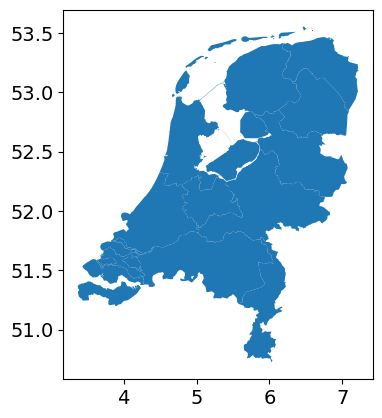

In [737]:
country[~country.index.isin([5])].plot()

In [738]:
country["NAME_1"]

0           Drenthe
1         Flevoland
2           Fryslân
3        Gelderland
4         Groningen
5        IJsselmeer
6           Limburg
7     Noord-Brabant
8     Noord-Holland
9        Overijssel
10          Utrecht
11          Zeeland
12    Zeeuwse meren
13               NA
Name: NAME_1, dtype: object

<Axes: >

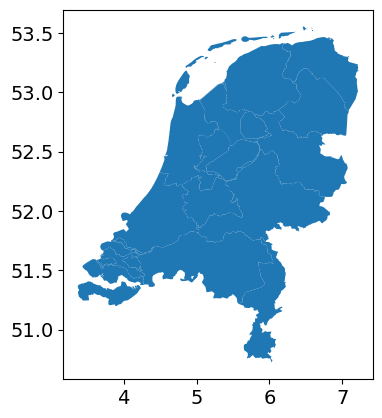

In [739]:
country.plot()

In [740]:
""""
Websites for data : 

https://www.statista.com/statistics/753196/total-number-of-inhabitants-in-the-netherlands-by-province/

https://www.cbs.nl
"""

population_nld = {
    "Drenthe" : 502051,
    "Flevoland" :444701,
    "Fryslân" : 659551,
    "Gelderland": 2133708,
    "Groningen":596075,
    "IJsselmeer":0,
    "Limburg":1128367,
    "Noord-Brabant":2626210,
    "Noord-Holland":2952622,
    "Overijssel":1184333,
    "Utrecht":1387643,
    "Zeeland": 391124,
    "Zeeuwse meren": 0,
    "NA": 3804906
    }

# population_eez = {
#     "Aruban Exclusive Economic Zone": 107609,
#     "Bonaire Exclusive Economic Zone": 22573,
#     "Curaçaoan Exclusive Economic Zone": 152369,
#     "Saba Exclusive Economic Zone": 1933,
#     "Sint-Eustatius Exclusive Economic Zone": 3242,
#     "Sint-Maarten Exclusive Economic Zone": 41486,
#     "Dutch Exclusive Economic Zone": 0
#     }

population_eez = {
    "Dutch Exclusive Economic Zone": 0
    }

df_population_eez = pd.DataFrame.from_dict(population_eez,orient="index")
df_population_eez.rename(columns = {0:'population'}, inplace = True)
df_population_eez["region"] = [6]

    
df_population_nld = pd.DataFrame.from_dict(population_nld,orient="index")
df_population_nld.rename(columns = {0:'population'}, inplace = True)
df_population_nld["region"] = [1,2,1,2,1,6,3,3,4,2,4,5,6,5]


df_population = pd.concat([df_population_nld, df_population_eez])
df_population["ratio"] = df_population.population/df_population.population.sum()
df_population

population  region     ratio
Drenthe                            502051       1  0.028187
Flevoland                          444701       2  0.024967
Fryslân                            659551       1  0.037030
Gelderland                        2133708       2  0.119795
Groningen                          596075       1  0.033466
IJsselmeer                              0       6  0.000000
Limburg                           1128367       3  0.063351
Noord-Brabant                     2626210       3  0.147446
Noord-Holland                     2952622       4  0.165772
Overijssel                        1184333       2  0.066493
Utrecht                           1387643       4  0.077908
Zeeland                            391124       5  0.021959
Zeeuwse meren                           0       6  0.000000
NA                                3804906       5  0.213623
Dutch Exclusive Economic Zone           0       6  0.000000

In [741]:
region_population = df_population.groupby("region").ratio.sum().to_frame()
region_population["population"] = df_population.groupby("region").population.sum()
region_population

ratio  population
region                      
1       0.098683     1757677
2       0.211256     3762742
3       0.210798     3754577
4       0.243681     4340265
5       0.235583     4196030
6       0.000000           0

In [742]:
df_reg = region_population['population']
df_reg

region
1    1757677
2    3762742
3    3754577
4    4340265
5    4196030
6          0
Name: population, dtype: int64

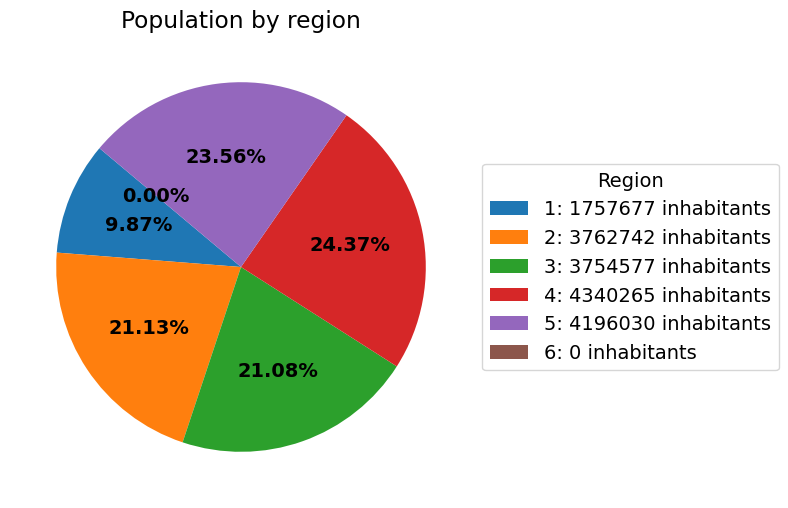

In [743]:
def func(pct, allvals):
    return "{:.2f}%".format(pct)

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(df_reg, labels=df_reg.index, autopct=lambda pct: func(pct, df_reg), startangle=140, textprops=dict(color="w"))

# Format the text on the pie chart
for text in autotexts:
    text.set_color('black')
    text.set_weight('bold')

# Create custom legend with absolute values
legend_labels = [f"{label}: {value:.0f} inhabitants" for label, value in zip(df_reg.index, df_reg)]
ax.legend(wedges, legend_labels, title="Region", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Population by region")


plt.show()

In [744]:

load = pd.read_csv("load.csv",index_col="time")
load = load["NL"]
load = load.to_frame()
load.head(3)
load.index = pd.to_datetime(load.index)
load

NL
time                             
2013-01-01 00:00:00  12400.581906
2013-01-01 01:00:00  12139.240389
2013-01-01 02:00:00  12109.418967
2013-01-01 03:00:00  12115.589781
2013-01-01 04:00:00  12653.479943
...                           ...
2013-12-31 19:00:00  16463.754677
2013-12-31 20:00:00  15154.073729
2013-12-31 21:00:00  14326.100938
2013-12-31 22:00:00  13548.511426
2013-12-31 23:00:00  12791.268042

[8760 rows x 1 columns]

Text(0, 0.5, 'demand [GW]')

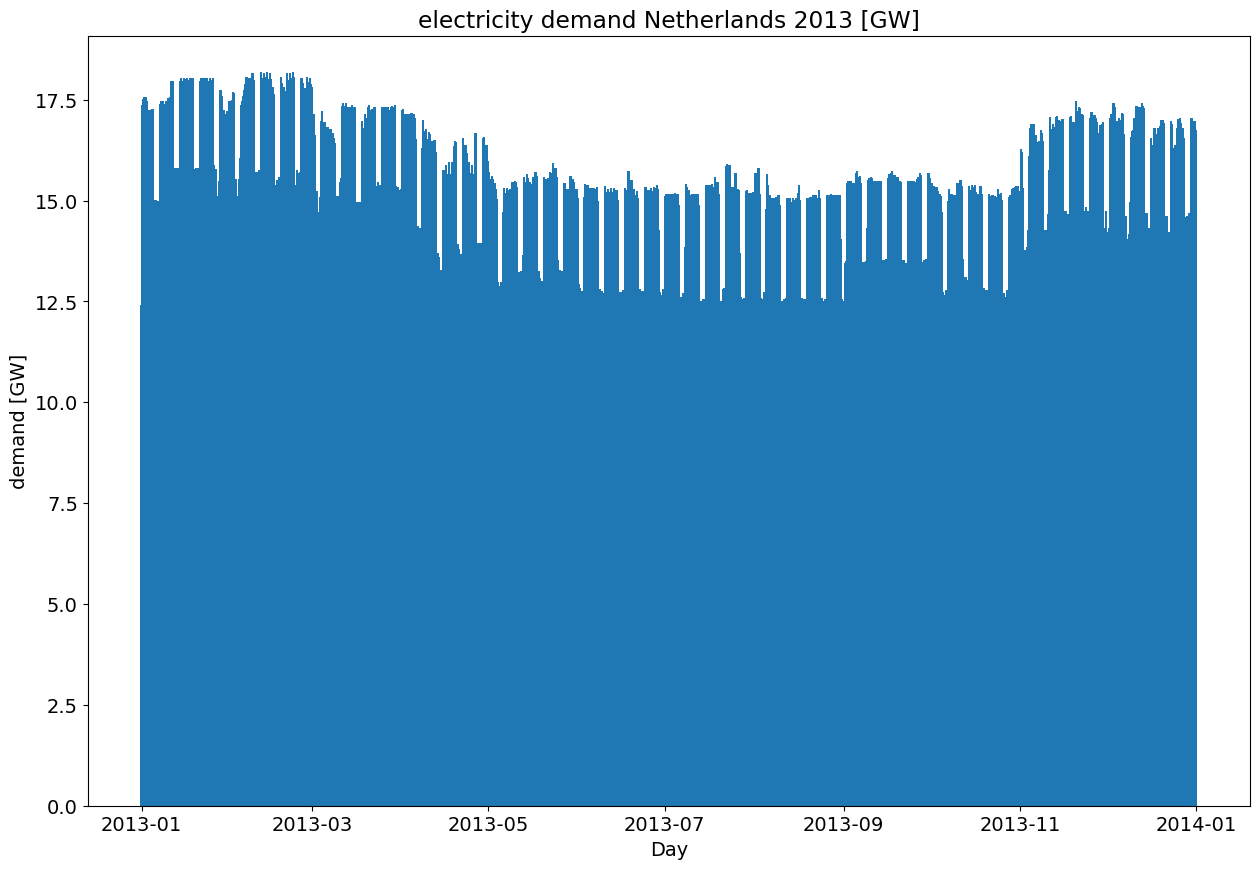

In [745]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.bar(load.index, load['NL']/1e3)
axs.set_title('electricity demand Netherlands 2013 [GW]')
axs.set_xlabel('Day')
axs.set_ylabel('demand [GW]')

In [746]:
for idx in region_population.index : 
    load[idx] = load["NL"].values * region_population.loc[idx, 'ratio']

In [747]:
load.head(3)

NL            1            2            3  \
time                                                                       
2013-01-01 00:00:00  12400.581906  1223.730363  2619.697268  2614.012629   
2013-01-01 01:00:00  12139.240389  1197.940319  2564.487305  2558.922470   
2013-01-01 02:00:00  12109.418967  1194.997443  2558.187351  2552.636187   

                               4            5    6  
time                                                
2013-01-01 00:00:00  3021.780489  2921.361158  0.0  
2013-01-01 01:00:00  2958.096647  2859.793647  0.0  
2013-01-01 02:00:00  2950.829747  2852.768239  0.0

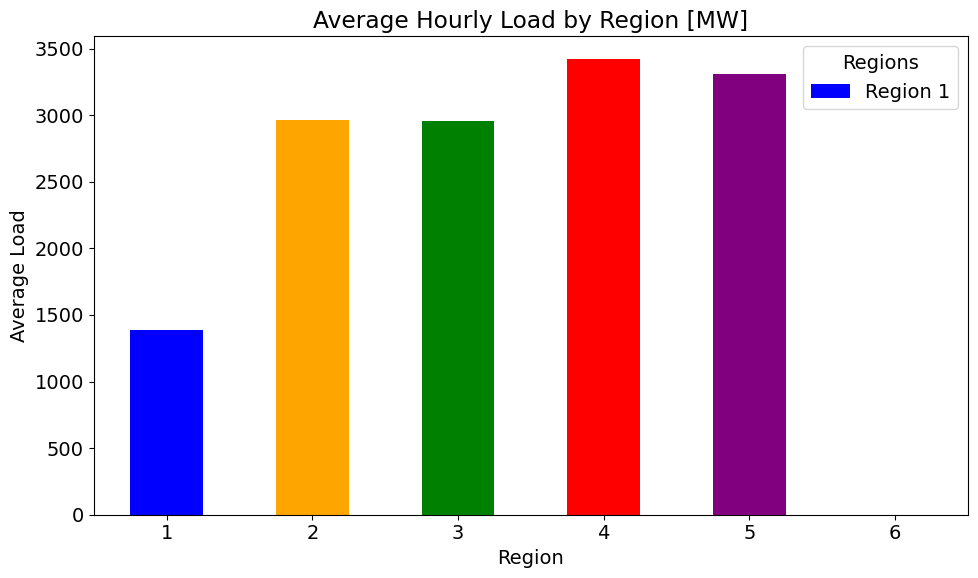

In [748]:
regions = [i for i in range(1,7)]
mean_values = load[regions].mean()

plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Region')
plt.ylabel('Average Load')
plt.title('Average Hourly Load by Region [MW]')
plt.legend(['Region 1', 'Region 2', 'Region 3', 'Region 4', 'Region 5', 'Region 6'], title='Regions')
plt.xticks(rotation=0)
plt.tight_layout()

In [749]:
load.index = pd.to_datetime(load.index)
load.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2013-12-31 14:00:00', '2013-12-31 15:00:00',
               '2013-12-31 16:00:00', '2013-12-31 17:00:00',
               '2013-12-31 18:00:00', '2013-12-31 19:00:00',
               '2013-12-31 20:00:00', '2013-12-31 21:00:00',
               '2013-12-31 22:00:00', '2013-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=8760, freq=None)

In [750]:
res = 3
load_res = load.resample(f"{res}h").first()
df_onwind_cf_res = df_onwind_cf.resample(f"{res}h").first()
df_offwind_cf_res = df_offwind_cf.resample(f"{res}h").first()
df_solar_cf_res = df_solar_cf.resample(f"{res}h").first()
df_offwind_cf_res

region                      6
time                         
2013-01-01 00:00:00  0.728403
2013-01-01 03:00:00  0.574383
2013-01-01 06:00:00  0.572323
2013-01-01 09:00:00  0.763855
2013-01-01 12:00:00  0.925038
...                       ...
2013-12-31 09:00:00  0.999964
2013-12-31 12:00:00  0.999953
2013-12-31 15:00:00  0.999942
2013-12-31 18:00:00  0.999953
2013-12-31 21:00:00  0.974395

[2920 rows x 1 columns]

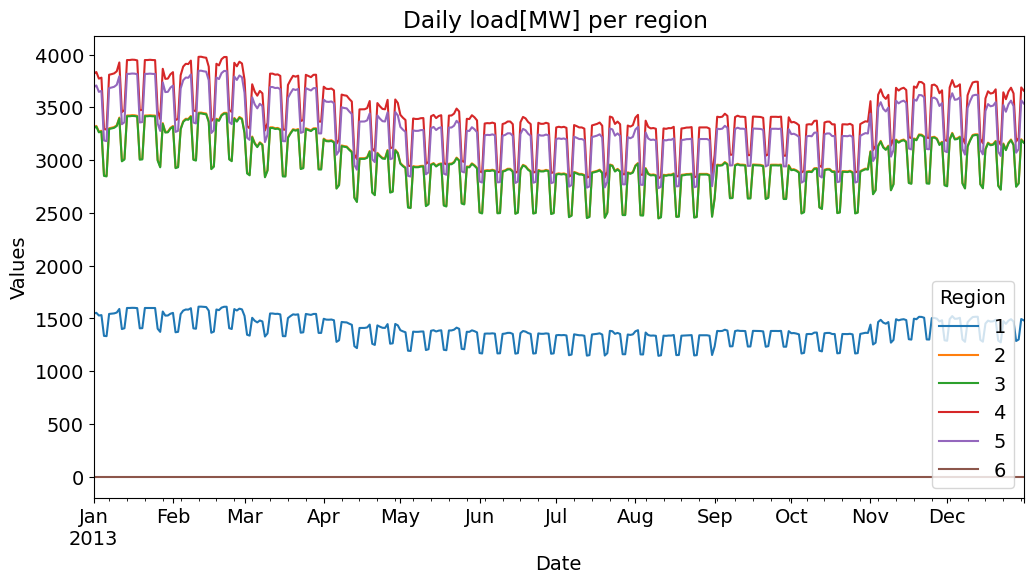

In [751]:
load_h = pd.read_csv("load.csv",index_col="time")
load_h = load_h["NL"]
load_h = load_h.to_frame()
load_h.head(3)
load_h.index = pd.to_datetime(load_h.index)

for idx in region_population.index : 
    load_h[idx] = load_h["NL"].values * region_population.loc[idx, 'ratio']

selected_columns = load_h[[1, 2, 3, 4, 5, 6]]
daily_mean = selected_columns.resample('D').mean()

# Plot the selected columns
fig, ax = plt.subplots(figsize=(12, 6))
daily_mean.plot(ax=ax)
ax.set_title('Daily load[MW] per region ')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend(title='Region', loc='lower right')
plt.show()

# Costs 

In [752]:
# Importing technology costs for 2025
year = 2025
fn = f"https://raw.githubusercontent.com/PyPSA/technology-data/master/outputs/costs_{year}.csv"
costs_df = pd.read_csv(fn, index_col=[0,1])

In [753]:
costs_df

value            unit  \
technology            parameter                                       
Ammonia cracker       FOM              4.300000e+00          %/year   
                      ammonia-input    1.460000e+00  MWh_NH3/MWh_H2   
                      investment       1.123945e+06       EUR/MW_H2   
                      lifetime         2.500000e+01           years   
BEV Bus city          FOM              2.000000e-04          %/year   
...                                             ...             ...   
waste CHP CC          efficiency-heat  7.627000e-01        per unit   
                      investment       8.829851e+03        EUR/kW_e   
                      lifetime         2.500000e+01           years   
water tank charger    efficiency       8.367000e-01        per unit   
water tank discharger efficiency       8.367000e-01        per unit   

                                                                                  source  \
technology            parameter                                                            
Ammonia cracker       FOM              Ishimoto et al. (2020): 10.1016/j.ijhydene.202...   
                      ammonia-input    ENGIE et al (2020): Ammonia to Green Hydrogen ...   
                      investment       Ishimoto et al. (2020): 10.1016/j.ijhydene.202...   
                      lifetime         Ishimoto et al. (2020): 10.1016/j.ijhydene.202...   
BEV Bus city          FOM              Danish Energy Agency, inputs/data_sheets_for_c...   
...                                                                                  ...   
waste CHP CC          efficiency-heat  Danish Energy Agency, technology_data_for_el_a...   
                      investment       Danish Energy Agency, technology_data_for_el_a...   
                      lifetime         Danish Energy Agency, technology_data_for_el_a...   
water tank charger    efficiency       Danish Energy Agency, technology_data_catalogu...   
water tank discharger efficiency       Danish Energy Agency, technology_data_catalogu...   

                                                                     further description  \
technology            parameter                                                            
Ammonia cracker       FOM              Estimated based on Labour cost rate, Maintenan...   
                      ammonia-input    Assuming a integrated 200t/d cracking and puri...   
                      investment       Calculated. For a small (200 t_NH3/d input) fa...   
                      lifetime                                                       NaN   
BEV Bus city          FOM                                                         BEV B1   
...                                                                                  ...   
waste CHP CC          efficiency-heat  08 WtE CHP, Large, 50 degree:  Heat efficiency...   
                      investment       08 WtE CHP, Large, 50 degree:  Nominal investm...   
                      lifetime         08 WtE CHP, Large, 50 degree:  Technical lifetime   
water tank charger    efficiency           :  efficiency from sqr(Round trip efficiency)   
water tank discharger efficiency           :  efficiency from sqr(Round trip efficiency)   

                                       currency_year  
technology            parameter                       
Ammonia cracker       FOM                     2015.0  
                      ammonia-input              NaN  
                      investment              2015.0  
                      lifetime                2015.0  
BEV Bus city          FOM                     2022.0  
...                                              ...  
waste CHP CC          efficiency-heat         2015.0  
                      investment              2015.0  
                      lifetime                2015.0  
water tank charger    efficiency              2015.0  
water tank discharger efficiency              2015.0  

[1033 rows x

In [754]:
# Annuity function
def annuity(r, n):
    return r / (1.0 - 1.0 / (1.0 + r) ** n)

In [755]:
costs = costs_df.copy()
costs.loc[costs.unit.str.contains("/kW"), "value"] *= 1e3
costs.unit = costs.unit.str.replace("/kW", "/MW")

defaults = {
    "FOM": 0,
    "VOM": 0,
    "efficiency": 1,
    "fuel": 0,
    "investment": 0,
    "lifetime": 25,
    "CO2 intensity": 0,
    "discount rate": 0.07,
}

costs = costs.value.unstack().fillna(defaults)

#Fixing costs for OCGT/CCGT
costs.at["OCGT", "fuel"] = costs.at["gas", "fuel"]
costs.at["CCGT", "fuel"] = costs.at["gas", "fuel"]
costs.at["OCGT", "CO2 intensity"] = costs.at["gas", "CO2 intensity"]
costs.at["CCGT", "CO2 intensity"] = costs.at["gas", "CO2 intensity"]

In [756]:
costs 

parameter                           C in fuel  C stored  CO2 intensity  \
technology                                                               
Ammonia cracker                           NaN       NaN            0.0   
BEV Bus city                              NaN       NaN            0.0   
BEV Coach                                 NaN       NaN            0.0   
BEV Truck Semi-Trailer max 50 tons        NaN       NaN            0.0   
BEV Truck Solo max 26 tons                NaN       NaN            0.0   
...                                       ...       ...            ...   
uranium                                   NaN       NaN            0.0   
waste CHP                                 NaN       NaN            0.0   
waste CHP CC                              NaN       NaN            0.0   
water tank charger                        NaN       NaN            0.0   
water tank discharger                     NaN       NaN            0.0   

parameter                           CO2 stored     FOM  Motor size      VOM  \
technology                                                                    
Ammonia cracker                            NaN  4.3000         NaN   0.0000   
BEV Bus city                               NaN  0.0002    320.6897   0.0952   
BEV Coach                                  NaN  0.0001    298.2759   0.0952   
BEV Truck Semi-Trailer max 50 tons         NaN  0.0002    468.9655   0.0952   
BEV Truck Solo max 26 tons                 NaN  0.0002    353.4483   0.0952   
...                                        ...     ...         ...      ...   
uranium                                    NaN  0.0000         NaN   0.0000   
waste CHP                                  NaN  2.3789         NaN  28.4644   
waste CHP CC                               NaN  2.3789         NaN  28.4644   
water tank charger                         NaN  0.0000         NaN   0.0000   
water tank discharger                      NaN  0.0000         NaN   0.0000   

parameter                           ammonia-input     c_b  c_v  ...  lifetime  \
technology                                                      ...             
Ammonia cracker                              1.46     NaN  NaN  ...      25.0   
BEV Bus city                                  NaN     NaN  NaN  ...      12.0   
BEV Coach                                     NaN     NaN  NaN  ...      12.0   
BEV Truck Semi-Trailer max 50 tons            NaN     NaN  NaN  ...      10.5   
BEV Truck Solo max 26 tons                    NaN     NaN  NaN  ...      13.8   
...                                           ...     ...  ...  ...       ...   
uranium                                       NaN     NaN  NaN  ...      25.0   
waste CHP                                     NaN  0.2872  1.0  ...      25.0   
waste CHP CC                                  NaN  0.2872  1.0  ...      25.0   
water tank charger                            NaN     NaN  NaN  ...      25.0   
water tank discharger                         NaN     NaN  NaN  ...      25.0   

parameter                           lohc-input  methane-input  methanol-input  \
technology                                                                      
Ammonia cracker                            NaN            NaN             NaN   
BEV Bus city                               NaN            NaN             NaN   
BEV Coach                                  NaN            NaN             NaN   
BEV Truck Semi-Trailer max 50 tons         NaN            NaN             NaN   
BEV Truck Solo max 26 tons                 NaN            NaN             NaN   
...                                        ...            ...             ...   
uranium                                    NaN            NaN             NaN   
waste CHP                                  NaN            NaN             NaN   
waste CHP CC                               NaN            NaN             NaN   
water tank charger                         NaN            NaN   

In [757]:
annuity_value = costs.apply(lambda x: annuity(x["discount rate"], x["lifetime"]), axis=1)
costs["marginal_cost"] = costs["VOM"] + costs["fuel"] / costs["efficiency"]
costs["capital_cost"] = (annuity_value + costs["FOM"] / 100) * costs["investment"]

# Pypsa Network

In [758]:
n = pypsa.Network()

In [759]:
n.snapshot_weightings.loc[:,:] = res

In [760]:
n.set_snapshots(load.index) 

# Buses creation

In [761]:
rep_points = merged_df_dis.representative_point()
rep_points_gdf = gpd.GeoDataFrame(geometry=rep_points)
rep_points_gdf['x'] = rep_points_gdf['geometry'].apply(lambda point: point.x)
rep_points_gdf['y'] = rep_points_gdf['geometry'].apply(lambda point: point.y)
rep_points_gdf

geometry         x          y
region                                               
1       POINT (6.30770 53.03945)  6.307700  53.039446
2       POINT (6.29240 52.29567)  6.292401  52.295671
3       POINT (5.83110 51.27609)  5.831101  51.276089
4       POINT (4.80150 52.41195)  4.801503  52.411945
5       POINT (4.41346 51.97036)  4.413465  51.970355
6       POINT (4.13744 53.40210)  4.137437  53.402103

In [762]:
for idx in rep_points_gdf.index :
    n.add("Bus", f"{idx}",y=rep_points_gdf.loc[idx,'y'] , x=rep_points_gdf.loc[idx,'x'])

In [763]:
n.buses

attribute  v_nom type         x          y carrier unit  v_mag_pu_set  \
Bus                                                                     
1            1.0       6.307700  53.039446      AC                1.0   
2            1.0       6.292401  52.295671      AC                1.0   
3            1.0       5.831101  51.276089      AC                1.0   
4            1.0       4.801503  52.411945      AC                1.0   
5            1.0       4.413465  51.970355      AC                1.0   
6            1.0       4.137437  53.402103      AC                1.0   

attribute  v_mag_pu_min  v_mag_pu_max control generator sub_network  
Bus                                                                  
1                   0.0           inf      PQ                        
2                   0.0           inf      PQ                        
3                   0.0           inf      PQ                        
4                   0.0           inf      PQ                        
5                   0.0           inf      PQ                        
6                   0.0           inf      PQ

# Carriers

In [764]:
carriers = ["offwind", "onwind", "solar", "coal" , "gas", "hydro", "nuclear", "oil", "hydrogen storage underground", "battery storage"]

n.madd(
    "Carrier",
    carriers,
    color=["cyan","blue","gold","grey","indianred","green","orange","chocolate","magenta", "yellowgreen"],
    co2_emissions=[costs.at[c, "CO2 intensity"] for c in carriers]
)
n.add(
    "Carrier",
    "HVAC",
    color = "brown",
    co2_emissions = 0
)

In [830]:
costs[['CO2 intensity']].loc['solar']

parameter
CO2 intensity    0.0
Name: solar, dtype: float64

# Generators

In [765]:
fossils_gen = df_fossils.copy()
fossils_gen

primary_fuel    Coal     Gas  Nuclear  Solar     Wind
region                                               
1.0           1600.0  4306.0      0.0   62.8   320.18
2.0            590.0   349.0      0.0    0.0    49.10
3.0              0.0     0.0      0.0   67.9    35.80
4.0            685.0  1025.0      0.0   30.0    38.73
5.0           2140.0  1753.0    485.0   80.3   174.28
6.0              0.0  1879.0      0.0    0.0  1178.10

In [766]:
n_fossils_gen = fossils_gen[['Coal','Gas','Nuclear']]
#n_fossils_gen = n_fossils_gen.index.astype(int)

new_index = range(1, 7)
fossils_generators = n_fossils_gen.reindex(new_index, fill_value=0)
fossils_generators = fossils_generators.rename(columns={'Gas': 'gas', 'Coal': 'coal', 'Nuclear': 'nuclear'})
fossils_generators

primary_fuel    coal     gas  nuclear
region                               
1             1600.0  4306.0      0.0
2              590.0   349.0      0.0
3                0.0     0.0      0.0
4              685.0  1025.0      0.0
5             2140.0  1753.0    485.0
6                0.0  1879.0      0.0

In [767]:
# Adding existing generators
generators = ["coal" , "gas", "nuclear"]

for idx in rep_points_gdf.index :
    for g in generators:
        n.add(
            "Generator",
            f"{g} {idx}",
            bus= f'{idx}',
            carrier= f"{g}",
            #capital_cost=costs.at[g, "capital_cost"],
            capital_cost=0,
            marginal_cost=costs.at[g, "marginal_cost"],
            efficiency=costs.at[g, "efficiency"],
            p_nom_extendable=False,
            p_nom = fossils_generators.loc[idx, g],
        )

In [768]:
n.generators

attribute bus control type   p_nom  p_nom_mod  p_nom_extendable  p_nom_min  \
Generator                                                                    
coal 1      1      PQ       1600.0        0.0             False        0.0   
gas 1       1      PQ       4306.0        0.0             False        0.0   
nuclear 1   1      PQ          0.0        0.0             False        0.0   
coal 2      2      PQ        590.0        0.0             False        0.0   
gas 2       2      PQ        349.0        0.0             False        0.0   
nuclear 2   2      PQ          0.0        0.0             False        0.0   
coal 3      3      PQ          0.0        0.0             False        0.0   
gas 3       3      PQ          0.0        0.0             False        0.0   
nuclear 3   3      PQ          0.0        0.0             False        0.0   
coal 4      4      PQ        685.0        0.0             False        0.0   
gas 4       4      PQ       1025.0        0.0             False        0.0   
nuclear 4   4      PQ          0.0        0.0             False        0.0   
coal 5      5      PQ       2140.0        0.0             False        0.0   
gas 5       5      PQ       1753.0        0.0             False        0.0   
nuclear 5   5      PQ        485.0        0.0             False        0.0   
coal 6      6      PQ          0.0        0.0             False        0.0   
gas 6       6      PQ       1879.0        0.0             False        0.0   
nuclear 6   6      PQ          0.0        0.0             False        0.0   

attribute  p_nom_max  p_min_pu  p_max_pu  ...  min_up_time  min_down_time  \
Generator                                 ...                               
coal 1           inf       0.0       1.0  ...            0              0   
gas 1            inf       0.0       1.0  ...            0              0   
nuclear 1        inf       0.0       1.0  ...            0              0   
coal 2           inf       0.0       1.0  ...            0              0   
gas 2            inf       0.0       1.0  ...            0              0   
nuclear 2        inf       0.0       1.0  ...            0              0   
coal 3           inf       0.0       1.0  ...            0              0   
gas 3            inf       0.0       1.0  ...            0              0   
nuclear 3        inf       0.0       1.0  ...            0              0   
coal 4           inf       0.0       1.0  ...            0              0   
gas 4            inf       0.0       1.0  ...            0              0   
nuclear 4        inf       0.0       1.0  ...            0              0   
coal 5           inf       0.0       1.0  ...            0              0   
gas 5            inf       0.0       1.0  ...            0              0   
nuclear 5        inf       0.0       1.0  ...            0              0   
coal 6           inf       0.0       1.0  ...            0              0   
gas 6            inf       0.0       1.0  ...            0              0   
nuclear 6        inf       0.0       1.0  ...            0              0   

attribute  up_time_before down_time_before  ramp_limit_up  ramp_limit_down  \
Generator                                                                    
coal 1                  1                0            NaN              NaN   
gas 1                   1                0            NaN              NaN   
nuclear 1               1                0            NaN              NaN   
coal 2                  1                0            NaN              NaN   
gas 2                   1                0            NaN              NaN   
nuclear 2               1                0            NaN              NaN   
coal 3                  1                0            NaN              NaN   
gas 3                   1                0            NaN              NaN   
nuclear 3               1                0            NaN              NaN   
coal 4                  1               

In [769]:
carr = "solar"
for idx in pot_max_solar.keys() : 
    n.add(
            "Generator",
            f"{carr} {idx}",
            bus=f'{idx}',
            carrier=f"{carr}",
            p_max_pu=solar_df[idx],
            capital_cost=costs.at[f"{carr}", "capital_cost"],
            marginal_cost=costs.at[f"{carr}", "marginal_cost"],
            efficiency=costs.at[f"{carr}", "efficiency"],
            p_nom_extendable=True,
            p_nom_max = pot_max_solar[idx]
        )
    


In [770]:
carr = "offwind"
for idx in pot_max_offwind.keys() : 
    n.add(
            "Generator",
            f"{carr} {idx}",
            bus=f'{idx}',
            carrier=f"{carr}",
            p_max_pu=offshore_df[idx],
            capital_cost=costs.at[f"{carr}", "capital_cost"],
            marginal_cost=costs.at[f"{carr}", "marginal_cost"],
            efficiency=costs.at[f"{carr}", "efficiency"],
            p_nom_extendable=True,
            p_nom_max = pot_max_offwind[idx]
        )
    
carr = "onwind"
for idx in pot_max_onwind.keys() : 
    n.add(
            "Generator",
            f"{carr} {idx}",
            bus=f'{idx}',
            carrier=f"{carr}",
            p_max_pu=onshore_df[idx],
            capital_cost=costs.at[f"{carr}", "capital_cost"],
            marginal_cost=costs.at[f"{carr}", "marginal_cost"],
            efficiency=costs.at[f"{carr}", "efficiency"],
            p_nom_extendable=True,
            p_nom_max = pot_max_onwind[idx]
        )

In [771]:
n.generators

attribute bus control type   p_nom  p_nom_mod  p_nom_extendable  p_nom_min  \
Generator                                                                    
coal 1      1      PQ       1600.0        0.0             False        0.0   
gas 1       1      PQ       4306.0        0.0             False        0.0   
nuclear 1   1      PQ          0.0        0.0             False        0.0   
coal 2      2      PQ        590.0        0.0             False        0.0   
gas 2       2      PQ        349.0        0.0             False        0.0   
nuclear 2   2      PQ          0.0        0.0             False        0.0   
coal 3      3      PQ          0.0        0.0             False        0.0   
gas 3       3      PQ          0.0        0.0             False        0.0   
nuclear 3   3      PQ          0.0        0.0             False        0.0   
coal 4      4      PQ        685.0        0.0             False        0.0   
gas 4       4      PQ       1025.0        0.0             False        0.0   
nuclear 4   4      PQ          0.0        0.0             False        0.0   
coal 5      5      PQ       2140.0        0.0             False        0.0   
gas 5       5      PQ       1753.0        0.0             False        0.0   
nuclear 5   5      PQ        485.0        0.0             False        0.0   
coal 6      6      PQ          0.0        0.0             False        0.0   
gas 6       6      PQ       1879.0        0.0             False        0.0   
nuclear 6   6      PQ          0.0        0.0             False        0.0   
solar 1     1      PQ          0.0        0.0              True        0.0   
solar 2     2      PQ          0.0        0.0              True        0.0   
solar 3     3      PQ          0.0        0.0              True        0.0   
solar 4     4      PQ          0.0        0.0              True        0.0   
solar 5     5      PQ          0.0        0.0              True        0.0   
offwind 6   6      PQ          0.0        0.0              True        0.0   
onwind 1    1      PQ          0.0        0.0              True        0.0   
onwind 2    2      PQ          0.0        0.0              True        0.0   
onwind 3    3      PQ          0.0        0.0              True        0.0   
onwind 4    4      PQ          0.0        0.0              True        0.0   
onwind 5    5      PQ          0.0        0.0              True        0.0   

attribute  p_nom_max  p_min_pu  p_max_pu  ...  min_up_time  min_down_time  \
Generator                                 ...                               
coal 1           inf       0.0       1.0  ...            0              0   
gas 1            inf       0.0       1.0  ...            0              0   
nuclear 1        inf       0.0       1.0  ...            0              0   
coal 2           inf       0.0       1.0  ...            0              0   
gas 2            inf       0.0       1.0  ...            0              0   
nuclear 2        inf       0.0       1.0  ...            0              0   
coal 3           inf       0.0       1.0  ...            0              0   
gas 3            inf       0.0       1.0  ...            0              0   
nuclear 3        inf       0.0       1.0  ...            0              0   
coal 4           inf       0.0       1.0  ...            0              0   
gas 4            inf       0.0       1.0  ...            0              0   
nuclear 4        inf       0.0       1.0  ...            0              0   
coal 5           inf       0.0       1.0  ...            0              0   
gas 5            inf       0.0       1.0  ...            0              0   
nuclear 5        inf       0.0       1.0  ...            0              0   
coal 6           inf       0.0       1.0  ...            0              0   
gas 6            inf       0.0       1.0  ...            0              0   
nuclear 6        inf       0.0       1.0  ...            0              0   
solar 1    233298.00       0.0       1.0 

In [772]:
for idx in rep_points_gdf.index:
    n.add(
        "Load",
        f"Demand {idx}",
        bus=f"{idx}",
        p_set=load.iloc[:,idx],
    )

# Links and Storage 

In [773]:
#Adding Battery storage
for idx in rep_points_gdf.index:
    n.add(
        "StorageUnit",
        f"battery storage {idx}",
        bus=f'{idx}',
        carrier="battery storage",
        max_hours=6,
        capital_cost=costs.at["battery inverter", "capital_cost"] + 6 * costs.at["battery storage", "capital_cost"],
        efficiency_store=costs.at["battery inverter", "efficiency"],
        efficiency_dispatch=costs.at["battery inverter", "efficiency"],
        p_nom_extendable=True,
        cyclic_state_of_charge=True,
    )

In [774]:
#Adding Hydrogen storage
capital_costs = (
        costs.at["electrolysis", "capital_cost"] +
        costs.at["fuel cell", "capital_cost"] +
        300 * costs.at["hydrogen storage underground", "capital_cost"]
)

for idx in rep_points_gdf.index:
    n.add(
        "StorageUnit",
        f"hydrogen storage underground {idx}",
        bus=f'{idx}',
        carrier="hydrogen storage underground",
        max_hours=300,
        capital_cost=capital_costs,
        efficiency_store=costs.at["electrolysis", "efficiency"],
        efficiency_dispatch=costs.at["fuel cell", "efficiency"],
        p_nom_extendable=True,
        cyclic_state_of_charge=True,
    )

In [775]:
rep_points_gdf

geometry         x          y
region                                               
1       POINT (6.30770 53.03945)  6.307700  53.039446
2       POINT (6.29240 52.29567)  6.292401  52.295671
3       POINT (5.83110 51.27609)  5.831101  51.276089
4       POINT (4.80150 52.41195)  4.801503  52.411945
5       POINT (4.41346 51.97036)  4.413465  51.970355
6       POINT (4.13744 53.40210)  4.137437  53.402103

In [776]:
rep_points_gdf_3035 = rep_points_gdf.to_crs(3035)
rep_points_gdf_3035

geometry         x          y
region                                                      
1       POINT (4073443.665 3331958.052)  6.307700  53.039446
2       POINT (4068174.551 3249337.655)  6.292401  52.295671
3       POINT (4030273.524 3137753.671)  5.831101  51.276089
4       POINT (3967606.828 3268464.915)  4.801503  52.411945
5       POINT (3937508.981 3221406.627)  4.413465  51.970355
6       POINT (3931522.763 3381771.783)  4.137437  53.402103

In [777]:
distance = rep_points_gdf_3035.loc[1].geometry.distance(rep_points_gdf_3035.loc[2].geometry)
distance

82788.24612582996

In [778]:
neighbours = [[1,2], [1,6], [2,3], [2,4], [2,5], [2,6], [3,5], [4,5], [4,6], [5,6]]
for pair in neighbours:
    dist = rep_points_gdf_3035.loc[pair[0]].geometry.distance(rep_points_gdf_3035.loc[pair[1]].geometry)
    n.add(
        "Link",
        f"{pair[0]}-{pair[1]}",
        bus0 = f"{pair[0]}",
        bus1 = f"{pair[1]}",
        efficiency = 1,
        marginal_cost = 0,
        p_min_pu = -1,
        length = dist * 1.5,
        capital_cost = 600 * dist *1.5,
        p_nom_extendable = True,
        carrier = "HVAC",
    )

In [779]:
rep_points_gdf_3035.x.iloc[0]

6.307699560864975

/opt/anaconda3/envs/pitie/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x1c60f96d0>,
 <matplotlib.collections.LineCollection at 0x191f3b850>)

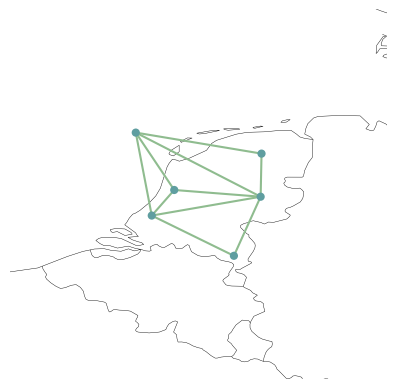

In [780]:
n.plot(margin=1, bus_sizes=0.005)

# Optimization

In [781]:
n.optimize(solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-07-13


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-07-13
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:02<00:00,  3.87it/s]
INFO:linopy.io: Writing time: 12.21s


Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-e_u32e8s.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-e_u32e8s.lp


Reading time = 4.40 seconds


INFO:gurobipy:Reading time = 4.40 seconds


obj: 1471724 rows, 657033 columns, 2938740 nonzeros


INFO:gurobipy:obj: 1471724 rows, 657033 columns, 2938740 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 1471724 rows, 657033 columns and 2938740 nonzeros


INFO:gurobipy:Optimize a model with 1471724 rows, 657033 columns and 2938740 nonzeros


Model fingerprint: 0xd9bc9276


INFO:gurobipy:Model fingerprint: 0xd9bc9276


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [2e-09, 3e+02]


INFO:gurobipy:  Matrix range     [2e-09, 3e+02]


  Objective range  [1e-02, 2e+08]


INFO:gurobipy:  Objective range  [1e-02, 2e+08]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [3e+02, 3e+05]


INFO:gurobipy:  RHS range        [3e+02, 3e+05]


Presolve removed 758068 rows and 101024 columns


INFO:gurobipy:Presolve removed 758068 rows and 101024 columns


Presolve time: 8.63s


INFO:gurobipy:Presolve time: 8.63s


Presolved: 713656 rows, 556009 columns, 2175868 nonzeros


INFO:gurobipy:Presolved: 713656 rows, 556009 columns, 2175868 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.25s


INFO:gurobipy:Ordering time: 1.25s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 33


INFO:gurobipy: Dense cols : 33


 Free vars  : 78840


INFO:gurobipy: Free vars  : 78840


 AA' NZ     : 2.154e+06


INFO:gurobipy: AA' NZ     : 2.154e+06


 Factor NZ  : 1.073e+07 (roughly 600 MB of memory)


INFO:gurobipy: Factor NZ  : 1.073e+07 (roughly 600 MB of memory)


 Factor Ops : 3.354e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.354e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.26133699e+13 -6.69026688e+13  4.28e+05 7.50e+02  1.13e+11    13s


INFO:gurobipy:   0   4.26133699e+13 -6.69026688e+13  4.28e+05 7.50e+02  1.13e+11    13s


   1   9.52458023e+13 -7.06987592e+13  3.04e+05 5.71e+05  8.08e+10    14s


INFO:gurobipy:   1   9.52458023e+13 -7.06987592e+13  3.04e+05 5.71e+05  8.08e+10    14s


   2   9.62174045e+13 -8.30526525e+13  3.00e+05 2.91e+05  5.89e+10    14s


INFO:gurobipy:   2   9.62174045e+13 -8.30526525e+13  3.00e+05 2.91e+05  5.89e+10    14s


   3   1.40132280e+14 -1.35703254e+14  2.29e+05 1.13e+05  3.44e+10    16s


INFO:gurobipy:   3   1.40132280e+14 -1.35703254e+14  2.29e+05 1.13e+05  3.44e+10    16s


   4   2.22023528e+14 -1.43663284e+14  3.59e+04 7.46e+04  1.40e+10    16s


INFO:gurobipy:   4   2.22023528e+14 -1.43663284e+14  3.59e+04 7.46e+04  1.40e+10    16s


   5   2.15080514e+14 -1.27662470e+14  1.92e+04 2.30e+04  5.16e+09    18s


INFO:gurobipy:   5   2.15080514e+14 -1.27662470e+14  1.92e+04 2.30e+04  5.16e+09    18s


   6   1.77095906e+14 -1.05939789e+14  9.16e+03 9.03e+03  2.28e+09    19s


INFO:gurobipy:   6   1.77095906e+14 -1.05939789e+14  9.16e+03 9.03e+03  2.28e+09    19s


   7   1.33537709e+14 -8.40519642e+13  5.65e+03 3.50e+03  1.11e+09    20s


INFO:gurobipy:   7   1.33537709e+14 -8.40519642e+13  5.65e+03 3.50e+03  1.11e+09    20s


   8   8.03563646e+13 -6.34755390e+13  2.61e+03 1.32e+03  4.91e+08    21s


INFO:gurobipy:   8   8.03563646e+13 -6.34755390e+13  2.61e+03 1.32e+03  4.91e+08    21s


   9   4.79754212e+13 -4.49779389e+13  1.39e+03 5.81e+02  2.46e+08    22s


INFO:gurobipy:   9   4.79754212e+13 -4.49779389e+13  1.39e+03 5.81e+02  2.46e+08    22s


  10   2.36453575e+13 -2.90733982e+13  5.87e+02 2.42e+02  1.09e+08    23s


INFO:gurobipy:  10   2.36453575e+13 -2.90733982e+13  5.87e+02 2.42e+02  1.09e+08    23s


  11   1.18383153e+13 -2.10659387e+13  2.69e+02 1.43e+02  5.87e+07    23s


INFO:gurobipy:  11   1.18383153e+13 -2.10659387e+13  2.69e+02 1.43e+02  5.87e+07    23s


  12   6.33458459e+12 -1.32865207e+13  1.37e+02 8.12e+01  3.11e+07    24s


INFO:gurobipy:  12   6.33458459e+12 -1.32865207e+13  1.37e+02 8.12e+01  3.11e+07    24s


  13   3.29760324e+12 -6.07497110e+12  6.85e+01 2.75e+01  1.29e+07    25s


INFO:gurobipy:  13   3.29760324e+12 -6.07497110e+12  6.85e+01 2.75e+01  1.29e+07    25s


  14   1.12875248e+12 -2.10305867e+12  1.71e+01 8.79e+00  3.84e+06    26s


INFO:gurobipy:  14   1.12875248e+12 -2.10305867e+12  1.71e+01 8.79e+00  3.84e+06    26s


  15   4.80105583e+11 -1.44609649e+12  3.44e+00 5.94e+00  2.14e+06    27s


INFO:gurobipy:  15   4.80105583e+11 -1.44609649e+12  3.44e+00 5.94e+00  2.14e+06    27s


  16   2.93057106e+11 -6.99847999e+11  1.05e+00 2.92e+00  1.03e+06    28s


INFO:gurobipy:  16   2.93057106e+11 -6.99847999e+11  1.05e+00 2.92e+00  1.03e+06    28s


  17   1.70705289e+11 -1.94802218e+11  2.41e-01 8.38e-01  3.46e+05    29s


INFO:gurobipy:  17   1.70705289e+11 -1.94802218e+11  2.41e-01 8.38e-01  3.46e+05    29s


  18   1.13292015e+11 -1.22923980e+11  1.33e-01 5.44e-01  2.16e+05    30s


INFO:gurobipy:  18   1.13292015e+11 -1.22923980e+11  1.33e-01 5.44e-01  2.16e+05    30s


  19   8.02863290e+10 -8.50068482e+10  8.11e-02 3.84e-01  1.48e+05    31s


INFO:gurobipy:  19   8.02863290e+10 -8.50068482e+10  8.11e-02 3.84e-01  1.48e+05    31s


  20   6.14703361e+10 -5.70690411e+10  5.37e-02 2.77e-01  1.05e+05    31s


INFO:gurobipy:  20   6.14703361e+10 -5.70690411e+10  5.37e-02 2.77e-01  1.05e+05    31s


  21   5.41939377e+10 -3.69975936e+10  4.46e-02 2.00e-01  8.01e+04    33s


INFO:gurobipy:  21   5.41939377e+10 -3.69975936e+10  4.46e-02 2.00e-01  8.01e+04    33s


  22   4.87671581e+10 -2.91842045e+10  3.83e-02 1.70e-01  6.82e+04    33s


INFO:gurobipy:  22   4.87671581e+10 -2.91842045e+10  3.83e-02 1.70e-01  6.82e+04    33s


  23   4.47638045e+10 -2.37441068e+10  3.39e-02 1.48e-01  5.97e+04    35s


INFO:gurobipy:  23   4.47638045e+10 -2.37441068e+10  3.39e-02 1.48e-01  5.97e+04    35s


  24   4.25448572e+10 -1.98912953e+10  3.15e-02 1.32e-01  5.43e+04    36s


INFO:gurobipy:  24   4.25448572e+10 -1.98912953e+10  3.15e-02 1.32e-01  5.43e+04    36s


  25   4.04490484e+10 -1.76941756e+10  2.92e-02 1.22e-01  5.04e+04    37s


INFO:gurobipy:  25   4.04490484e+10 -1.76941756e+10  2.92e-02 1.22e-01  5.04e+04    37s


  26   3.53959158e+10 -1.60423520e+10  2.38e-02 1.16e-01  4.45e+04    38s


INFO:gurobipy:  26   3.53959158e+10 -1.60423520e+10  2.38e-02 1.16e-01  4.45e+04    38s


  27   3.20937322e+10 -1.29896147e+10  2.04e-02 1.03e-01  3.89e+04    39s


INFO:gurobipy:  27   3.20937322e+10 -1.29896147e+10  2.04e-02 1.03e-01  3.89e+04    39s


  28   3.04425727e+10 -1.08791699e+10  1.87e-02 9.39e-02  3.56e+04    40s


INFO:gurobipy:  28   3.04425727e+10 -1.08791699e+10  1.87e-02 9.39e-02  3.56e+04    40s


  29   2.92193877e+10 -1.00492520e+10  1.73e-02 9.04e-02  3.38e+04    41s


INFO:gurobipy:  29   2.92193877e+10 -1.00492520e+10  1.73e-02 9.04e-02  3.38e+04    41s


  30   2.85273675e+10 -7.33195245e+09  1.66e-02 7.92e-02  3.08e+04    42s


INFO:gurobipy:  30   2.85273675e+10 -7.33195245e+09  1.66e-02 7.92e-02  3.08e+04    42s


  31   2.66355082e+10 -4.94902729e+09  1.47e-02 6.99e-02  2.71e+04    43s


INFO:gurobipy:  31   2.66355082e+10 -4.94902729e+09  1.47e-02 6.99e-02  2.71e+04    43s


  32   2.43473321e+10 -4.33972968e+09  1.21e-02 6.74e-02  2.46e+04    44s


INFO:gurobipy:  32   2.43473321e+10 -4.33972968e+09  1.21e-02 6.74e-02  2.46e+04    44s


  33   2.34700679e+10 -1.49865854e+09  1.12e-02 5.56e-02  2.13e+04    45s


INFO:gurobipy:  33   2.34700679e+10 -1.49865854e+09  1.12e-02 5.56e-02  2.13e+04    45s


  34   2.20049701e+10 -5.79431729e+08  9.69e-03 5.24e-02  1.93e+04    46s


INFO:gurobipy:  34   2.20049701e+10 -5.79431729e+08  9.69e-03 5.24e-02  1.93e+04    46s


  35   2.15150498e+10  2.56438494e+09  9.14e-03 4.07e-02  1.61e+04    47s


INFO:gurobipy:  35   2.15150498e+10  2.56438494e+09  9.14e-03 4.07e-02  1.61e+04    47s


  36   1.89468879e+10  4.19530650e+09  6.31e-03 3.40e-02  1.25e+04    48s


INFO:gurobipy:  36   1.89468879e+10  4.19530650e+09  6.31e-03 3.40e-02  1.25e+04    48s


  37   1.78680356e+10  6.56366804e+09  5.06e-03 2.49e-02  9.58e+03    49s


INFO:gurobipy:  37   1.78680356e+10  6.56366804e+09  5.06e-03 2.49e-02  9.58e+03    49s


  38   1.71455548e+10  7.40832786e+09  4.25e-03 2.17e-02  8.24e+03    51s


INFO:gurobipy:  38   1.71455548e+10  7.40832786e+09  4.25e-03 2.17e-02  8.24e+03    51s


  39   1.66088304e+10  8.65248669e+09  3.69e-03 1.70e-02  6.72e+03    52s


INFO:gurobipy:  39   1.66088304e+10  8.65248669e+09  3.69e-03 1.70e-02  6.72e+03    52s


  40   1.61066804e+10  9.24111628e+09  3.11e-03 1.49e-02  5.80e+03    53s


INFO:gurobipy:  40   1.61066804e+10  9.24111628e+09  3.11e-03 1.49e-02  5.80e+03    53s


  41   1.59719348e+10  9.75366185e+09  2.96e-03 1.30e-02  5.25e+03    54s


INFO:gurobipy:  41   1.59719348e+10  9.75366185e+09  2.96e-03 1.30e-02  5.25e+03    54s


  42   1.53710271e+10  1.04634294e+10  2.28e-03 1.03e-02  4.14e+03    55s


INFO:gurobipy:  42   1.53710271e+10  1.04634294e+10  2.28e-03 1.03e-02  4.14e+03    55s


  43   1.51039785e+10  1.12334803e+10  1.97e-03 7.56e-03  3.26e+03    56s


INFO:gurobipy:  43   1.51039785e+10  1.12334803e+10  1.97e-03 7.56e-03  3.26e+03    56s


  44   1.47881635e+10  1.13916140e+10  1.64e-03 6.94e-03  2.86e+03    57s


INFO:gurobipy:  44   1.47881635e+10  1.13916140e+10  1.64e-03 6.94e-03  2.86e+03    57s


  45   1.47737156e+10  1.15472211e+10  1.63e-03 6.36e-03  2.72e+03    58s


INFO:gurobipy:  45   1.47737156e+10  1.15472211e+10  1.63e-03 6.36e-03  2.72e+03    58s


  46   1.45695240e+10  1.16772733e+10  1.41e-03 5.89e-03  2.43e+03    59s


INFO:gurobipy:  46   1.45695240e+10  1.16772733e+10  1.41e-03 5.89e-03  2.43e+03    59s


  47   1.44672872e+10  1.17538839e+10  1.30e-03 5.60e-03  2.28e+03    60s


INFO:gurobipy:  47   1.44672872e+10  1.17538839e+10  1.30e-03 5.60e-03  2.28e+03    60s


  48   1.42031856e+10  1.22237290e+10  1.00e-03 3.81e-03  1.66e+03    61s


INFO:gurobipy:  48   1.42031856e+10  1.22237290e+10  1.00e-03 3.81e-03  1.66e+03    61s


  49   1.41616663e+10  1.22498987e+10  9.58e-04 3.71e-03  1.61e+03    62s


INFO:gurobipy:  49   1.41616663e+10  1.22498987e+10  9.58e-04 3.71e-03  1.61e+03    62s


  50   1.39906572e+10  1.23725481e+10  7.79e-04 3.23e-03  1.36e+03    63s


INFO:gurobipy:  50   1.39906572e+10  1.23725481e+10  7.79e-04 3.23e-03  1.36e+03    63s


  51   1.38160800e+10  1.24846801e+10  6.01e-04 2.80e-03  1.12e+03    64s


INFO:gurobipy:  51   1.38160800e+10  1.24846801e+10  6.01e-04 2.80e-03  1.12e+03    64s


  52   1.37642506e+10  1.25906002e+10  5.49e-04 2.38e-03  9.87e+02    65s


INFO:gurobipy:  52   1.37642506e+10  1.25906002e+10  5.49e-04 2.38e-03  9.87e+02    65s


  53   1.36972414e+10  1.27075232e+10  4.84e-04 1.93e-03  8.32e+02    66s


INFO:gurobipy:  53   1.36972414e+10  1.27075232e+10  4.84e-04 1.93e-03  8.32e+02    66s


  54   1.36260807e+10  1.27835060e+10  4.16e-04 1.61e-03  7.08e+02    67s


INFO:gurobipy:  54   1.36260807e+10  1.27835060e+10  4.16e-04 1.61e-03  7.08e+02    67s


  55   1.35650106e+10  1.28800093e+10  3.57e-04 1.22e-03  5.75e+02    68s


INFO:gurobipy:  55   1.35650106e+10  1.28800093e+10  3.57e-04 1.22e-03  5.75e+02    68s


  56   1.35283091e+10  1.29212833e+10  3.22e-04 1.05e-03  5.10e+02    69s


INFO:gurobipy:  56   1.35283091e+10  1.29212833e+10  3.22e-04 1.05e-03  5.10e+02    69s


  57   1.33890053e+10  1.30252109e+10  1.93e-04 6.10e-04  3.05e+02    70s


INFO:gurobipy:  57   1.33890053e+10  1.30252109e+10  1.93e-04 6.10e-04  3.05e+02    70s


  58   1.33270792e+10  1.30782895e+10  1.36e-04 3.76e-04  2.09e+02    71s


INFO:gurobipy:  58   1.33270792e+10  1.30782895e+10  1.36e-04 3.76e-04  2.09e+02    71s


  59   1.32896455e+10  1.31027132e+10  1.03e-04 2.64e-04  1.57e+02    72s


INFO:gurobipy:  59   1.32896455e+10  1.31027132e+10  1.03e-04 2.64e-04  1.57e+02    72s


  60   1.32307562e+10  1.31274205e+10  5.20e-05 1.48e-04  8.66e+01    73s


INFO:gurobipy:  60   1.32307562e+10  1.31274205e+10  5.20e-05 1.48e-04  8.66e+01    73s


  61   1.32201839e+10  1.31344939e+10  4.32e-05 1.21e-04  7.18e+01    73s


INFO:gurobipy:  61   1.32201839e+10  1.31344939e+10  4.32e-05 1.21e-04  7.18e+01    73s


  62   1.32091171e+10  1.31462375e+10  3.48e-05 7.38e-05  5.26e+01    74s


INFO:gurobipy:  62   1.32091171e+10  1.31462375e+10  3.48e-05 7.38e-05  5.26e+01    74s


  63   1.31924732e+10  1.31531772e+10  3.39e-05 4.45e-05  3.29e+01    75s


INFO:gurobipy:  63   1.31924732e+10  1.31531772e+10  3.39e-05 4.45e-05  3.29e+01    75s


  64   1.31839978e+10  1.31599431e+10  1.64e-05 1.97e-05  2.01e+01    76s


INFO:gurobipy:  64   1.31839978e+10  1.31599431e+10  1.64e-05 1.97e-05  2.01e+01    76s


  65   1.31716278e+10  1.31623636e+10  7.43e-06 1.13e-05  7.75e+00    76s


INFO:gurobipy:  65   1.31716278e+10  1.31623636e+10  7.43e-06 1.13e-05  7.75e+00    76s


  66   1.31706217e+10  1.31628594e+10  6.11e-06 9.62e-06  6.50e+00    77s


INFO:gurobipy:  66   1.31706217e+10  1.31628594e+10  6.11e-06 9.62e-06  6.50e+00    77s


  67   1.31698449e+10  1.31636027e+10  5.67e-06 7.16e-06  5.22e+00    79s


INFO:gurobipy:  67   1.31698449e+10  1.31636027e+10  5.67e-06 7.16e-06  5.22e+00    79s


  68   1.31682414e+10  1.31637968e+10  6.88e-06 6.53e-06  3.73e+00    80s


INFO:gurobipy:  68   1.31682414e+10  1.31637968e+10  6.88e-06 6.53e-06  3.73e+00    80s


  69   1.31671523e+10  1.31644971e+10  9.69e-06 4.35e-06  2.23e+00    81s


INFO:gurobipy:  69   1.31671523e+10  1.31644971e+10  9.69e-06 4.35e-06  2.23e+00    81s


  70   1.31668532e+10  1.31652322e+10  2.54e-05 2.07e-06  1.36e+00    82s


INFO:gurobipy:  70   1.31668532e+10  1.31652322e+10  2.54e-05 2.07e-06  1.36e+00    82s


  71   1.31665557e+10  1.31653730e+10  1.59e-05 1.58e-06  9.90e-01    83s


INFO:gurobipy:  71   1.31665557e+10  1.31653730e+10  1.59e-05 1.58e-06  9.90e-01    83s


  72   1.31660602e+10  1.31657821e+10  5.49e-05 2.67e-07  2.32e-01    86s


INFO:gurobipy:  72   1.31660602e+10  1.31657821e+10  5.49e-05 2.67e-07  2.32e-01    86s


  73   1.31659440e+10  1.31658354e+10  3.94e-05 2.54e-07  9.07e-02    88s


INFO:gurobipy:  73   1.31659440e+10  1.31658354e+10  3.94e-05 2.54e-07  9.07e-02    88s


  74   1.31659299e+10  1.31658363e+10  3.10e-05 2.20e-07  7.83e-02    90s


INFO:gurobipy:  74   1.31659299e+10  1.31658363e+10  3.10e-05 2.20e-07  7.83e-02    90s


  75   1.31659012e+10  1.31658543e+10  1.46e-05 1.83e-07  3.93e-02    92s


INFO:gurobipy:  75   1.31659012e+10  1.31658543e+10  1.46e-05 1.83e-07  3.93e-02    92s


  76   1.31658857e+10  1.31658720e+10  6.54e-06 3.55e-06  1.15e-02    93s


INFO:gurobipy:  76   1.31658857e+10  1.31658720e+10  6.54e-06 3.55e-06  1.15e-02    93s


  77   1.31658803e+10  1.31658771e+10  1.45e-05 6.74e-07  2.66e-03    95s


INFO:gurobipy:  77   1.31658803e+10  1.31658771e+10  1.45e-05 6.74e-07  2.66e-03    95s


  78   1.31658790e+10  1.31658782e+10  1.41e-05 1.64e-07  6.44e-04    96s


INFO:gurobipy:  78   1.31658790e+10  1.31658782e+10  1.41e-05 1.64e-07  6.44e-04    96s


  79   1.31658786e+10  1.31658784e+10  2.07e-05 2.24e-07  1.43e-04    97s


INFO:gurobipy:  79   1.31658786e+10  1.31658784e+10  2.07e-05 2.24e-07  1.43e-04    97s


  80   1.31658785e+10  1.31658785e+10  4.92e-07 5.00e-06  1.03e-06    98s


INFO:gurobipy:  80   1.31658785e+10  1.31658785e+10  4.92e-07 5.00e-06  1.03e-06    98s


  81   1.31658785e+10  1.31658785e+10  1.40e-07 4.65e-06  1.45e-08    99s


INFO:gurobipy:  81   1.31658785e+10  1.31658785e+10  1.40e-07 4.65e-06  1.45e-08    99s


  82   1.31658785e+10  1.31658785e+10  3.46e-10 1.71e-07  2.67e-12   100s


INFO:gurobipy:  82   1.31658785e+10  1.31658785e+10  3.46e-10 1.71e-07  2.67e-12   100s


INFO:gurobipy:


Barrier solved model in 82 iterations and 99.81 seconds (37.76 work units)


INFO:gurobipy:Barrier solved model in 82 iterations and 99.81 seconds (37.76 work units)


Optimal objective 1.31658785e+10


INFO:gurobipy:Optimal objective 1.31658785e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  347674 DPushes remaining with DInf 0.0000000e+00               102s


INFO:gurobipy:  347674 DPushes remaining with DInf 0.0000000e+00               102s


    6003 DPushes remaining with DInf 0.0000000e+00               105s


INFO:gurobipy:    6003 DPushes remaining with DInf 0.0000000e+00               105s


     251 DPushes remaining with DInf 0.0000000e+00               110s


INFO:gurobipy:     251 DPushes remaining with DInf 0.0000000e+00               110s


       0 DPushes remaining with DInf 0.0000000e+00               111s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00               111s


INFO:gurobipy:


   25008 PPushes remaining with PInf 0.0000000e+00               111s


INFO:gurobipy:   25008 PPushes remaining with PInf 0.0000000e+00               111s


    6021 PPushes remaining with PInf 0.0000000e+00               116s


INFO:gurobipy:    6021 PPushes remaining with PInf 0.0000000e+00               116s


       0 PPushes remaining with PInf 0.0000000e+00               117s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00               117s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8704729e+02    117s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8704729e+02    117s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  237397    1.3165878e+10   0.000000e+00   1.870473e+02    118s


INFO:gurobipy:  237397    1.3165878e+10   0.000000e+00   1.870473e+02    118s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


  237399    1.3165878e+10   0.000000e+00   0.000000e+00    120s


INFO:gurobipy:  237399    1.3165878e+10   0.000000e+00   0.000000e+00    120s


INFO:gurobipy:


Solved in 237399 iterations and 119.91 seconds (46.40 work units)


INFO:gurobipy:Solved in 237399 iterations and 119.91 seconds (46.40 work units)


Optimal objective  1.316587846e+10


INFO:gurobipy:Optimal objective  1.316587846e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 657033 primals, 1471724 duals
Objective: 1.32e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

In [782]:
def plot_dispatch(n, time, ymin, ymax):

    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)

    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)

    fig, ax = plt.subplots(figsize=(25, 15))

    color = p_by_carrier.columns.map(n.carriers.color)

    p_by_carrier.where(p_by_carrier>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=color,
    )
    plt.rcParams.update({'font.size': 14})

    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]

    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=charge.columns.map(n.carriers.color),
        )

    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c='k')
    
    plt.legend(loc=(1.01,0))
    ax.set_ylabel("GW")
    
    #set axis limit to min and max overall
    ax.set_ylim(ymin, ymax)
    # ax.set_ylim(p_by_carrier.where(p_by_carrier>0).loc[time].min(), p_by_carrier.where(p_by_carrier>0).loc[time].min().max())

/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/3364439340.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/3364439340.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
/opt/anaconda3/envs/pitie/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


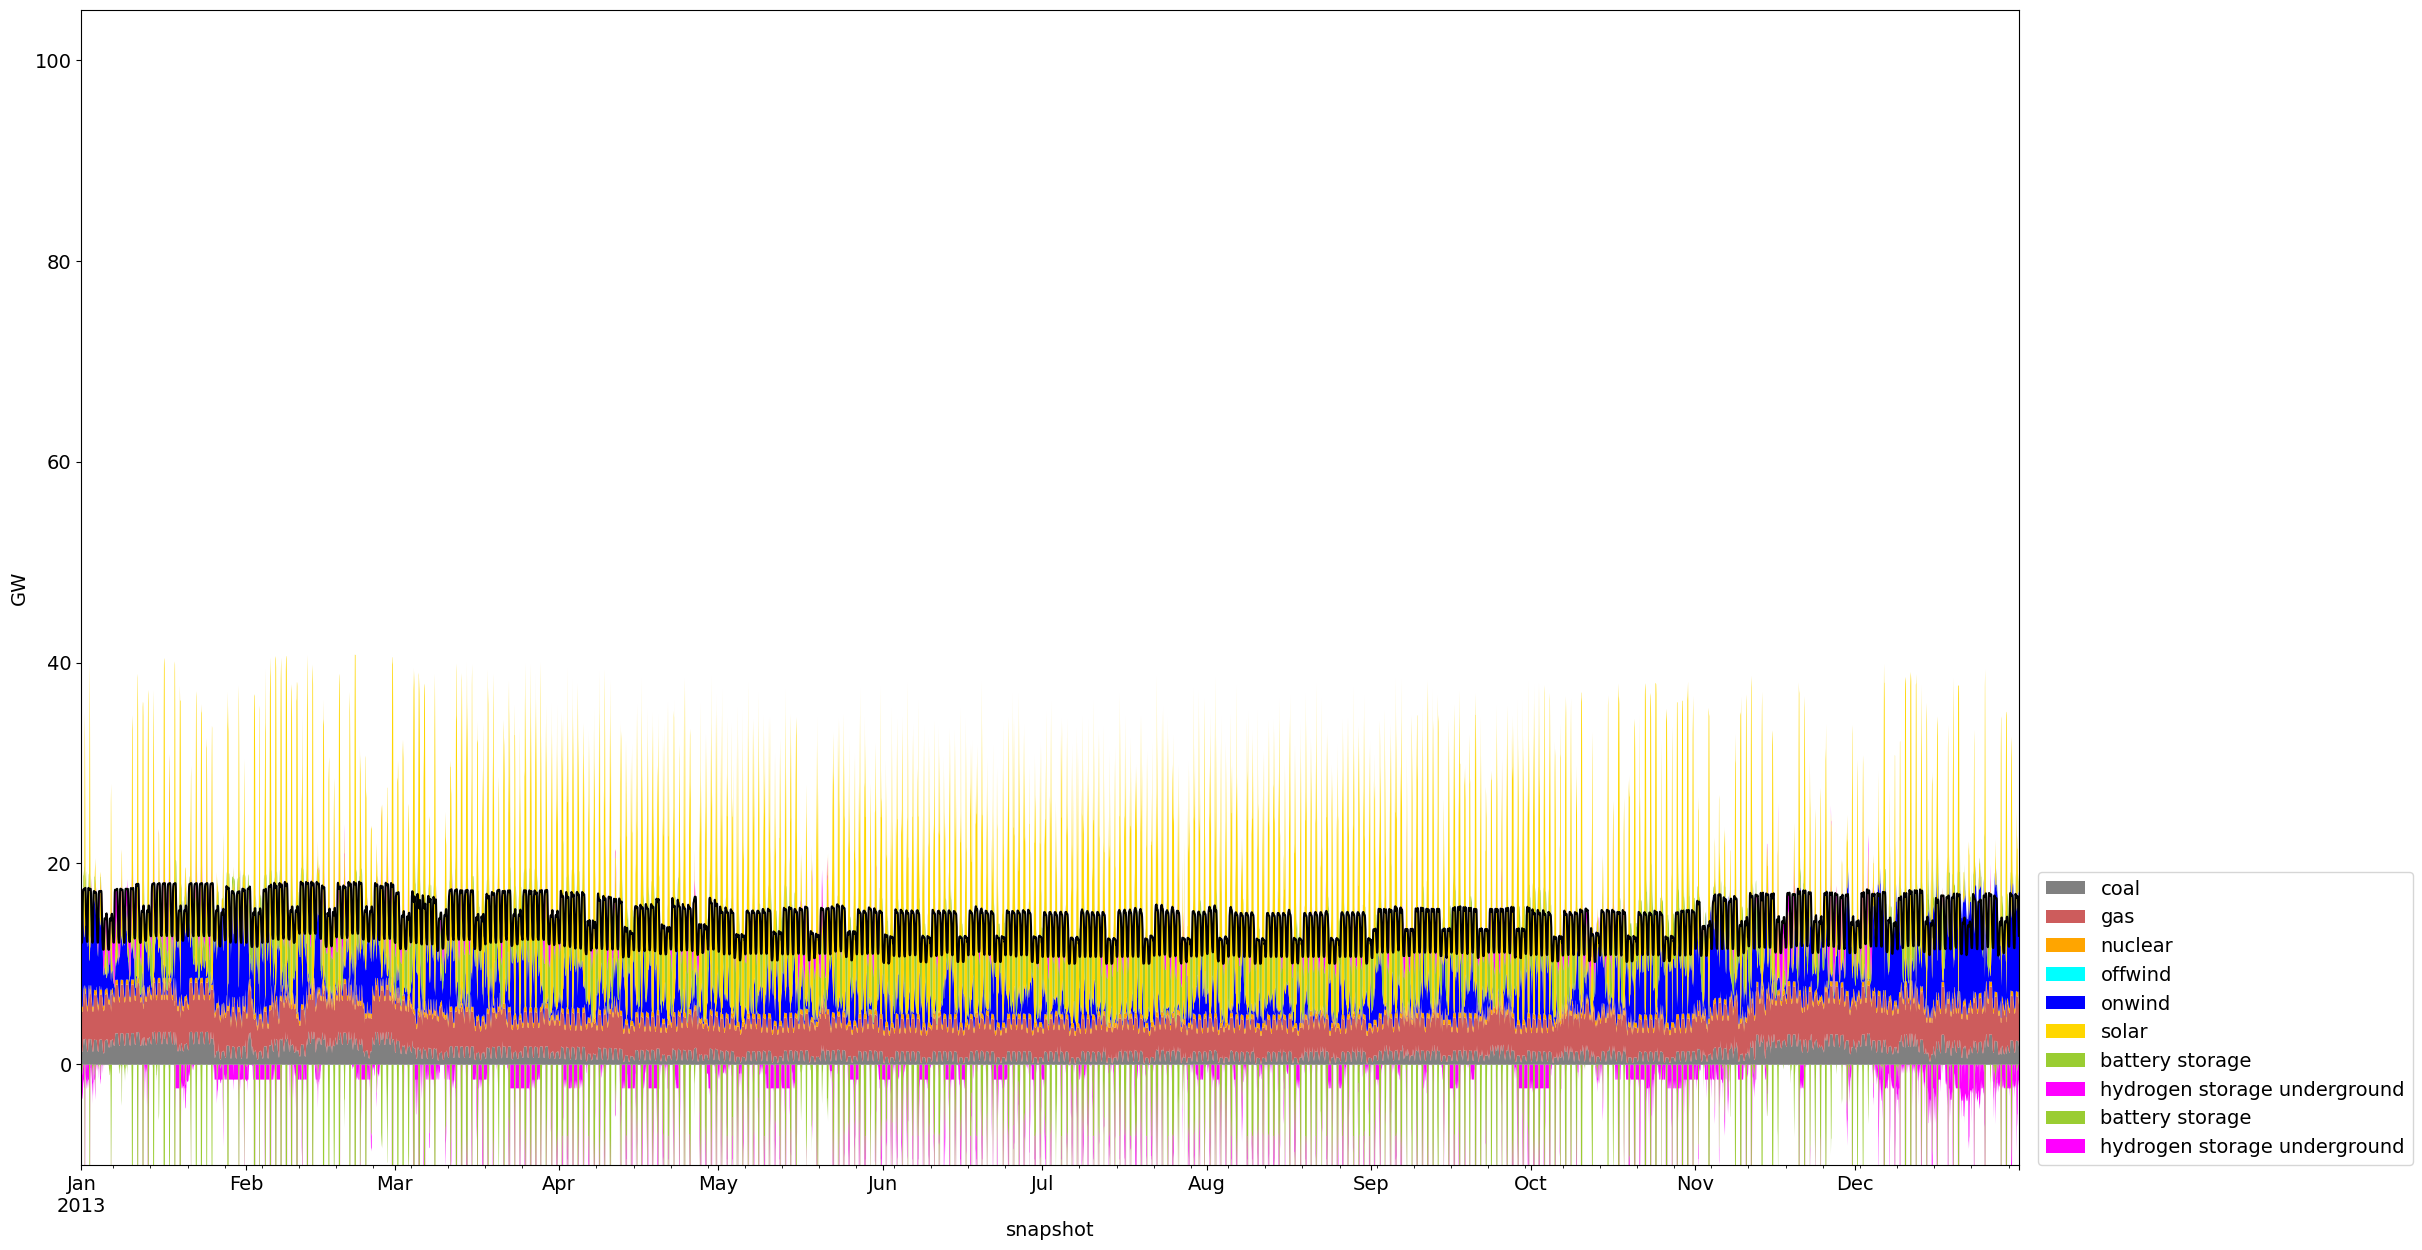

In [783]:
plot_dispatch(n, "2013", -10, 105)

# Scenario No CO2 Emissions

In [784]:
n1 = n.copy()

In [785]:
n1.add(
    "GlobalConstraint",
    "CO2Limit",
    carrier_attribute="co2_emissions",
    sense="<=",
    constant=0,
)

In [786]:
# for idx in rep_points_gdf.index :
#     n1.remove("Generator",f"gas {idx}")
#     n1.remove("Generator",f"coal {idx}")

In [787]:
n1.generators

attribute bus control type   p_nom  p_nom_mod  p_nom_extendable  p_nom_min  \
Generator                                                                    
coal 1      1      PQ       1600.0        0.0             False        0.0   
gas 1       1      PQ       4306.0        0.0             False        0.0   
nuclear 1   1      PQ          0.0        0.0             False        0.0   
coal 2      2      PQ        590.0        0.0             False        0.0   
gas 2       2      PQ        349.0        0.0             False        0.0   
nuclear 2   2      PQ          0.0        0.0             False        0.0   
coal 3      3      PQ          0.0        0.0             False        0.0   
gas 3       3      PQ          0.0        0.0             False        0.0   
nuclear 3   3      PQ          0.0        0.0             False        0.0   
coal 4      4      PQ        685.0        0.0             False        0.0   
gas 4       4      PQ       1025.0        0.0             False        0.0   
nuclear 4   4      PQ          0.0        0.0             False        0.0   
coal 5      5      PQ       2140.0        0.0             False        0.0   
gas 5       5      PQ       1753.0        0.0             False        0.0   
nuclear 5   5      PQ        485.0        0.0             False        0.0   
coal 6      6      PQ          0.0        0.0             False        0.0   
gas 6       6      PQ       1879.0        0.0             False        0.0   
nuclear 6   6      PQ          0.0        0.0             False        0.0   
solar 1     1      PQ          0.0        0.0              True        0.0   
solar 2     2      PQ          0.0        0.0              True        0.0   
solar 3     3      PQ          0.0        0.0              True        0.0   
solar 4     4      PQ          0.0        0.0              True        0.0   
solar 5     5      PQ          0.0        0.0              True        0.0   
offwind 6   6      PQ          0.0        0.0              True        0.0   
onwind 1    1      PQ          0.0        0.0              True        0.0   
onwind 2    2      PQ          0.0        0.0              True        0.0   
onwind 3    3      PQ          0.0        0.0              True        0.0   
onwind 4    4      PQ          0.0        0.0              True        0.0   
onwind 5    5      PQ          0.0        0.0              True        0.0   

attribute  p_nom_max  p_min_pu  p_max_pu  ...  min_up_time  min_down_time  \
Generator                                 ...                               
coal 1           inf       0.0       1.0  ...            0              0   
gas 1            inf       0.0       1.0  ...            0              0   
nuclear 1        inf       0.0       1.0  ...            0              0   
coal 2           inf       0.0       1.0  ...            0              0   
gas 2            inf       0.0       1.0  ...            0              0   
nuclear 2        inf       0.0       1.0  ...            0              0   
coal 3           inf       0.0       1.0  ...            0              0   
gas 3            inf       0.0       1.0  ...            0              0   
nuclear 3        inf       0.0       1.0  ...            0              0   
coal 4           inf       0.0       1.0  ...            0              0   
gas 4            inf       0.0       1.0  ...            0              0   
nuclear 4        inf       0.0       1.0  ...            0              0   
coal 5           inf       0.0       1.0  ...            0              0   
gas 5            inf       0.0       1.0  ...            0              0   
nuclear 5        inf       0.0       1.0  ...            0              0   
coal 6           inf       0.0       1.0  ...            0              0   
gas 6            inf       0.0       1.0  ...            0              0   
nuclear 6        inf       0.0       1.0  ...            0              0   
solar 1    233298.00       0.0       1.0 

In [789]:
n1.optimize(solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-07-13


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-07-13
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]
INFO:linopy.io: Writing time: 24.72s


Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-407vl4sn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-407vl4sn.lp


Reading time = 4.55 seconds


INFO:gurobipy:Reading time = 4.55 seconds


obj: 1471725 rows, 657033 columns, 3043860 nonzeros


INFO:gurobipy:obj: 1471725 rows, 657033 columns, 3043860 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 1471725 rows, 657033 columns and 3043860 nonzeros


INFO:gurobipy:Optimize a model with 1471725 rows, 657033 columns and 3043860 nonzeros


Model fingerprint: 0xb712fbd7


INFO:gurobipy:Model fingerprint: 0xb712fbd7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [2e-09, 3e+02]


INFO:gurobipy:  Matrix range     [2e-09, 3e+02]


  Objective range  [1e-02, 2e+08]


INFO:gurobipy:  Objective range  [1e-02, 2e+08]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [3e+02, 3e+05]


INFO:gurobipy:  RHS range        [3e+02, 3e+05]


Presolve removed 771264 rows and 193059 columns


INFO:gurobipy:Presolve removed 771264 rows and 193059 columns


Presolve time: 10.15s


INFO:gurobipy:Presolve time: 10.15s


Presolved: 700461 rows, 463974 columns, 2220164 nonzeros


INFO:gurobipy:Presolved: 700461 rows, 463974 columns, 2220164 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.16s


INFO:gurobipy:Ordering time: 2.16s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 33


INFO:gurobipy: Dense cols : 33


 Free vars  : 65645


INFO:gurobipy: Free vars  : 65645


 AA' NZ     : 2.396e+06


INFO:gurobipy: AA' NZ     : 2.396e+06


 Factor NZ  : 1.068e+07 (roughly 600 MB of memory)


INFO:gurobipy: Factor NZ  : 1.068e+07 (roughly 600 MB of memory)


 Factor Ops : 3.340e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.340e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.08226740e+13 -1.98975608e+12  2.23e+05 6.73e+02  4.40e+10    16s


INFO:gurobipy:   0   2.08226740e+13 -1.98975608e+12  2.23e+05 6.73e+02  4.40e+10    16s


   1   4.61788400e+13 -8.02000118e+12  1.52e+05 5.07e+05  3.42e+10    18s


INFO:gurobipy:   1   4.61788400e+13 -8.02000118e+12  1.52e+05 5.07e+05  3.42e+10    18s


   2   4.81968333e+13 -2.57142262e+13  1.48e+05 3.10e+05  2.42e+10    21s


INFO:gurobipy:   2   4.81968333e+13 -2.57142262e+13  1.48e+05 3.10e+05  2.42e+10    21s


   3   7.43716804e+13 -5.33060765e+13  9.70e+04 1.04e+05  1.10e+10    23s


INFO:gurobipy:   3   7.43716804e+13 -5.33060765e+13  9.70e+04 1.04e+05  1.10e+10    23s


   4   1.03655940e+14 -8.24167931e+13  2.02e+04 2.08e+04  2.57e+09    26s


INFO:gurobipy:   4   1.03655940e+14 -8.24167931e+13  2.02e+04 2.08e+04  2.57e+09    26s


   5   8.45025168e+13 -4.73815542e+13  7.98e+03 6.27e+03  9.17e+08    28s


INFO:gurobipy:   5   8.45025168e+13 -4.73815542e+13  7.98e+03 6.27e+03  9.17e+08    28s


   6   4.61093359e+13 -2.60647859e+13  2.50e+03 2.21e+03  3.19e+08    30s


INFO:gurobipy:   6   4.61093359e+13 -2.60647859e+13  2.50e+03 2.21e+03  3.19e+08    30s


   7   2.33475762e+13 -1.37261848e+13  1.13e+03 7.65e+02  1.23e+08    32s


INFO:gurobipy:   7   2.33475762e+13 -1.37261848e+13  1.13e+03 7.65e+02  1.23e+08    32s


   8   1.16142345e+13 -7.96655450e+12  5.00e+02 3.06e+02  5.28e+07    34s


INFO:gurobipy:   8   1.16142345e+13 -7.96655450e+12  5.00e+02 3.06e+02  5.28e+07    34s


   9   4.60196182e+12 -5.27877572e+12  1.75e+02 1.58e+02  2.31e+07    36s


INFO:gurobipy:   9   4.60196182e+12 -5.27877572e+12  1.75e+02 1.58e+02  2.31e+07    36s


  10   1.31980395e+12 -2.14643381e+12  3.56e+01 3.30e+01  5.94e+06    39s


INFO:gurobipy:  10   1.31980395e+12 -2.14643381e+12  3.56e+01 3.30e+01  5.94e+06    39s


  11   6.24768406e+11 -9.38629010e+11  1.29e+01 1.23e+01  2.36e+06    41s


INFO:gurobipy:  11   6.24768406e+11 -9.38629010e+11  1.29e+01 1.23e+01  2.36e+06    41s


  12   3.94818259e+11 -5.58198816e+11  6.47e+00 7.23e+00  1.36e+06    44s


INFO:gurobipy:  12   3.94818259e+11 -5.58198816e+11  6.47e+00 7.23e+00  1.36e+06    44s


  13   2.99956781e+11 -3.15115187e+11  4.12e+00 4.20e+00  8.21e+05    46s


INFO:gurobipy:  13   2.99956781e+11 -3.15115187e+11  4.12e+00 4.20e+00  8.21e+05    46s


  14   1.79806087e+11 -1.52437448e+11  1.74e+00 2.10e+00  4.06e+05    48s


INFO:gurobipy:  14   1.79806087e+11 -1.52437448e+11  1.74e+00 2.10e+00  4.06e+05    48s


  15   1.48592642e+11 -9.67315742e+10  1.30e+00 1.50e+00  2.91e+05    51s


INFO:gurobipy:  15   1.48592642e+11 -9.67315742e+10  1.30e+00 1.50e+00  2.91e+05    51s


  16   1.28523830e+11 -6.83332828e+10  1.05e+00 1.15e+00  2.27e+05    54s


INFO:gurobipy:  16   1.28523830e+11 -6.83332828e+10  1.05e+00 1.15e+00  2.27e+05    54s


  17   1.03681951e+11 -5.42156787e+10  7.71e-01 9.65e-01  1.79e+05    56s


INFO:gurobipy:  17   1.03681951e+11 -5.42156787e+10  7.71e-01 9.65e-01  1.79e+05    56s


  18   8.69692683e+10 -3.21906085e+10  5.97e-01 6.57e-01  1.31e+05    58s


INFO:gurobipy:  18   8.69692683e+10 -3.21906085e+10  5.97e-01 6.57e-01  1.31e+05    58s


  19   7.52042871e+10 -2.10226510e+10  4.81e-01 5.12e-01  1.04e+05    61s


INFO:gurobipy:  19   7.52042871e+10 -2.10226510e+10  4.81e-01 5.12e-01  1.04e+05    61s


  20   6.94273484e+10 -1.91603501e+10  4.26e-01 4.87e-01  9.54e+04    64s


INFO:gurobipy:  20   6.94273484e+10 -1.91603501e+10  4.26e-01 4.87e-01  9.54e+04    64s


  21   6.21805277e+10 -1.04945417e+10  3.59e-01 3.79e-01  7.72e+04    66s


INFO:gurobipy:  21   6.21805277e+10 -1.04945417e+10  3.59e-01 3.79e-01  7.72e+04    66s


  22   5.69784894e+10 -8.72139586e+09  3.11e-01 3.55e-01  6.96e+04    68s


INFO:gurobipy:  22   5.69784894e+10 -8.72139586e+09  3.11e-01 3.55e-01  6.96e+04    68s


  23   5.34831633e+10 -5.00599517e+09  2.81e-01 3.05e-01  6.15e+04    71s


INFO:gurobipy:  23   5.34831633e+10 -5.00599517e+09  2.81e-01 3.05e-01  6.15e+04    71s


  24   5.11782486e+10 -4.03506621e+09  2.60e-01 2.92e-01  5.79e+04    73s


INFO:gurobipy:  24   5.11782486e+10 -4.03506621e+09  2.60e-01 2.92e-01  5.79e+04    73s


  25   4.84203153e+10 -3.13564482e+08  2.36e-01 2.45e-01  5.08e+04    76s


INFO:gurobipy:  25   4.84203153e+10 -3.13564482e+08  2.36e-01 2.45e-01  5.08e+04    76s


  26   4.70701607e+10  7.92016646e+08  2.25e-01 2.31e-01  4.81e+04    78s


INFO:gurobipy:  26   4.70701607e+10  7.92016646e+08  2.25e-01 2.31e-01  4.81e+04    78s


  27   4.42855295e+10  3.39857927e+09  2.00e-01 2.03e-01  4.23e+04    81s


INFO:gurobipy:  27   4.42855295e+10  3.39857927e+09  2.00e-01 2.03e-01  4.23e+04    81s


  28   4.13360304e+10  4.12023790e+09  1.74e-01 1.95e-01  3.85e+04    84s


INFO:gurobipy:  28   4.13360304e+10  4.12023790e+09  1.74e-01 1.95e-01  3.85e+04    84s


  29   4.02205573e+10  4.79504137e+09  1.63e-01 1.87e-01  3.66e+04    86s


INFO:gurobipy:  29   4.02205573e+10  4.79504137e+09  1.63e-01 1.87e-01  3.66e+04    86s


  30   3.93921553e+10  6.70806659e+09  1.56e-01 1.67e-01  3.37e+04    89s


INFO:gurobipy:  30   3.93921553e+10  6.70806659e+09  1.56e-01 1.67e-01  3.37e+04    89s


  31   3.69739094e+10  8.02670291e+09  1.34e-01 1.54e-01  2.98e+04    92s


INFO:gurobipy:  31   3.69739094e+10  8.02670291e+09  1.34e-01 1.54e-01  2.98e+04    92s


  32   3.57834447e+10  9.08638009e+09  1.23e-01 1.42e-01  2.74e+04    95s


INFO:gurobipy:  32   3.57834447e+10  9.08638009e+09  1.23e-01 1.42e-01  2.74e+04    95s


  33   3.46515786e+10  1.04702095e+10  1.12e-01 1.27e-01  2.48e+04    98s


INFO:gurobipy:  33   3.46515786e+10  1.04702095e+10  1.12e-01 1.27e-01  2.48e+04    98s


  34   3.38673538e+10  1.13878984e+10  1.05e-01 1.17e-01  2.30e+04   103s


INFO:gurobipy:  34   3.38673538e+10  1.13878984e+10  1.05e-01 1.17e-01  2.30e+04   103s


  35   3.34297078e+10  1.16792540e+10  1.00e-01 1.14e-01  2.22e+04   105s


INFO:gurobipy:  35   3.34297078e+10  1.16792540e+10  1.00e-01 1.14e-01  2.22e+04   105s


  36   3.29017126e+10  1.27930473e+10  9.54e-02 1.02e-01  2.05e+04   108s


INFO:gurobipy:  36   3.29017126e+10  1.27930473e+10  9.54e-02 1.02e-01  2.05e+04   108s


  37   3.20901910e+10  1.33225381e+10  8.75e-02 9.69e-02  1.91e+04   111s


INFO:gurobipy:  37   3.20901910e+10  1.33225381e+10  8.75e-02 9.69e-02  1.91e+04   111s


  38   3.17034926e+10  1.35656700e+10  8.33e-02 9.44e-02  1.85e+04   113s


INFO:gurobipy:  38   3.17034926e+10  1.35656700e+10  8.33e-02 9.44e-02  1.85e+04   113s


  39   3.09055163e+10  1.45059862e+10  7.55e-02 8.46e-02  1.67e+04   116s


INFO:gurobipy:  39   3.09055163e+10  1.45059862e+10  7.55e-02 8.46e-02  1.67e+04   116s


  40   3.04485229e+10  1.46786620e+10  7.09e-02 8.30e-02  1.60e+04   119s


INFO:gurobipy:  40   3.04485229e+10  1.46786620e+10  7.09e-02 8.30e-02  1.60e+04   119s


  41   3.00030333e+10  1.51925566e+10  6.65e-02 7.82e-02  1.51e+04   121s


INFO:gurobipy:  41   3.00030333e+10  1.51925566e+10  6.65e-02 7.82e-02  1.51e+04   121s


  42   2.96593414e+10  1.54306909e+10  6.27e-02 7.59e-02  1.45e+04   124s


INFO:gurobipy:  42   2.96593414e+10  1.54306909e+10  6.27e-02 7.59e-02  1.45e+04   124s


  43   2.92344615e+10  1.66022877e+10  5.84e-02 6.46e-02  1.28e+04   126s


INFO:gurobipy:  43   2.92344615e+10  1.66022877e+10  5.84e-02 6.46e-02  1.28e+04   126s


  44   2.87563632e+10  1.69471212e+10  5.34e-02 6.14e-02  1.20e+04   130s


INFO:gurobipy:  44   2.87563632e+10  1.69471212e+10  5.34e-02 6.14e-02  1.20e+04   130s


  45   2.83837192e+10  1.77318922e+10  4.96e-02 5.44e-02  1.08e+04   133s


INFO:gurobipy:  45   2.83837192e+10  1.77318922e+10  4.96e-02 5.44e-02  1.08e+04   133s


  46   2.81082697e+10  1.79580051e+10  4.66e-02 5.23e-02  1.03e+04   135s


INFO:gurobipy:  46   2.81082697e+10  1.79580051e+10  4.66e-02 5.23e-02  1.03e+04   135s


  47   2.78464272e+10  1.81922364e+10  4.36e-02 5.02e-02  9.78e+03   138s


INFO:gurobipy:  47   2.78464272e+10  1.81922364e+10  4.36e-02 5.02e-02  9.78e+03   138s


  48   2.76663373e+10  1.84805418e+10  4.17e-02 4.75e-02  9.30e+03   140s


INFO:gurobipy:  48   2.76663373e+10  1.84805418e+10  4.17e-02 4.75e-02  9.30e+03   140s


  49   2.74587077e+10  1.85348796e+10  3.94e-02 4.71e-02  9.04e+03   144s


INFO:gurobipy:  49   2.74587077e+10  1.85348796e+10  3.94e-02 4.71e-02  9.04e+03   144s


  50   2.70608478e+10  1.90922531e+10  3.47e-02 4.22e-02  8.07e+03   146s


INFO:gurobipy:  50   2.70608478e+10  1.90922531e+10  3.47e-02 4.22e-02  8.07e+03   146s


  51   2.68885010e+10  1.93653997e+10  3.27e-02 3.99e-02  7.62e+03   148s


INFO:gurobipy:  51   2.68885010e+10  1.93653997e+10  3.27e-02 3.99e-02  7.62e+03   148s


  52   2.66929688e+10  1.98631380e+10  3.03e-02 3.58e-02  6.91e+03   151s


INFO:gurobipy:  52   2.66929688e+10  1.98631380e+10  3.03e-02 3.58e-02  6.91e+03   151s


  53   2.65595101e+10  2.02216820e+10  2.86e-02 3.27e-02  6.41e+03   153s


INFO:gurobipy:  53   2.65595101e+10  2.02216820e+10  2.86e-02 3.27e-02  6.41e+03   153s


  54   2.64029120e+10  2.03697826e+10  2.65e-02 3.15e-02  6.10e+03   156s


INFO:gurobipy:  54   2.64029120e+10  2.03697826e+10  2.65e-02 3.15e-02  6.10e+03   156s


  55   2.60343602e+10  2.10478303e+10  2.19e-02 2.60e-02  5.04e+03   158s


INFO:gurobipy:  55   2.60343602e+10  2.10478303e+10  2.19e-02 2.60e-02  5.04e+03   158s


  56   2.59127825e+10  2.12955919e+10  2.02e-02 2.40e-02  4.67e+03   160s


INFO:gurobipy:  56   2.59127825e+10  2.12955919e+10  2.02e-02 2.40e-02  4.67e+03   160s


  57   2.57235645e+10  2.15048515e+10  1.78e-02 2.23e-02  4.27e+03   163s


INFO:gurobipy:  57   2.57235645e+10  2.15048515e+10  1.78e-02 2.23e-02  4.27e+03   163s


  58   2.54997050e+10  2.16470883e+10  1.51e-02 2.12e-02  3.90e+03   166s


INFO:gurobipy:  58   2.54997050e+10  2.16470883e+10  1.51e-02 2.12e-02  3.90e+03   166s


  59   2.53780123e+10  2.18528759e+10  1.37e-02 1.95e-02  3.57e+03   168s


INFO:gurobipy:  59   2.53780123e+10  2.18528759e+10  1.37e-02 1.95e-02  3.57e+03   168s


  60   2.53226391e+10  2.20379543e+10  1.30e-02 1.81e-02  3.33e+03   171s


INFO:gurobipy:  60   2.53226391e+10  2.20379543e+10  1.30e-02 1.81e-02  3.33e+03   171s


  61   2.52399868e+10  2.22082756e+10  1.20e-02 1.67e-02  3.07e+03   173s


INFO:gurobipy:  61   2.52399868e+10  2.22082756e+10  1.20e-02 1.67e-02  3.07e+03   173s


  62   2.51723839e+10  2.24414077e+10  1.12e-02 1.49e-02  2.76e+03   176s


INFO:gurobipy:  62   2.51723839e+10  2.24414077e+10  1.12e-02 1.49e-02  2.76e+03   176s


  63   2.51064040e+10  2.25961186e+10  1.04e-02 1.36e-02  2.54e+03   178s


INFO:gurobipy:  63   2.51064040e+10  2.25961186e+10  1.04e-02 1.36e-02  2.54e+03   178s


  64   2.50340916e+10  2.26356357e+10  9.45e-03 1.33e-02  2.43e+03   181s


INFO:gurobipy:  64   2.50340916e+10  2.26356357e+10  9.45e-03 1.33e-02  2.43e+03   181s


  65   2.50040748e+10  2.26766746e+10  9.08e-03 1.30e-02  2.36e+03   184s


INFO:gurobipy:  65   2.50040748e+10  2.26766746e+10  9.08e-03 1.30e-02  2.36e+03   184s


  66   2.49284410e+10  2.27799337e+10  8.16e-03 1.22e-02  2.18e+03   186s


INFO:gurobipy:  66   2.49284410e+10  2.27799337e+10  8.16e-03 1.22e-02  2.18e+03   186s


  67   2.48926023e+10  2.28989655e+10  7.71e-03 1.12e-02  2.02e+03   189s


INFO:gurobipy:  67   2.48926023e+10  2.28989655e+10  7.71e-03 1.12e-02  2.02e+03   189s


  68   2.48328748e+10  2.29603870e+10  6.97e-03 1.07e-02  1.90e+03   191s


INFO:gurobipy:  68   2.48328748e+10  2.29603870e+10  6.97e-03 1.07e-02  1.90e+03   191s


  69   2.47691397e+10  2.30800155e+10  6.11e-03 9.76e-03  1.71e+03   194s


INFO:gurobipy:  69   2.47691397e+10  2.30800155e+10  6.11e-03 9.76e-03  1.71e+03   194s


  70   2.47090716e+10  2.31394278e+10  5.37e-03 9.30e-03  1.59e+03   196s


INFO:gurobipy:  70   2.47090716e+10  2.31394278e+10  5.37e-03 9.30e-03  1.59e+03   196s


  71   2.46595712e+10  2.32325527e+10  4.77e-03 8.55e-03  1.45e+03   198s


INFO:gurobipy:  71   2.46595712e+10  2.32325527e+10  4.77e-03 8.55e-03  1.45e+03   198s


  72   2.46233781e+10  2.33204139e+10  4.33e-03 7.84e-03  1.32e+03   201s


INFO:gurobipy:  72   2.46233781e+10  2.33204139e+10  4.33e-03 7.84e-03  1.32e+03   201s


  73   2.45708907e+10  2.33977504e+10  3.70e-03 7.20e-03  1.19e+03   204s


INFO:gurobipy:  73   2.45708907e+10  2.33977504e+10  3.70e-03 7.20e-03  1.19e+03   204s


  74   2.45487820e+10  2.34738807e+10  3.44e-03 6.54e-03  1.09e+03   206s


INFO:gurobipy:  74   2.45487820e+10  2.34738807e+10  3.44e-03 6.54e-03  1.09e+03   206s


  75   2.45061489e+10  2.35298553e+10  2.93e-03 6.08e-03  9.94e+02   209s


INFO:gurobipy:  75   2.45061489e+10  2.35298553e+10  2.93e-03 6.08e-03  9.94e+02   209s


  76   2.44865025e+10  2.36015680e+10  2.70e-03 5.45e-03  9.01e+02   211s


INFO:gurobipy:  76   2.44865025e+10  2.36015680e+10  2.70e-03 5.45e-03  9.01e+02   211s


  77   2.44652623e+10  2.36794534e+10  2.45e-03 4.82e-03  8.00e+02   214s


INFO:gurobipy:  77   2.44652623e+10  2.36794534e+10  2.45e-03 4.82e-03  8.00e+02   214s


  78   2.44462451e+10  2.36995419e+10  2.23e-03 4.66e-03  7.61e+02   216s


INFO:gurobipy:  78   2.44462451e+10  2.36995419e+10  2.23e-03 4.66e-03  7.61e+02   216s


  79   2.44397616e+10  2.37594692e+10  2.15e-03 4.16e-03  6.92e+02   219s


INFO:gurobipy:  79   2.44397616e+10  2.37594692e+10  2.15e-03 4.16e-03  6.92e+02   219s


  80   2.44167443e+10  2.37991982e+10  1.88e-03 3.83e-03  6.29e+02   221s


INFO:gurobipy:  80   2.44167443e+10  2.37991982e+10  1.88e-03 3.83e-03  6.29e+02   221s


  81   2.44026751e+10  2.38354726e+10  1.73e-03 3.52e-03  5.78e+02   224s


INFO:gurobipy:  81   2.44026751e+10  2.38354726e+10  1.73e-03 3.52e-03  5.78e+02   224s


  82   2.43768395e+10  2.38779932e+10  1.43e-03 3.18e-03  5.09e+02   226s


INFO:gurobipy:  82   2.43768395e+10  2.38779932e+10  1.43e-03 3.18e-03  5.09e+02   226s


  83   2.43667050e+10  2.38979484e+10  1.31e-03 3.01e-03  4.78e+02   229s


INFO:gurobipy:  83   2.43667050e+10  2.38979484e+10  1.31e-03 3.01e-03  4.78e+02   229s


  84   2.43579501e+10  2.39378901e+10  1.22e-03 2.66e-03  4.28e+02   231s


INFO:gurobipy:  84   2.43579501e+10  2.39378901e+10  1.22e-03 2.66e-03  4.28e+02   231s


  85   2.43525176e+10  2.39495795e+10  1.16e-03 2.57e-03  4.11e+02   234s


INFO:gurobipy:  85   2.43525176e+10  2.39495795e+10  1.16e-03 2.57e-03  4.11e+02   234s


  86   2.43439435e+10  2.39649746e+10  1.07e-03 2.44e-03  3.87e+02   236s


INFO:gurobipy:  86   2.43439435e+10  2.39649746e+10  1.07e-03 2.44e-03  3.87e+02   236s


  87   2.43353757e+10  2.39942142e+10  9.73e-04 2.19e-03  3.48e+02   239s


INFO:gurobipy:  87   2.43353757e+10  2.39942142e+10  9.73e-04 2.19e-03  3.48e+02   239s


  88   2.43286965e+10  2.40117297e+10  9.02e-04 2.04e-03  3.24e+02   241s


INFO:gurobipy:  88   2.43286965e+10  2.40117297e+10  9.02e-04 2.04e-03  3.24e+02   241s


  89   2.43235962e+10  2.40263565e+10  8.52e-04 1.91e-03  3.03e+02   244s


INFO:gurobipy:  89   2.43235962e+10  2.40263565e+10  8.52e-04 1.91e-03  3.03e+02   244s


  90   2.43166571e+10  2.40457434e+10  7.82e-04 1.74e-03  2.77e+02   247s


INFO:gurobipy:  90   2.43166571e+10  2.40457434e+10  7.82e-04 1.74e-03  2.77e+02   247s


  91   2.43140986e+10  2.40496877e+10  7.57e-04 1.70e-03  2.70e+02   249s


INFO:gurobipy:  91   2.43140986e+10  2.40496877e+10  7.57e-04 1.70e-03  2.70e+02   249s


  92   2.43045816e+10  2.40596572e+10  6.53e-04 1.62e-03  2.51e+02   251s


INFO:gurobipy:  92   2.43045816e+10  2.40596572e+10  6.53e-04 1.62e-03  2.51e+02   251s


  93   2.43017624e+10  2.40664425e+10  6.24e-04 1.56e-03  2.41e+02   254s


INFO:gurobipy:  93   2.43017624e+10  2.40664425e+10  6.24e-04 1.56e-03  2.41e+02   254s


  94   2.42998630e+10  2.40795635e+10  6.01e-04 1.44e-03  2.25e+02   257s


INFO:gurobipy:  94   2.42998630e+10  2.40795635e+10  6.01e-04 1.44e-03  2.25e+02   257s


  95   2.42971577e+10  2.41025386e+10  5.75e-04 1.24e-03  1.99e+02   259s


INFO:gurobipy:  95   2.42971577e+10  2.41025386e+10  5.75e-04 1.24e-03  1.99e+02   259s


  96   2.42775969e+10  2.41249217e+10  3.69e-04 1.05e-03  1.57e+02   261s


INFO:gurobipy:  96   2.42775969e+10  2.41249217e+10  3.69e-04 1.05e-03  1.57e+02   261s


  97   2.42686169e+10  2.41533289e+10  2.80e-04 7.86e-04  1.18e+02   264s


INFO:gurobipy:  97   2.42686169e+10  2.41533289e+10  2.80e-04 7.86e-04  1.18e+02   264s


  98   2.42661521e+10  2.41614388e+10  2.57e-04 7.17e-04  1.07e+02   266s


INFO:gurobipy:  98   2.42661521e+10  2.41614388e+10  2.57e-04 7.17e-04  1.07e+02   266s


  99   2.42638645e+10  2.41668311e+10  2.36e-04 6.69e-04  9.97e+01   269s


INFO:gurobipy:  99   2.42638645e+10  2.41668311e+10  2.36e-04 6.69e-04  9.97e+01   269s


 100   2.42583651e+10  2.41766798e+10  1.86e-04 5.77e-04  8.41e+01   271s


INFO:gurobipy: 100   2.42583651e+10  2.41766798e+10  1.86e-04 5.77e-04  8.41e+01   271s


 101   2.42561700e+10  2.41995481e+10  1.68e-04 3.64e-04  5.79e+01   274s


INFO:gurobipy: 101   2.42561700e+10  2.41995481e+10  1.68e-04 3.64e-04  5.79e+01   274s


 102   2.42491618e+10  2.42124723e+10  1.11e-04 2.33e-04  3.75e+01   276s


INFO:gurobipy: 102   2.42491618e+10  2.42124723e+10  1.11e-04 2.33e-04  3.75e+01   276s


 103   2.42463456e+10  2.42213389e+10  8.49e-05 1.38e-04  2.54e+01   279s


INFO:gurobipy: 103   2.42463456e+10  2.42213389e+10  8.49e-05 1.38e-04  2.54e+01   279s


 104   2.42415014e+10  2.42275088e+10  5.35e-05 7.61e-05  1.42e+01   282s


INFO:gurobipy: 104   2.42415014e+10  2.42275088e+10  5.35e-05 7.61e-05  1.42e+01   282s


 105   2.42405712e+10  2.42290337e+10  6.49e-05 6.18e-05  1.17e+01   284s


INFO:gurobipy: 105   2.42405712e+10  2.42290337e+10  6.49e-05 6.18e-05  1.17e+01   284s


 106   2.42388255e+10  2.42330824e+10  1.07e-04 2.14e-05  5.73e+00   286s


INFO:gurobipy: 106   2.42388255e+10  2.42330824e+10  1.07e-04 2.14e-05  5.73e+00   286s


 107   2.42375872e+10  2.42343715e+10  4.85e-05 9.00e-06  3.18e+00   289s


INFO:gurobipy: 107   2.42375872e+10  2.42343715e+10  4.85e-05 9.00e-06  3.18e+00   289s


 108   2.42374254e+10  2.42344761e+10  4.48e-05 8.08e-06  2.91e+00   292s


INFO:gurobipy: 108   2.42374254e+10  2.42344761e+10  4.48e-05 8.08e-06  2.91e+00   292s


 109   2.42368186e+10  2.42348955e+10  3.00e-05 4.53e-06  1.89e+00   294s


INFO:gurobipy: 109   2.42368186e+10  2.42348955e+10  3.00e-05 4.53e-06  1.89e+00   294s


 110   2.42364605e+10  2.42350833e+10  1.99e-05 3.01e-06  1.35e+00   299s


INFO:gurobipy: 110   2.42364605e+10  2.42350833e+10  1.99e-05 3.01e-06  1.35e+00   299s


 111   2.42358425e+10  2.42353039e+10  3.55e-05 1.24e-06  5.30e-01   303s


INFO:gurobipy: 111   2.42358425e+10  2.42353039e+10  3.55e-05 1.24e-06  5.30e-01   303s


 112   2.42355795e+10  2.42354274e+10  1.84e-04 3.69e-07  1.50e-01   308s


INFO:gurobipy: 112   2.42355795e+10  2.42354274e+10  1.84e-04 3.69e-07  1.50e-01   308s


 113   2.42355302e+10  2.42354489e+10  6.71e-05 2.47e-07  8.11e-02   310s


INFO:gurobipy: 113   2.42355302e+10  2.42354489e+10  6.71e-05 2.47e-07  8.11e-02   310s


 114   2.42355127e+10  2.42354697e+10  3.45e-05 1.30e-07  4.29e-02   313s


INFO:gurobipy: 114   2.42355127e+10  2.42354697e+10  3.45e-05 1.30e-07  4.29e-02   313s


 115   2.42355082e+10  2.42354776e+10  2.52e-05 1.34e-07  3.04e-02   315s


INFO:gurobipy: 115   2.42355082e+10  2.42354776e+10  2.52e-05 1.34e-07  3.04e-02   315s


 116   2.42355026e+10  2.42354888e+10  1.49e-05 2.01e-07  1.37e-02   318s


INFO:gurobipy: 116   2.42355026e+10  2.42354888e+10  1.49e-05 2.01e-07  1.37e-02   318s


 117   2.42354970e+10  2.42354927e+10  3.00e-06 1.68e-07  4.30e-03   320s


INFO:gurobipy: 117   2.42354970e+10  2.42354927e+10  3.00e-06 1.68e-07  4.30e-03   320s


 118   2.42354956e+10  2.42354945e+10  3.66e-06 5.22e-08  1.11e-03   322s


INFO:gurobipy: 118   2.42354956e+10  2.42354945e+10  3.66e-06 5.22e-08  1.11e-03   322s


 119   2.42354952e+10  2.42354951e+10  6.39e-06 1.80e-07  1.21e-04   324s


INFO:gurobipy: 119   2.42354952e+10  2.42354951e+10  6.39e-06 1.80e-07  1.21e-04   324s


 120   2.42354952e+10  2.42354952e+10  1.21e-05 3.87e-07  1.79e-05   327s


INFO:gurobipy: 120   2.42354952e+10  2.42354952e+10  1.21e-05 3.87e-07  1.79e-05   327s


 121   2.42354952e+10  2.42354952e+10  8.82e-07 5.01e-06  9.38e-07   329s


INFO:gurobipy: 121   2.42354952e+10  2.42354952e+10  8.82e-07 5.01e-06  9.38e-07   329s


 122   2.42354952e+10  2.42354952e+10  6.54e-07 5.24e-06  1.42e-07   331s


INFO:gurobipy: 122   2.42354952e+10  2.42354952e+10  6.54e-07 5.24e-06  1.42e-07   331s


 123   2.42354952e+10  2.42354952e+10  2.55e-07 1.05e-05  2.00e-08   333s


INFO:gurobipy: 123   2.42354952e+10  2.42354952e+10  2.55e-07 1.05e-05  2.00e-08   333s


 124   2.42354952e+10  2.42354952e+10  4.66e-08 2.04e-06  2.76e-10   335s


INFO:gurobipy: 124   2.42354952e+10  2.42354952e+10  4.66e-08 2.04e-06  2.76e-10   335s


INFO:gurobipy:


Barrier solved model in 124 iterations and 335.11 seconds (54.36 work units)


INFO:gurobipy:Barrier solved model in 124 iterations and 335.11 seconds (54.36 work units)


Optimal objective 2.42354952e+10


INFO:gurobipy:Optimal objective 2.42354952e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  183784 DPushes remaining with DInf 0.0000000e+00               337s


INFO:gurobipy:  183784 DPushes remaining with DInf 0.0000000e+00               337s


    4836 DPushes remaining with DInf 0.0000000e+00               341s


INFO:gurobipy:    4836 DPushes remaining with DInf 0.0000000e+00               341s


    1369 DPushes remaining with DInf 0.0000000e+00               346s


INFO:gurobipy:    1369 DPushes remaining with DInf 0.0000000e+00               346s


     515 DPushes remaining with DInf 0.0000000e+00               350s


INFO:gurobipy:     515 DPushes remaining with DInf 0.0000000e+00               350s


       0 DPushes remaining with DInf 0.0000000e+00               354s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00               354s


INFO:gurobipy:


   53787 PPushes remaining with PInf 4.6874373e-05               354s


INFO:gurobipy:   53787 PPushes remaining with PInf 4.6874373e-05               354s


   40739 PPushes remaining with PInf 0.0000000e+00               365s


INFO:gurobipy:   40739 PPushes remaining with PInf 0.0000000e+00               365s


   33830 PPushes remaining with PInf 0.0000000e+00               372s


INFO:gurobipy:   33830 PPushes remaining with PInf 0.0000000e+00               372s


   31323 PPushes remaining with PInf 0.0000000e+00               375s


INFO:gurobipy:   31323 PPushes remaining with PInf 0.0000000e+00               375s


   17673 PPushes remaining with PInf 0.0000000e+00               389s


INFO:gurobipy:   17673 PPushes remaining with PInf 0.0000000e+00               389s


   12178 PPushes remaining with PInf 0.0000000e+00               392s


INFO:gurobipy:   12178 PPushes remaining with PInf 0.0000000e+00               392s


    2436 PPushes remaining with PInf 0.0000000e+00               395s


INFO:gurobipy:    2436 PPushes remaining with PInf 0.0000000e+00               395s


       0 PPushes remaining with PInf 0.0000000e+00               397s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00               397s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8383638e+01    398s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8383638e+01    398s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  150977    2.4235495e+10   0.000000e+00   9.838364e+01    398s


INFO:gurobipy:  150977    2.4235495e+10   0.000000e+00   9.838364e+01    398s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


  150979    2.4235495e+10   0.000000e+00   0.000000e+00    403s


INFO:gurobipy:  150979    2.4235495e+10   0.000000e+00   0.000000e+00    403s


INFO:gurobipy:


Solved in 150979 iterations and 402.55 seconds (68.11 work units)


INFO:gurobipy:Solved in 150979 iterations and 402.55 seconds (68.11 work units)


Optimal objective  2.423549520e+10


INFO:gurobipy:Optimal objective  2.423549520e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 657033 primals, 1471725 duals
Objective: 2.42e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/3364439340.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/3364439340.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
/opt/anaconda3/envs/pitie/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


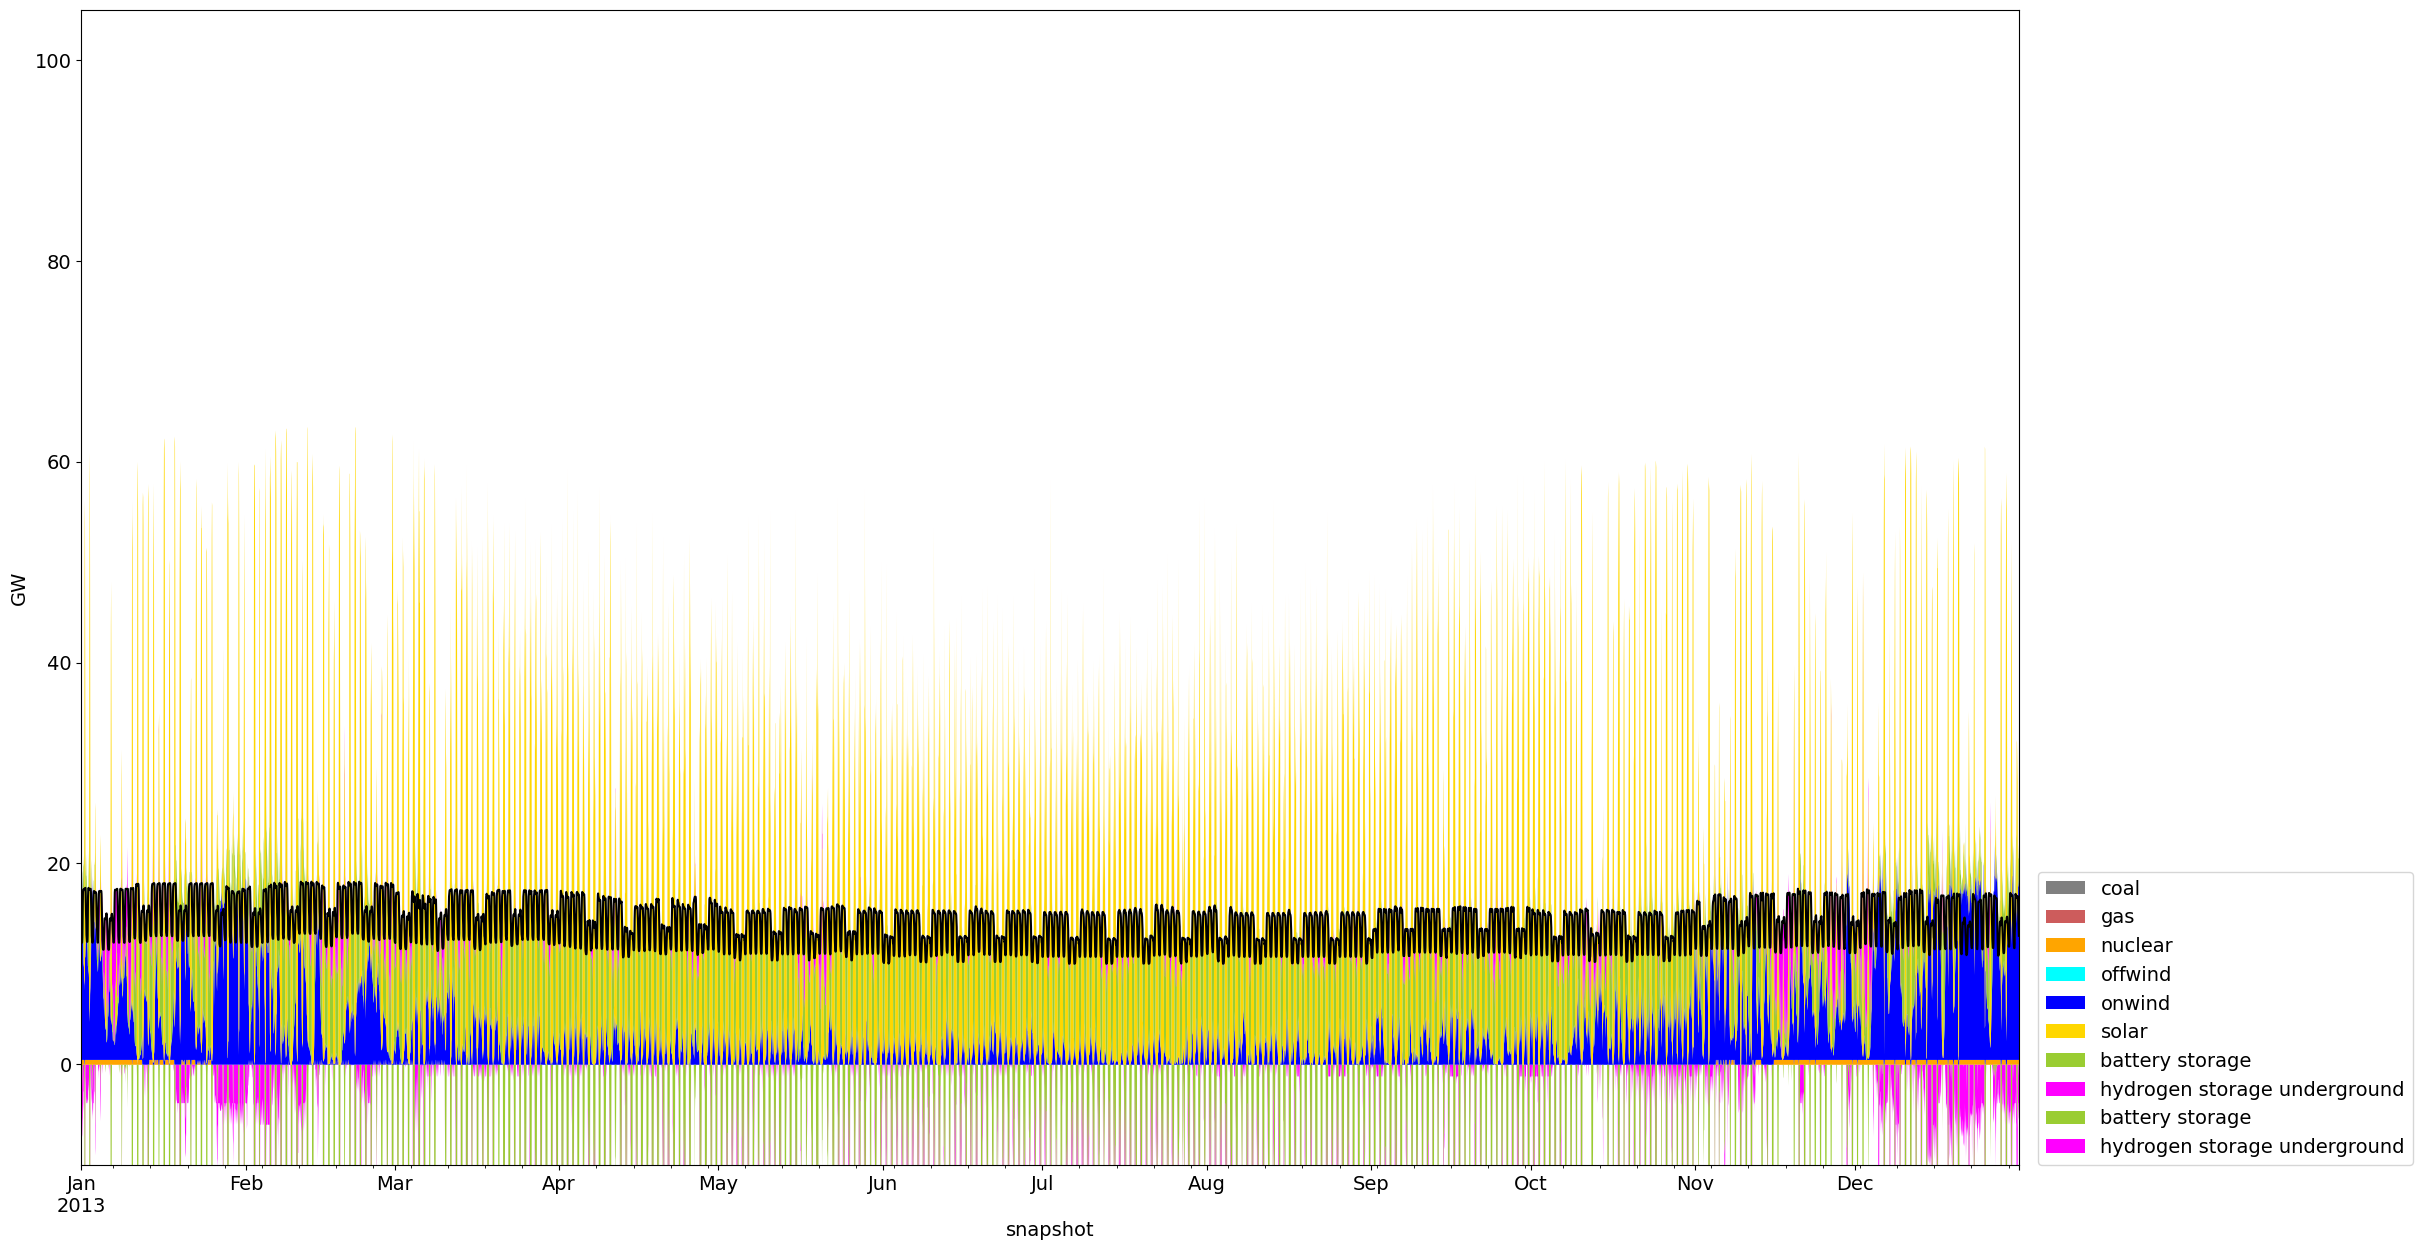

In [790]:
plot_dispatch(n1, "2013", -10, 105)

# Outputs of interest 

In [791]:
buses_marginal_price_0 = n.buses_t.marginal_price.copy()
buses_marginal_price_1 = n1.buses_t.marginal_price.copy()

In [792]:
buses_marginal_price_0

Bus                       1      2            3           4          5    6
snapshot                                                                   
2013-01-01 00:00:00  24.568  1.508   941.472490  550.600443  32.213321  0.0
2013-01-01 01:00:00  24.568  1.508   941.472490  550.600443  32.213321  0.0
2013-01-01 02:00:00  24.568  1.508   941.472490  603.712006  32.213321  0.0
2013-01-01 03:00:00  24.568  1.508   941.472490  603.712006  32.213321  0.0
2013-01-01 04:00:00  24.568  1.508   941.472490  603.712006  32.213321  0.0
...                     ...    ...          ...         ...        ...  ...
2013-12-31 19:00:00  24.568  1.508  1032.288029  603.712006  32.213321  0.0
2013-12-31 20:00:00  24.568  1.508  1032.288029  603.712006  32.213321  0.0
2013-12-31 21:00:00  24.568  1.508  1032.288029  603.712006  32.213321  0.0
2013-12-31 22:00:00  24.568  1.508  1032.288029  603.712006  32.213321  0.0
2013-12-31 23:00:00  24.568  1.508  1032.288029  603.712006  32.213321  0.0

[8760 rows x 6 columns]

In [793]:
buses_marginal_price_1

Bus                      1      2            3            4           5  \
snapshot                                                                  
2013-01-01 00:00:00  1.508  1.508   941.472490  1008.090304  874.736105   
2013-01-01 01:00:00  1.508  1.508   941.472490  1008.090304  874.736105   
2013-01-01 02:00:00  1.508  1.508   941.472490  1008.090304  874.736105   
2013-01-01 03:00:00  1.508  1.508   941.472490  1008.090304  874.736105   
2013-01-01 04:00:00  1.508  1.508   941.472490  1008.090304  874.736105   
...                    ...    ...          ...          ...         ...   
2013-12-31 19:00:00  1.508  1.508  1032.288029  1008.090304  874.736105   
2013-12-31 20:00:00  1.508  1.508  1032.288029  1008.090304  874.736105   
2013-12-31 21:00:00  1.508  1.508  1032.288029  1008.090304  874.736105   
2013-12-31 22:00:00  1.508  1.508  1032.288029  1008.090304  874.736105   
2013-12-31 23:00:00  1.508  1.508  1032.288029  1008.090304  874.736105   

Bus                       6  
snapshot                     
2013-01-01 00:00:00  0.0000  
2013-01-01 01:00:00  0.0000  
2013-01-01 02:00:00  0.0000  
2013-01-01 03:00:00  0.0000  
2013-01-01 04:00:00  0.0212  
...                     ...  
2013-12-31 19:00:00  0.0000  
2013-12-31 20:00:00  0.0000  
2013-12-31 21:00:00  0.0000  
2013-12-31 22:00:00  0.0000  
2013-12-31 23:00:00  0.0000  

[8760 rows x 6 columns]

In [794]:
n1.generators.p_nom_opt

Generator
coal 1        1600.000000
gas 1         4306.000000
nuclear 1        0.000000
coal 2         590.000000
gas 2          349.000000
nuclear 2        0.000000
coal 3           0.000000
gas 3            0.000000
nuclear 3        0.000000
coal 4         685.000000
gas 4         1025.000000
nuclear 4        0.000000
coal 5        2140.000000
gas 5         1753.000000
nuclear 5      485.000000
coal 6           0.000000
gas 6         1879.000000
nuclear 6        0.000000
solar 1       4789.590677
solar 2      18207.071100
solar 3      42201.000000
solar 4      60556.947182
solar 5      38138.223007
offwind 6        0.000000
onwind 1      5924.845681
onwind 2     10357.650000
onwind 3      3581.100000
onwind 4      2205.450000
onwind 5      3563.100000
Name: p_nom_opt, dtype: float64

In [795]:
n.storage_units.p_nom_opt

StorageUnit
battery storage 1                    0.000000
battery storage 2                 1896.206441
battery storage 3                 9995.955392
battery storage 4                 5180.875353
battery storage 5                    0.000000
battery storage 6                    0.000000
hydrogen storage underground 1       0.000000
hydrogen storage underground 2    1474.031973
hydrogen storage underground 3    3462.055581
hydrogen storage underground 4     873.125349
hydrogen storage underground 5       0.000000
hydrogen storage underground 6       0.000000
Name: p_nom_opt, dtype: float64

In [796]:
n.storage_units.max_hours

StorageUnit
battery storage 1                   6.0
battery storage 2                   6.0
battery storage 3                   6.0
battery storage 4                   6.0
battery storage 5                   6.0
battery storage 6                   6.0
hydrogen storage underground 1    300.0
hydrogen storage underground 2    300.0
hydrogen storage underground 3    300.0
hydrogen storage underground 4    300.0
hydrogen storage underground 5    300.0
hydrogen storage underground 6    300.0
Name: max_hours, dtype: float64

In [797]:
n.storage_units.p_nom_opt.div(1e3) * n.storage_units.max_hours  # GWh

StorageUnit
battery storage 1                    0.000000
battery storage 2                   11.377239
battery storage 3                   59.975732
battery storage 4                   31.085252
battery storage 5                    0.000000
battery storage 6                    0.000000
hydrogen storage underground 1       0.000000
hydrogen storage underground 2     442.209592
hydrogen storage underground 3    1038.616674
hydrogen storage underground 4     261.937605
hydrogen storage underground 5       0.000000
hydrogen storage underground 6       0.000000
dtype: float64

In [798]:
def system_cost(n):
    tsc = n.statistics.capex() + n.statistics.opex()
    gdf_combined = n.statistics.capex().add(n.statistics.opex(), fill_value=0)
    return gdf_combined.droplevel(0)/1e6  # million €/a

costs0 = system_cost(n)
costs1 = system_cost(n1)
#costs = costs.fillna(0)
#costs0 = costs0.dropna()
#costs1 = costs1.dropna()
#costs0

In [799]:
#system_cost(n1).plot.pie(figsize=(2, 2))

In [800]:
type(costs0)

pandas.core.series.Series

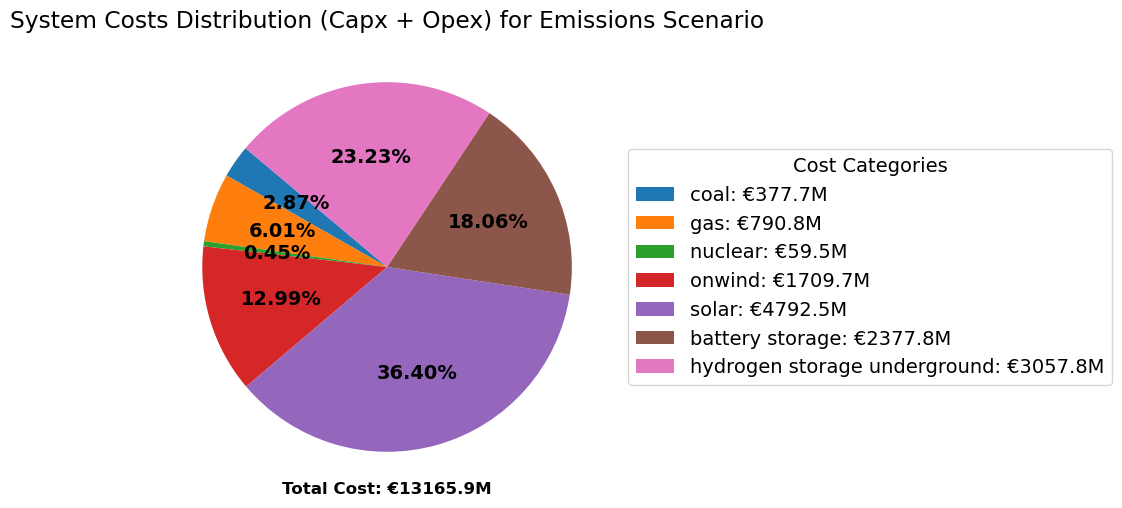

In [801]:
def func(pct, allvals):
    return "{:.2f}%".format(pct)

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(costs0, labels=costs0.index, autopct=lambda pct: func(pct, costs0), startangle=140, textprops=dict(color="w"))

# Format the text on the pie chart
for text in autotexts:
    text.set_color('black')
    text.set_weight('bold')

# Create custom legend with absolute values
legend_labels = [f"{label}: €{value:.1f}M" for label, value in zip(costs0.index, costs0)]
ax.legend(wedges, legend_labels, title="Cost Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("System Costs Distribution (Capx + Opex) for Emissions Scenario")

total_cost = costs0.sum()
plt.text(0, -1.2, f"Total Cost: €{total_cost:.1f}M", ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()

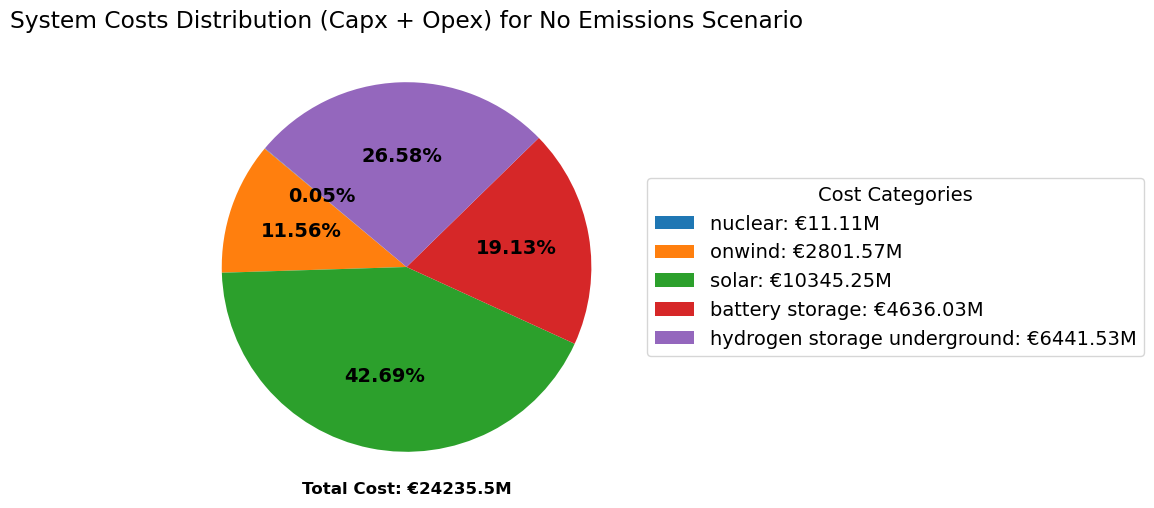

In [802]:
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(costs1, labels=costs1.index, autopct=lambda pct: func(pct, costs1), startangle=140, textprops=dict(color="w"))

# Format the text on the pie chart
for text in autotexts:
    text.set_color('black')
    text.set_weight('bold')

# Create custom legend with absolute values
legend_labels = [f"{label}: €{value:.2f}M" for label, value in zip(costs1.index, costs1)]
ax.legend(wedges, legend_labels, title="Cost Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

total_cost = costs1.sum()
plt.text(0, -1.2, f"Total Cost: €{total_cost:.1f}M", ha='center', va='center', fontsize=12, fontweight='bold')

ax.set_title("System Costs Distribution (Capx + Opex) for No Emissions Scenario")
plt.show()

In [803]:
print("costs scenario Emissions M€", costs0.sum())
print("costs scenario No Emissions M€", costs1.sum())

costs scenario Emissions M€ 13165.878462525432
costs scenario No Emissions M€ 24235.495203921328


In [804]:
n.statistics.capex()

component    carrier                     
Generator    onwind                          1.670786e+09
             solar                           4.791859e+09
StorageUnit  battery storage                 2.377848e+09
             hydrogen storage underground    3.057820e+09
dtype: float64

In [805]:
n.statistics.opex().droplevel(0)

carrier
coal       3.776760e+08
gas        7.908262e+08
nuclear    5.953678e+07
onwind     3.888908e+07
solar      6.378157e+05
dtype: float64

In [806]:
cap1 = n1.generators.groupby("carrier").p_nom_opt.sum()
cap1 = cap1/1e3

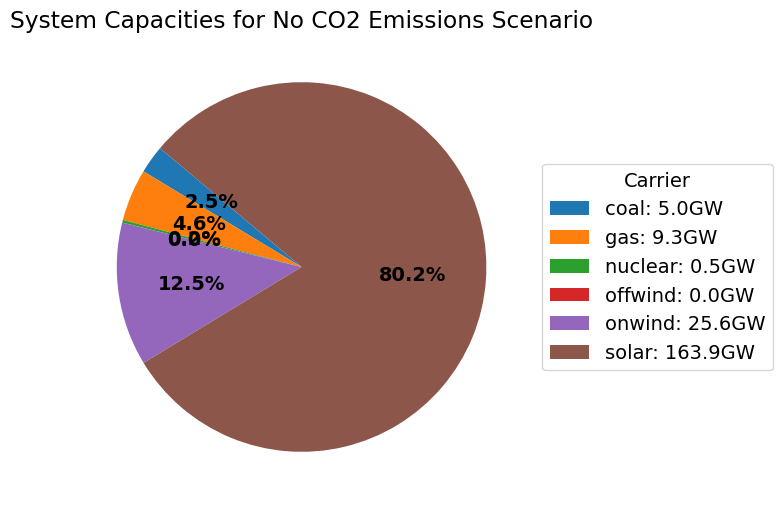

In [807]:
def func(pct, allvals):
    return "{:.1f}%".format(pct)

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(cap1, labels=cap1.index, autopct=lambda pct: func(pct, cap1), startangle=140, textprops=dict(color="w"))

# Format the text on the pie chart
for text in autotexts:
    text.set_color('black')
    text.set_weight('bold')

# Create custom legend with absolute values
legend_labels = [f"{label}: {value:.1f}GW" for label, value in zip(cap1.index, cap1)]
ax.legend(wedges, legend_labels, title="Carrier", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("System Capacities for No CO2 Emissions Scenario")
plt.show()

In [808]:
cap0 = n.generators.groupby("carrier").p_nom_opt.sum()
cap0 = cap0/1e3

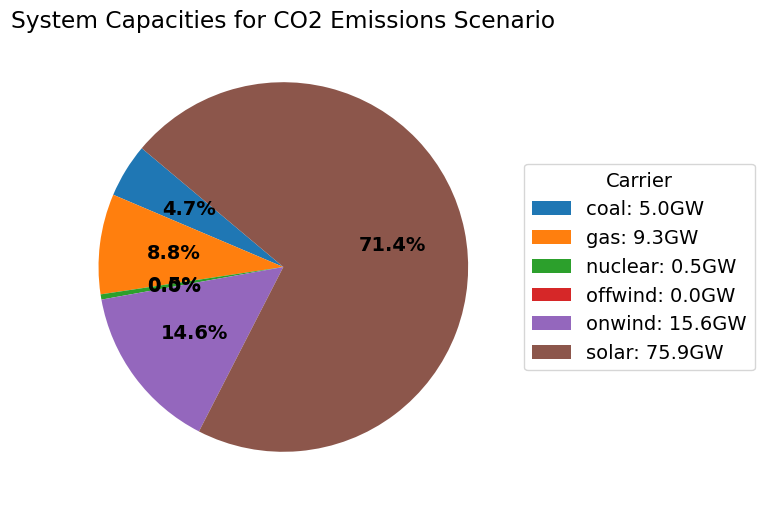

In [809]:
# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(cap0, labels=cap0.index, autopct=lambda pct: func(pct, cap0), startangle=140, textprops=dict(color="w"))

# Format the text on the pie chart
for text in autotexts:
    text.set_color('black')
    text.set_weight('bold')

# Create custom legend with absolute values
legend_labels = [f"{label}: {value:.1f}GW" for label, value in zip(cap0.index, cap0)]
ax.legend(wedges, legend_labels, title="Carrier", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("System Capacities for CO2 Emissions Scenario")
plt.show()

/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/2483751166.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  test = n.storage_units_t.state_of_charge.groupby([n.storage_units.bus], axis=1).sum()


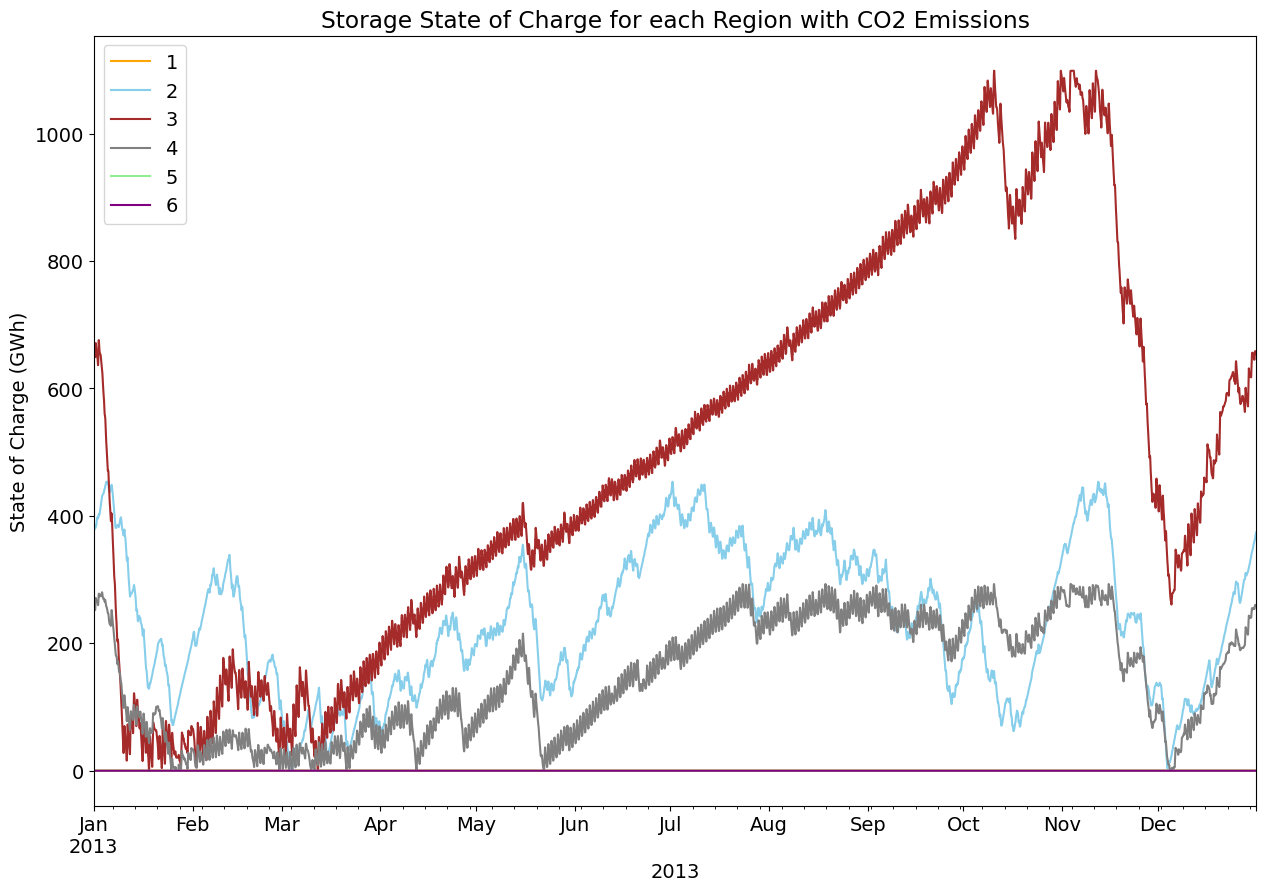

In [810]:
test = n.storage_units_t.state_of_charge.groupby([n.storage_units.bus], axis=1).sum()
regioncolors = ["orange", "skyblue", "brown", "grey", "lightgreen", "purple"]
region_names = test.columns  # Assuming region_names should match the columns in test
i = 0
# test = n.storage_units_t.state_of_charge.groupby([n.storage_units.bus], axis=1).sum()

fig, ax = plt.subplots(figsize=(15, 10))

for region in region_names:
    if region in test.columns:
        x = test[region] / 1e3
        x.plot(color=regioncolors[i % len(regioncolors)], label=region)
        i += 1
    else:
        print(f"Region {region} not found in test columns.")

plt.title('Storage State of Charge for each Region with CO2 Emissions')
plt.legend(loc='upper left')
plt.ylabel('State of Charge (GWh)')
plt.xlabel('2013')
plt.show()


# The state of charge (SOC) of a cell denotes the capacity that is currently available as a function of the rated capacity. The value of the SOC varies between 0% and 100%.

/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/1214001169.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  test = n1.storage_units_t.state_of_charge.groupby([n1.storage_units.bus], axis=1).sum()


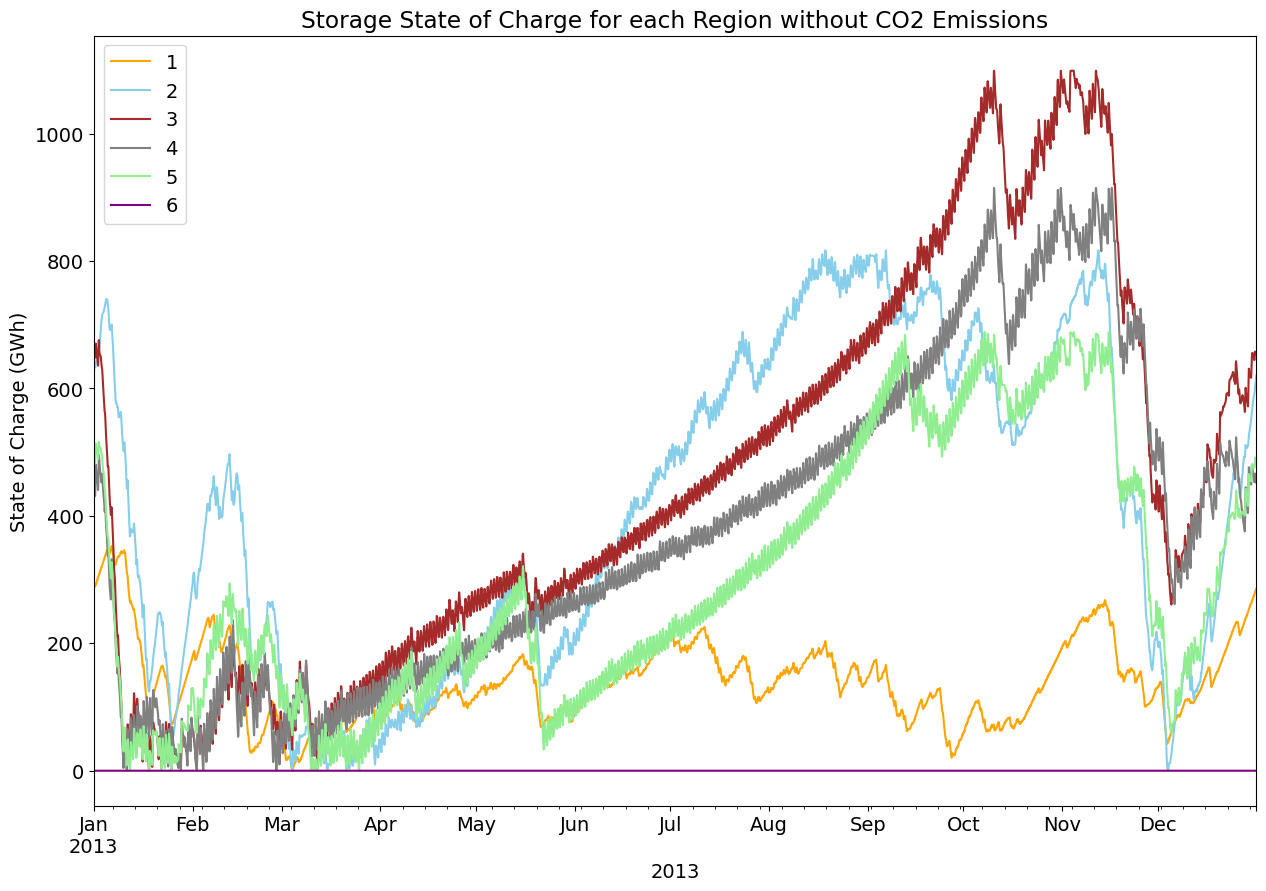

In [811]:
test = n1.storage_units_t.state_of_charge.groupby([n1.storage_units.bus], axis=1).sum()
regioncolors = ["orange", "skyblue", "brown", "grey", "lightgreen", "purple"]
region_names = test.columns  # Assuming region_names should match the columns in test
i = 0
# test = n.storage_units_t.state_of_charge.groupby([n.storage_units.bus], axis=1).sum()

fig, ax = plt.subplots(figsize=(15, 10))

for region in region_names:
    if region in test.columns:
        x = test[region] / 1e3
        x.plot(color=regioncolors[i % len(regioncolors)], label=region)
        i += 1
    else:
        print(f"Region {region} not found in test columns.")

plt.title('Storage State of Charge for each Region without CO2 Emissions')
plt.legend(loc='upper left')
plt.ylabel('State of Charge (GWh)')
plt.xlabel('2013')
plt.show()


(0.0, 2000.0)

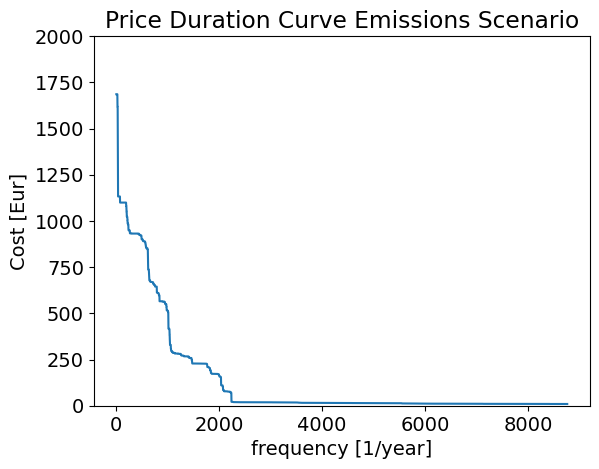

In [812]:
price_duration=n.buses_t.marginal_price
price_duration=price_duration.mean(axis=1)
price_duration=price_duration.sort_values(ascending=False).reset_index(drop=True)
price_duration.plot(ylabel='Cost [Eur]', xlabel='frequency [1/year]', title='Price Duration Curve Emissions Scenario')
plt.ylim(0,2000)

(0.0, 2000.0)

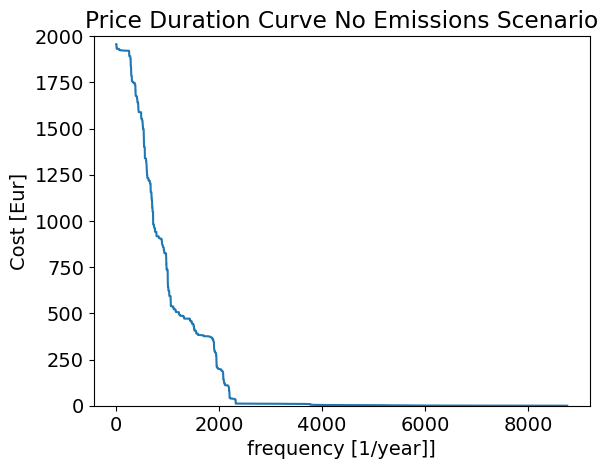

In [813]:
price_duration=n1.buses_t.marginal_price
price_duration=price_duration.mean(axis=1)
price_duration=price_duration.sort_values(ascending=False).reset_index(drop=True)
price_duration.plot(ylabel='Cost [Eur]', xlabel='frequency [1/year]]', title='Price Duration Curve No Emissions Scenario')
plt.ylim(0,2000)

In [814]:
avg_price_r = n.buses_t.marginal_price.mean()

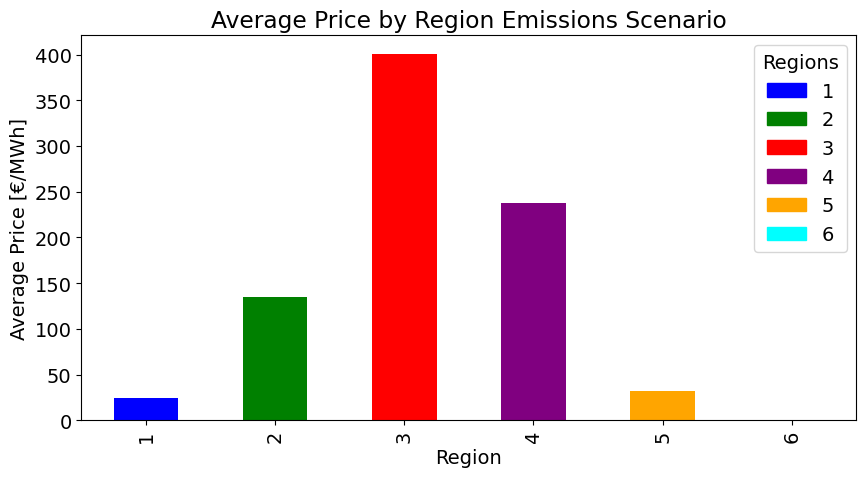

In [815]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 5))
avg_price_r.plot(kind='bar', color=colors, ax=ax)

# Adding title and labels
ax.set_title('Average Price by Region Emissions Scenario')
ax.set_xlabel('Region')
ax.set_ylabel('Average Price [€/MWh]')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = avg_price_r.index
ax.legend(handles, labels, title='Regions', loc='best')

# Display the plot
plt.show()

In [816]:
avg_price_r1 = n1.buses_t.marginal_price.mean()

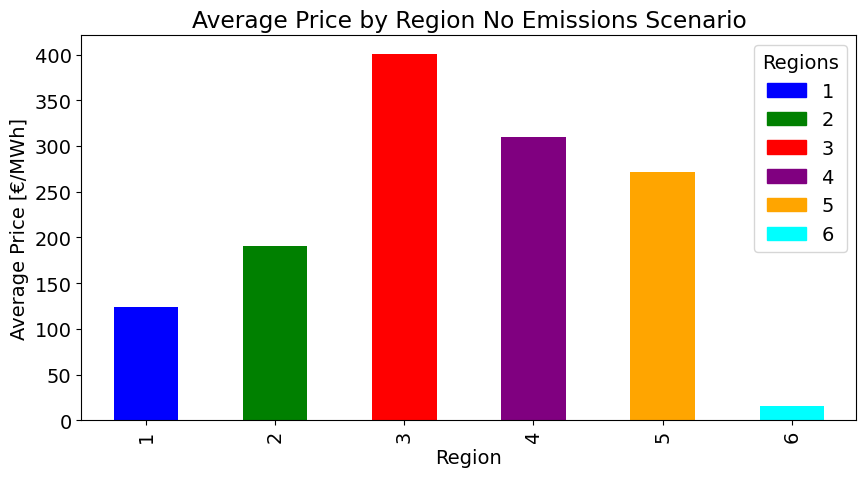

In [817]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 5))
avg_price_r1.plot(kind='bar', color=colors, ax=ax)

# Adding title and labels
ax.set_title('Average Price by Region No Emissions Scenario')
ax.set_xlabel('Region')
ax.set_ylabel('Average Price [€/MWh]')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = avg_price_r.index
ax.legend(handles, labels, title='Regions', loc='best')

# Display the plot
plt.show()

/opt/anaconda3/envs/pitie/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


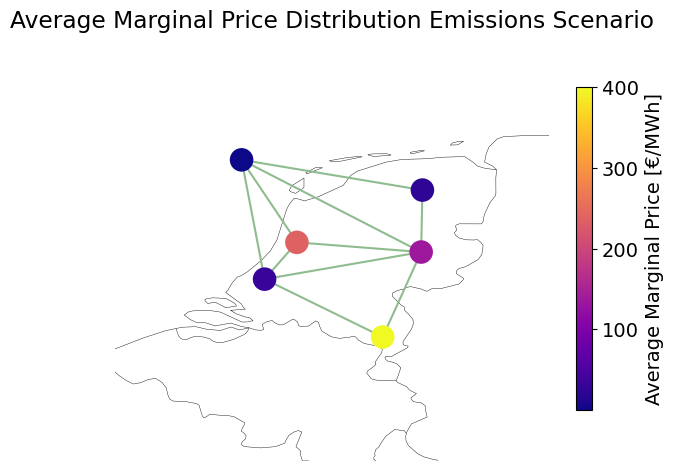

In [818]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.PlateCarree())

norm = plt.Normalize(vmin=n.buses_t.marginal_price.mean().min(), vmax=n.buses_t.marginal_price.mean().max()) # €/MWh

n.plot(
    margin=0.7,
    ax=ax,
    bus_colors=n.buses_t.marginal_price.mean(),
    bus_cmap='plasma',
    bus_norm=norm,
)

sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

ax.set_title("Average Marginal Price Distribution Emissions Scenario")

cbar = plt.colorbar(sm, ax=ax, label="Average Marginal Price [€/MWh]", shrink=0.6)

/opt/anaconda3/envs/pitie/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


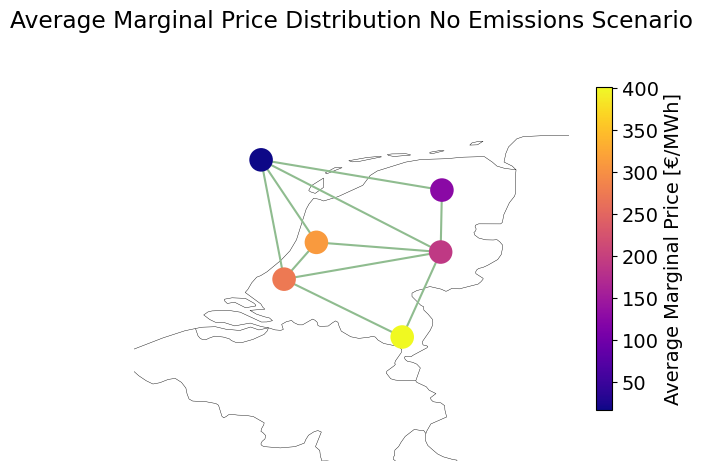

In [819]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.PlateCarree())

norm = plt.Normalize(vmin=n1.buses_t.marginal_price.mean().min(), vmax=n1.buses_t.marginal_price.mean().max()) # €/MWh

n1.plot(
    margin=0.7,
    ax=ax,
    bus_colors=n1.buses_t.marginal_price.mean(),
    bus_cmap='plasma',
    bus_norm=norm,
)

sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

ax.set_title("Average Marginal Price Distribution No Emissions Scenario")

cbar = plt.colorbar(sm, ax=ax, label="Average Marginal Price [€/MWh]", shrink=0.6)

# Shadow Price 

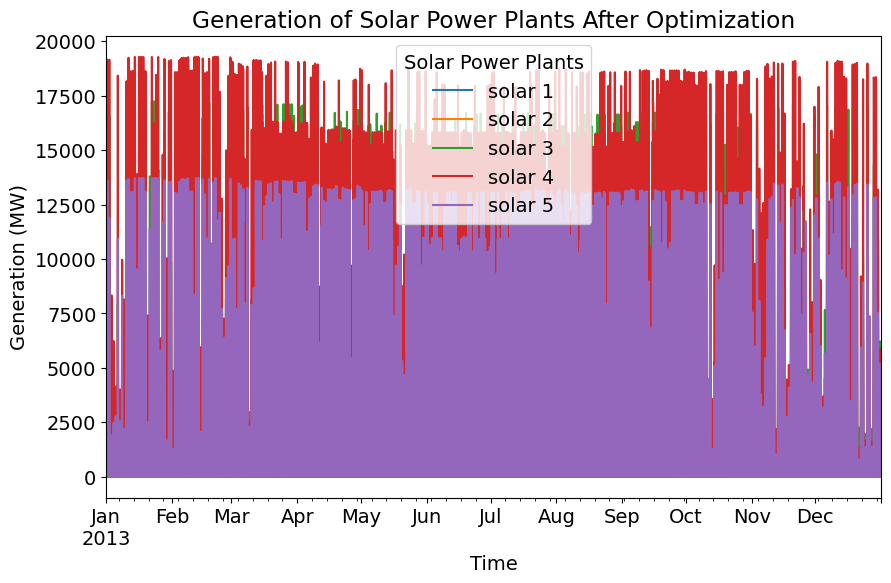

In [838]:
# CHECKING THE GENERATION OF THE POWERPLANTS AFTER OPTIMIZATION 
solar_generators = n1.generators[n1.generators.carrier == 'solar']

# Obtenez les générations optimisées pour ces générateurs solaires
solar_generation = n1.generators_t.p[solar_generators.index]

solar_generation_df = pd.DataFrame(solar_generation)

# Plot the generation of solar power plants
solar_generation_df.plot(figsize=(10, 6))
plt.title('Generation of Solar Power Plants After Optimization')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.legend(title='Solar Power Plants')
plt.show()

In [839]:
shadow_price_CO2 = n1.global_constraints.loc['CO2Limit', 'mu']

In [1026]:
# I am surprised by the value, is the shadow price the amount of money it would cost to reduce the CO2 emissions by one unit? 
# Given that we set up the constraint at 0, does it make sense ? 

print("In the Zero Emissions Scenario, the Shadow Price of CO2 is: ", f"{np.abs(shadow_price_CO2):.2f}", "€/tCO2")

In the Zero Emissions Scenario, the Shadow Price of CO2 is:  32736.40 €/tCO2


# Curtailment 

In [1012]:
capacity_factors = n.generators_t.p_max_pu

# Obtenez la génération effective pour chaque générateur
generation_effective = n.generators_t.p

# Filtrer les générateurs par type
solar_generators = n.generators[n.generators.carrier == 'solar']
onwind_generators = n.generators[n.generators.carrier == 'onwind']
offwind_generators = n.generators[n.generators.carrier == 'offwind']

# Utiliser les capacités optimisées p_nom_opt
solar_p_nom_opt = n.generators.loc[solar_generators.index, 'p_nom_opt']
onwind_p_nom_opt = n.generators.loc[onwind_generators.index, 'p_nom_opt']
offwind_p_nom_opt = n.generators.loc[offwind_generators.index, 'p_nom_opt']

# Calculer le curtailment pour chaque type de générateur à chaque instant de temps
curtailment_solar = capacity_factors[solar_generators.index]*solar_p_nom_opt - generation_effective[solar_generators.index]
curtailment_onwind = capacity_factors[onwind_generators.index]*onwind_p_nom_opt - generation_effective[onwind_generators.index]
curtailment_offwind = capacity_factors[offwind_generators.index]*offwind_p_nom_opt - generation_effective[offwind_generators.index]

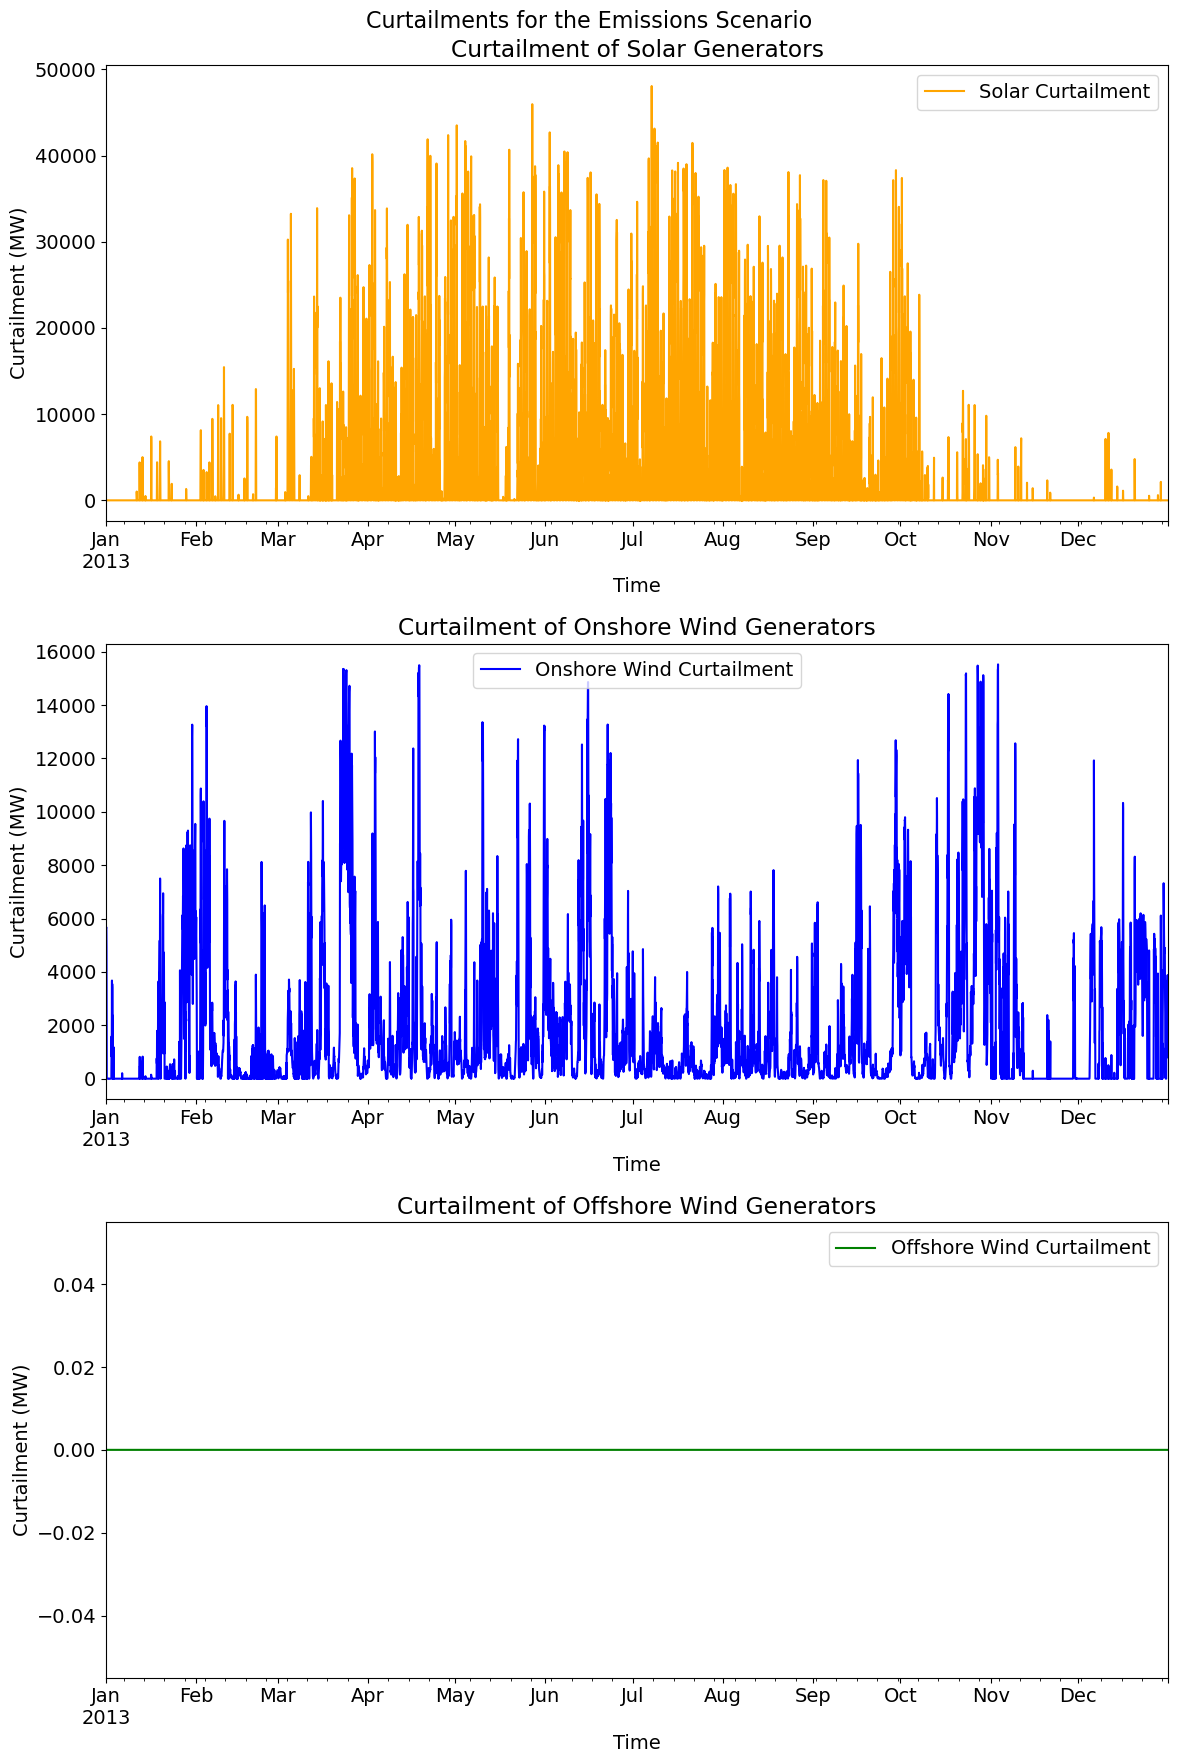

In [1013]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Curtailments for the Emissions Scenario', fontsize=16)

curtailment_solar.sum(axis=1).plot(ax=axs[0], label='Solar Curtailment', color='orange')
axs[0].set_title('Curtailment of Solar Generators')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Curtailment (MW)')
axs[0].legend()

curtailment_onwind.sum(axis=1).plot(ax=axs[1], label='Onshore Wind Curtailment', color='blue')
axs[1].set_title('Curtailment of Onshore Wind Generators')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Curtailment (MW)')
axs[1].legend()

curtailment_offwind.sum(axis=1).plot(ax=axs[2], label='Offshore Wind Curtailment', color='green')
axs[2].set_title('Curtailment of Offshore Wind Generators')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Curtailment (MW)')
axs[2].legend()

plt.tight_layout()
plt.show()

In [1014]:
capacity_factors = n1.generators_t.p_max_pu

# Obtenez la génération effective pour chaque générateur
generation_effective = n1.generators_t.p

# Filtrer les générateurs par type
solar_generators = n1.generators[n1.generators.carrier == 'solar']
onwind_generators = n1.generators[n1.generators.carrier == 'onwind']
offwind_generators = n1.generators[n1.generators.carrier == 'offwind']

# Utiliser les capacités optimisées p_nom_opt
solar_p_nom_opt = n1.generators.loc[solar_generators.index, 'p_nom_opt']
onwind_p_nom_opt = n1.generators.loc[onwind_generators.index, 'p_nom_opt']
offwind_p_nom_opt = n1.generators.loc[offwind_generators.index, 'p_nom_opt']

# Calculer le curtailment pour chaque type de générateur à chaque instant de temps
curtailment_solar = capacity_factors[solar_generators.index]*solar_p_nom_opt - generation_effective[solar_generators.index]
curtailment_onwind = capacity_factors[onwind_generators.index]*onwind_p_nom_opt - generation_effective[onwind_generators.index]
curtailment_offwind = capacity_factors[offwind_generators.index]*offwind_p_nom_opt - generation_effective[offwind_generators.index]

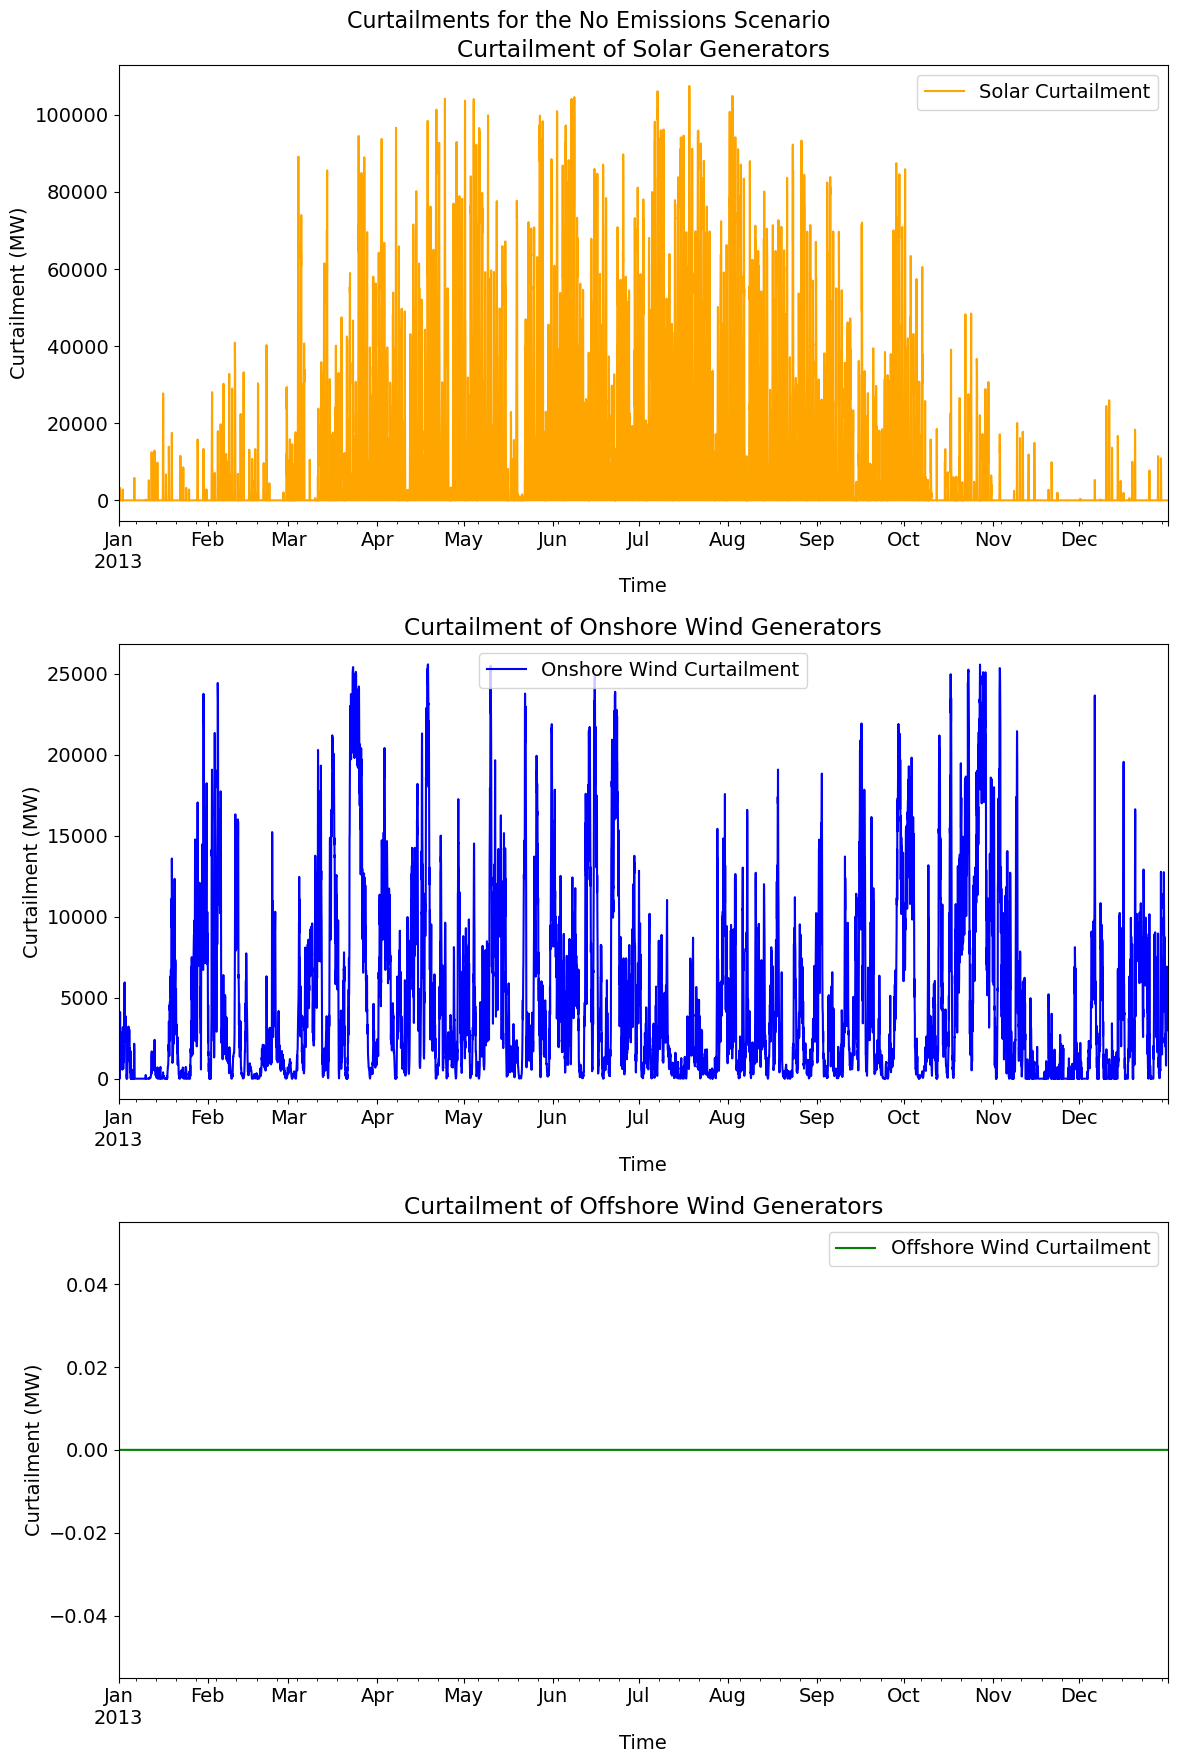

In [1015]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Curtailments for the No Emissions Scenario', fontsize=16)

curtailment_solar.sum(axis=1).plot(ax=axs[0], label='Solar Curtailment', color='orange')
axs[0].set_title('Curtailment of Solar Generators')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Curtailment (MW)')
axs[0].legend()

curtailment_onwind.sum(axis=1).plot(ax=axs[1], label='Onshore Wind Curtailment', color='blue')
axs[1].set_title('Curtailment of Onshore Wind Generators')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Curtailment (MW)')
axs[1].legend()

curtailment_offwind.sum(axis=1).plot(ax=axs[2], label='Offshore Wind Curtailment', color='green')
axs[2].set_title('Curtailment of Offshore Wind Generators')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Curtailment (MW)')
axs[2].legend()

plt.tight_layout()
plt.show()

# Sensitivity Analysis 

In [981]:
n2 = n1.copy()

In [982]:
for idx in rep_points_gdf.index :
    n2.remove("Generator",f"nuclear {idx}")


In [983]:
n2.add(
            "Generator",
            f"nuclear 5",
            bus= "5",
            carrier= "nuclear",
            capital_cost=0,
            marginal_cost=costs.at["nuclear", "marginal_cost"],
            efficiency=costs.at[g, "efficiency"],
            p_nom_extendable=False,
            p_nom = fossils_generators.loc[5, "nuclear"],
        )

In [984]:
n2.generators

attribute bus control type   p_nom  p_nom_mod  p_nom_extendable  p_nom_min  \
Generator                                                                    
coal 1      1      PQ       1600.0        0.0             False        0.0   
gas 1       1      PQ       4306.0        0.0             False        0.0   
coal 2      2      PQ        590.0        0.0             False        0.0   
gas 2       2      PQ        349.0        0.0             False        0.0   
coal 3      3      PQ          0.0        0.0             False        0.0   
gas 3       3      PQ          0.0        0.0             False        0.0   
coal 4      4      PQ        685.0        0.0             False        0.0   
gas 4       4      PQ       1025.0        0.0             False        0.0   
coal 5      5      PQ       2140.0        0.0             False        0.0   
gas 5       5      PQ       1753.0        0.0             False        0.0   
coal 6      6      PQ          0.0        0.0             False        0.0   
gas 6       6      PQ       1879.0        0.0             False        0.0   
solar 1     1      PQ          0.0        0.0              True        0.0   
solar 2     2      PQ          0.0        0.0              True        0.0   
solar 3     3      PQ          0.0        0.0              True        0.0   
solar 4     4      PQ          0.0        0.0              True        0.0   
solar 5     5      PQ          0.0        0.0              True        0.0   
offwind 6   6      PQ          0.0        0.0              True        0.0   
onwind 1    1      PQ          0.0        0.0              True        0.0   
onwind 2    2      PQ          0.0        0.0              True        0.0   
onwind 3    3      PQ          0.0        0.0              True        0.0   
onwind 4    4      PQ          0.0        0.0              True        0.0   
onwind 5    5      PQ          0.0        0.0              True        0.0   
nuclear 5   5      PQ        485.0        0.0             False        0.0   

attribute  p_nom_max  p_min_pu  p_max_pu  ...  min_up_time  min_down_time  \
Generator                                 ...                               
coal 1           inf       0.0       1.0  ...            0              0   
gas 1            inf       0.0       1.0  ...            0              0   
coal 2           inf       0.0       1.0  ...            0              0   
gas 2            inf       0.0       1.0  ...            0              0   
coal 3           inf       0.0       1.0  ...            0              0   
gas 3            inf       0.0       1.0  ...            0              0   
coal 4           inf       0.0       1.0  ...            0              0   
gas 4            inf       0.0       1.0  ...            0              0   
coal 5           inf       0.0       1.0  ...            0              0   
gas 5            inf       0.0       1.0  ...            0              0   
coal 6           inf       0.0       1.0  ...            0              0   
gas 6            inf       0.0       1.0  ...            0              0   
solar 1    233298.00       0.0       1.0  ...            0              0   
solar 2    131814.00       0.0       1.0  ...            0              0   
solar 3     42201.00       0.0       1.0  ...            0              0   
solar 4     61389.00       0.0       1.0  ...            0              0   
solar 5    101124.00       0.0       1.0  ...            0              0   
offwind 6  316832.04       0.0       1.0  ...            0              0   
onwind 1    11943.45       0.0       1.0  ...            0              0   
onwind 2    10357.65       0.0       1.0  ...            0              0   
onwind 3     3581.10       0.0       1.0  ...            0              0   
onwind 4     2205.45       0.0       1.0  ...            0              0   
onwind 5     3563.10       0.0       1.0  ...            0              0   
nuclear 5        inf       0.0       1.0  ... 

In [985]:
n2.carriers['co2_emissions']

Carrier
offwind                         0.0000
onwind                          0.0000
solar                           0.0000
coal                            0.3361
gas                             0.1980
hydro                           0.0000
nuclear                         0.0000
oil                             0.2571
hydrogen storage underground    0.0000
battery storage                 0.0000
HVAC                            0.0000
Name: co2_emissions, dtype: float64

In [986]:
n2.generators['capital_cost']

Generator
coal 1            0.000000
gas 1             0.000000
coal 2            0.000000
gas 2             0.000000
coal 3            0.000000
gas 3             0.000000
coal 4            0.000000
gas 4             0.000000
coal 5            0.000000
gas 5             0.000000
coal 6            0.000000
gas 6             0.000000
solar 1       63114.923985
solar 2       63114.923985
solar 3       63114.923985
solar 4       63114.923985
solar 5       63114.923985
offwind 6    184567.393550
onwind 1     107441.457021
onwind 2     107441.457021
onwind 3     107441.457021
onwind 4     107441.457021
onwind 5     107441.457021
nuclear 5         0.000000
Name: capital_cost, dtype: float64

In [987]:
costs.loc["nuclear"]

parameter
C in fuel                                 NaN
C stored                                  NaN
CO2 intensity                    0.000000e+00
CO2 stored                                NaN
FOM                              1.270000e+00
Motor size                                NaN
VOM                              3.546400e+00
ammonia-input                             NaN
c_b                                       NaN
c_v                                       NaN
capacity                                  NaN
capture rate                              NaN
capture_rate                              NaN
carbondioxide-input                       NaN
carbondioxide-output                      NaN
commodity                                 NaN
compression-electricity-input             NaN
compression-heat-output                   NaN
discount rate                    7.000000e-02
district heat surcharge                   NaN
district heat-input                       NaN
efficiency              

In [988]:
costs[['capital_cost']].loc['nuclear']

parameter
capital_cost    753784.215297
Name: nuclear, dtype: float64

In [989]:
costs_df.index.get_level_values(0)

Index(['Ammonia cracker', 'Ammonia cracker', 'Ammonia cracker',
       'Ammonia cracker', 'BEV Bus city', 'BEV Bus city', 'BEV Bus city',
       'BEV Bus city', 'BEV Bus city', 'BEV Bus city',
       ...
       'waste CHP CC', 'waste CHP CC', 'waste CHP CC', 'waste CHP CC',
       'waste CHP CC', 'waste CHP CC', 'waste CHP CC', 'waste CHP CC',
       'water tank charger', 'water tank discharger'],
      dtype='object', name='technology', length=1033)

In [990]:
gas_costs = costs_df.xs('gas', level=0)
gas_costs

value         unit  \
parameter                            
CO2 intensity   0.198  tCO2/MWh_th   
fuel           24.568   EUR/MWh_th   

                                                          source  \
parameter                                                          
CO2 intensity        Stoichiometric calculation with 50 GJ/t CH4   
fuel           DIW (2013): Current and propsective costs of e...   

                   further description  currency_year  
parameter                                              
CO2 intensity                      NaN            NaN  
fuel           Based on IEA 2011 data.         2010.0

In [991]:
costs_df[costs_df.index.get_level_values(0) == 'nuclear']

value        unit  \
technology parameter                           
nuclear    FOM            1.2700      %/year   
           VOM            3.5464   EUR/MWh_e   
           efficiency     0.3260        p.u.   
           fuel           3.4122  EUR/MWh_th   
           investment  8594.1354    EUR/kW_e   
           lifetime      40.0000       years   

                                                                  source  \
technology parameter                                                       
nuclear    FOM         Lazard's levelized cost of energy analysis - v...   
           VOM         Lazard's levelized cost of energy analysis - v...   
           efficiency  Lazard's levelized cost of energy analysis - v...   
           fuel        DIW (2013): Current and propsective costs of e...   
           investment  Lazard's levelized cost of energy analysis - v...   
           lifetime    Lazard's levelized cost of energy analysis - v...   

                                                     further description  \
technology parameter                                                       
nuclear    FOM         U.S. specific costs including newly commission...   
           VOM         U.S. specific costs including newly commission...   
           efficiency  Based on heat rate of 10.45 MMBtu/MWh_e and 3....   
           fuel                                  Based on IEA 2011 data.   
           investment  U.S. specific costs including newly commission...   
           lifetime                                                  NaN   

                       currency_year  
technology parameter                  
nuclear    FOM                2023.0  
           VOM                2023.0  
           efficiency         2023.0  
           fuel               2010.0  
           investment         2023.0  
           lifetime           2023.0

In [992]:
values_to_keep = ["nuclear", "offwind", "onwind", "solar"]

# Filtrer le DataFrame pour ne conserver que les lignes correspondant à ces valeurs
costs[costs.index.isin(values_to_keep)]

parameter   C in fuel  C stored  CO2 intensity  CO2 stored     FOM  \
technology                                                           
nuclear           NaN       NaN            0.0         NaN  1.2700   
offwind           NaN       NaN            0.0         NaN  2.3741   
onwind            NaN       NaN            0.0         NaN  1.2347   
solar             NaN       NaN            0.0         NaN  1.7275   

parameter   Motor size     VOM  ammonia-input  c_b  c_v  ...  methane-input  \
technology                                               ...                  
nuclear            NaN  3.5464            NaN  NaN  NaN  ...            NaN   
offwind            NaN  0.0212            NaN  NaN  NaN  ...            NaN   
onwind             NaN  1.5080            NaN  NaN  NaN  ...            NaN   
solar              NaN  0.0106            NaN  NaN  NaN  ...            NaN   

parameter   methanol-input  min_fill_level  naphtha-input  nitrogen-input  \
technology                                                                  
nuclear                NaN             NaN            NaN             NaN   
offwind                NaN             NaN            NaN             NaN   
onwind                 NaN             NaN            NaN             NaN   
solar                  NaN             NaN            NaN             NaN   

parameter   ore-input  p_nom_ratio  pelletizing cost  marginal_cost  \
technology                                                            
nuclear           NaN          NaN               NaN      14.013271   
offwind           NaN          NaN               NaN       0.021200   
onwind            NaN          NaN               NaN       1.508000   
solar             NaN          NaN               NaN       0.010600   

parameter    capital_cost  
technology                 
nuclear     753784.215297  
offwind     184567.393550  
onwind      107441.457021  
solar        63114.923985  

[4 rows x 46 columns]

In [993]:
inf, sup = 2.5e6, 10e6

values = np.linspace(inf, sup, 4)
nuclear_cc = values.tolist()
nuclear_cc

[2500000.0, 5000000.0, 7500000.0, 10000000.0]

In [994]:
#p_nom = fossils_generators.loc[idx, g]
fossils_generators

primary_fuel    coal     gas  nuclear
region                               
1             1600.0  4306.0      0.0
2              590.0   349.0      0.0
3                0.0     0.0      0.0
4              685.0  1025.0      0.0
5             2140.0  1753.0    485.0
6                0.0  1879.0      0.0

In [995]:
carr = "nuclear"
for idx in rep_points_gdf.index : 
    n2.add(
            "Generator",
            f"{carr} add {idx}",
            bus=f'{idx}',
            carrier=f"{carr}",
            capital_cost= nuclear_cc[0],
            marginal_cost=costs.at[f"{carr}", "marginal_cost"],
            efficiency=costs.at[f"{carr}", "efficiency"],
            p_nom_extendable=True,
            p_nom_max = fossils_generators.loc[5, "nuclear"]
        )

In [997]:
n2.generators['capital_cost']

Generator
coal 1           0.000000e+00
gas 1            0.000000e+00
coal 2           0.000000e+00
gas 2            0.000000e+00
coal 3           0.000000e+00
gas 3            0.000000e+00
coal 4           0.000000e+00
gas 4            0.000000e+00
coal 5           0.000000e+00
gas 5            0.000000e+00
coal 6           0.000000e+00
gas 6            0.000000e+00
solar 1          6.311492e+04
solar 2          6.311492e+04
solar 3          6.311492e+04
solar 4          6.311492e+04
solar 5          6.311492e+04
offwind 6        1.845674e+05
onwind 1         1.074415e+05
onwind 2         1.074415e+05
onwind 3         1.074415e+05
onwind 4         1.074415e+05
onwind 5         1.074415e+05
nuclear 5        0.000000e+00
nuclear add 1    2.500000e+06
nuclear add 2    2.500000e+06
nuclear add 3    2.500000e+06
nuclear add 4    2.500000e+06
nuclear add 5    2.500000e+06
nuclear add 6    2.500000e+06
Name: capital_cost, dtype: float64

In [998]:
n2.optimize(solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-07-13


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-07-13
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]
INFO:linopy.io: Writing time: 17.3s


Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-_u5i728e.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-_u5i728e.lp


Reading time = 5.18 seconds


INFO:gurobipy:Reading time = 5.18 seconds


obj: 1489257 rows, 665799 columns, 3122712 nonzeros


INFO:gurobipy:obj: 1489257 rows, 665799 columns, 3122712 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


INFO:gurobipy:Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


Model fingerprint: 0xcbbbbf1c


INFO:gurobipy:Model fingerprint: 0xcbbbbf1c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [2e-09, 3e+02]


INFO:gurobipy:  Matrix range     [2e-09, 3e+02]


  Objective range  [1e-02, 2e+08]


INFO:gurobipy:  Objective range  [1e-02, 2e+08]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [3e+02, 3e+05]


INFO:gurobipy:  RHS range        [3e+02, 3e+05]


Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


Presolve removed 723133 rows and 136156 columns


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns


Presolve time: 7.85s


INFO:gurobipy:Presolve time: 7.85s


Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.87s


INFO:gurobipy:Ordering time: 2.87s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 39


INFO:gurobipy: Dense cols : 39


 Free vars  : 78748


INFO:gurobipy: Free vars  : 78748


 AA' NZ     : 2.270e+06


INFO:gurobipy: AA' NZ     : 2.270e+06


 Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


INFO:gurobipy: Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


 Factor Ops : 3.997e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.997e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.08197393e+13 -2.10604953e+12  3.23e+05 1.11e+03  7.40e+10    16s


INFO:gurobipy:   0   3.08197393e+13 -2.10604953e+12  3.23e+05 1.11e+03  7.40e+10    16s


   1   4.07715677e+13 -1.34512846e+13  2.99e+05 5.53e+05  5.92e+10    19s


INFO:gurobipy:   1   4.07715677e+13 -1.34512846e+13  2.99e+05 5.53e+05  5.92e+10    19s


   2   5.45940145e+13 -3.47268329e+13  2.75e+05 2.54e+05  3.95e+10    22s


INFO:gurobipy:   2   5.45940145e+13 -3.47268329e+13  2.75e+05 2.54e+05  3.95e+10    22s


   3   1.12683457e+14 -5.02946973e+13  1.89e+05 1.19e+05  2.28e+10    24s


INFO:gurobipy:   3   1.12683457e+14 -5.02946973e+13  1.89e+05 1.19e+05  2.28e+10    24s


   4   1.79332227e+14 -6.83894709e+13  3.87e+04 4.83e+04  8.18e+09    27s


INFO:gurobipy:   4   1.79332227e+14 -6.83894709e+13  3.87e+04 4.83e+04  8.18e+09    27s


   5   1.60218831e+14 -5.26353534e+13  1.81e+04 1.12e+04  2.38e+09    30s


INFO:gurobipy:   5   1.60218831e+14 -5.26353534e+13  1.81e+04 1.12e+04  2.38e+09    30s


   6   1.29003588e+14 -4.26923983e+13  1.20e+04 5.09e+03  1.28e+09    32s


INFO:gurobipy:   6   1.29003588e+14 -4.26923983e+13  1.20e+04 5.09e+03  1.28e+09    32s


   7   9.51445298e+13 -3.75286286e+13  7.36e+03 3.02e+03  7.83e+08    34s


INFO:gurobipy:   7   9.51445298e+13 -3.75286286e+13  7.36e+03 3.02e+03  7.83e+08    34s


   8   6.28994588e+13 -3.32393961e+13  4.36e+03 1.94e+03  4.89e+08    36s


INFO:gurobipy:   8   6.28994588e+13 -3.32393961e+13  4.36e+03 1.94e+03  4.89e+08    36s


   9   4.17350164e+13 -2.71597899e+13  2.65e+03 9.50e+02  2.71e+08    37s


INFO:gurobipy:   9   4.17350164e+13 -2.71597899e+13  2.65e+03 9.50e+02  2.71e+08    37s


  10   2.40361475e+13 -2.07725785e+13  1.38e+03 4.01e+02  1.32e+08    39s


INFO:gurobipy:  10   2.40361475e+13 -2.07725785e+13  1.38e+03 4.01e+02  1.32e+08    39s


  11   1.28514499e+13 -1.47051055e+13  6.62e+02 1.58e+02  6.08e+07    42s


INFO:gurobipy:  11   1.28514499e+13 -1.47051055e+13  6.62e+02 1.58e+02  6.08e+07    42s


  12   5.57408555e+12 -9.65325048e+12  2.57e+02 7.61e+01  2.63e+07    44s


INFO:gurobipy:  12   5.57408555e+12 -9.65325048e+12  2.57e+02 7.61e+01  2.63e+07    44s


  13   2.50716008e+12 -6.68991521e+12  1.01e+02 4.27e+01  1.39e+07    46s


INFO:gurobipy:  13   2.50716008e+12 -6.68991521e+12  1.01e+02 4.27e+01  1.39e+07    46s


  14   9.02389150e+11 -2.24080750e+12  2.17e+01 1.10e+01  3.98e+06    47s


INFO:gurobipy:  14   9.02389150e+11 -2.24080750e+12  2.17e+01 1.10e+01  3.98e+06    47s


  15   5.17704903e+11 -4.39233335e+11  7.57e+00 2.14e+00  1.02e+06    50s


INFO:gurobipy:  15   5.17704903e+11 -4.39233335e+11  7.57e+00 2.14e+00  1.02e+06    50s


  16   3.35023663e+11 -3.67545602e+11  3.61e+00 1.83e+00  7.22e+05    52s


INFO:gurobipy:  16   3.35023663e+11 -3.67545602e+11  3.61e+00 1.83e+00  7.22e+05    52s


  17   1.82942395e+11 -1.39465236e+11  1.16e+00 7.37e-01  3.04e+05    54s


INFO:gurobipy:  17   1.82942395e+11 -1.39465236e+11  1.16e+00 7.37e-01  3.04e+05    54s


  18   1.49376984e+11 -8.87258165e+10  8.63e-01 5.08e-01  2.19e+05    56s


INFO:gurobipy:  18   1.49376984e+11 -8.87258165e+10  8.63e-01 5.08e-01  2.19e+05    56s


  19   9.69093956e+10 -5.37007959e+10  4.46e-01 3.91e-01  1.35e+05    58s


INFO:gurobipy:  19   9.69093956e+10 -5.37007959e+10  4.46e-01 3.91e-01  1.35e+05    58s


  20   7.71382598e+10 -3.43244842e+10  3.12e-01 2.92e-01  9.84e+04    61s


INFO:gurobipy:  20   7.71382598e+10 -3.43244842e+10  3.12e-01 2.92e-01  9.84e+04    61s


  21   6.77504926e+10 -2.33419664e+10  2.55e-01 2.35e-01  7.99e+04    63s


INFO:gurobipy:  21   6.77504926e+10 -2.33419664e+10  2.55e-01 2.35e-01  7.99e+04    63s


  22   5.91100024e+10 -1.84618182e+10  2.04e-01 2.07e-01  6.77e+04    64s


INFO:gurobipy:  22   5.91100024e+10 -1.84618182e+10  2.04e-01 2.07e-01  6.77e+04    64s


  23   5.02502864e+10  3.99074893e+08  1.54e-01 1.14e-01  4.30e+04    66s


INFO:gurobipy:  23   5.02502864e+10  3.99074893e+08  1.54e-01 1.14e-01  4.30e+04    66s


  24   4.20546507e+10  5.08866311e+09  1.12e-01 8.54e-02  3.17e+04    69s


INFO:gurobipy:  24   4.20546507e+10  5.08866311e+09  1.12e-01 8.54e-02  3.17e+04    69s


  25   4.07067959e+10  7.22393467e+09  1.06e-01 7.25e-02  2.87e+04    71s


INFO:gurobipy:  25   4.07067959e+10  7.22393467e+09  1.06e-01 7.25e-02  2.87e+04    71s


  26   3.76892869e+10  9.25302072e+09  9.03e-02 6.04e-02  2.43e+04    74s


INFO:gurobipy:  26   3.76892869e+10  9.25302072e+09  9.03e-02 6.04e-02  2.43e+04    74s


  27   3.57870987e+10  9.99041650e+09  8.10e-02 5.62e-02  2.20e+04    77s


INFO:gurobipy:  27   3.57870987e+10  9.99041650e+09  8.10e-02 5.62e-02  2.20e+04    77s


  28   3.46543763e+10  1.07717018e+10  7.51e-02 5.20e-02  2.04e+04    79s


INFO:gurobipy:  28   3.46543763e+10  1.07717018e+10  7.51e-02 5.20e-02  2.04e+04    79s


  29   3.35007419e+10  1.13425220e+10  6.89e-02 4.91e-02  1.89e+04    81s


INFO:gurobipy:  29   3.35007419e+10  1.13425220e+10  6.89e-02 4.91e-02  1.89e+04    81s


  30   3.24259768e+10  1.17152282e+10  6.21e-02 4.72e-02  1.76e+04    83s


INFO:gurobipy:  30   3.24259768e+10  1.17152282e+10  6.21e-02 4.72e-02  1.76e+04    83s


  31   3.12548840e+10  1.28717550e+10  5.57e-02 4.13e-02  1.56e+04    86s


INFO:gurobipy:  31   3.12548840e+10  1.28717550e+10  5.57e-02 4.13e-02  1.56e+04    86s


  32   3.10313608e+10  1.32603715e+10  5.41e-02 3.95e-02  1.51e+04    88s


INFO:gurobipy:  32   3.10313608e+10  1.32603715e+10  5.41e-02 3.95e-02  1.51e+04    88s


  33   3.01351690e+10  1.43057482e+10  4.87e-02 3.48e-02  1.34e+04    90s


INFO:gurobipy:  33   3.01351690e+10  1.43057482e+10  4.87e-02 3.48e-02  1.34e+04    90s


  34   2.93739748e+10  1.51971110e+10  4.40e-02 3.09e-02  1.20e+04    92s


INFO:gurobipy:  34   2.93739748e+10  1.51971110e+10  4.40e-02 3.09e-02  1.20e+04    92s


  35   2.86685654e+10  1.55673494e+10  3.94e-02 2.94e-02  1.11e+04    95s


INFO:gurobipy:  35   2.86685654e+10  1.55673494e+10  3.94e-02 2.94e-02  1.11e+04    95s


  36   2.83859193e+10  1.65492746e+10  3.72e-02 2.54e-02  1.00e+04    98s


INFO:gurobipy:  36   2.83859193e+10  1.65492746e+10  3.72e-02 2.54e-02  1.00e+04    98s


  37   2.78468749e+10  1.70282275e+10  3.35e-02 2.36e-02  9.17e+03   100s


INFO:gurobipy:  37   2.78468749e+10  1.70282275e+10  3.35e-02 2.36e-02  9.17e+03   100s


  38   2.76961729e+10  1.75937595e+10  3.22e-02 2.14e-02  8.56e+03   103s


INFO:gurobipy:  38   2.76961729e+10  1.75937595e+10  3.22e-02 2.14e-02  8.56e+03   103s


  39   2.75136506e+10  1.80388250e+10  3.07e-02 1.97e-02  8.02e+03   105s


INFO:gurobipy:  39   2.75136506e+10  1.80388250e+10  3.07e-02 1.97e-02  8.02e+03   105s


  40   2.69753821e+10  1.82871714e+10  2.67e-02 1.88e-02  7.36e+03   108s


INFO:gurobipy:  40   2.69753821e+10  1.82871714e+10  2.67e-02 1.88e-02  7.36e+03   108s


  41   2.65896196e+10  1.90500480e+10  2.37e-02 1.61e-02  6.38e+03   110s


INFO:gurobipy:  41   2.65896196e+10  1.90500480e+10  2.37e-02 1.61e-02  6.38e+03   110s


  42   2.63076223e+10  1.93304113e+10  2.14e-02 1.52e-02  5.91e+03   113s


INFO:gurobipy:  42   2.63076223e+10  1.93304113e+10  2.14e-02 1.52e-02  5.91e+03   113s


  43   2.62737727e+10  1.94323286e+10  2.11e-02 1.48e-02  5.79e+03   116s


INFO:gurobipy:  43   2.62737727e+10  1.94323286e+10  2.11e-02 1.48e-02  5.79e+03   116s


  44   2.60033212e+10  2.00871754e+10  1.85e-02 1.26e-02  5.01e+03   118s


INFO:gurobipy:  44   2.60033212e+10  2.00871754e+10  1.85e-02 1.26e-02  5.01e+03   118s


  45   2.59243926e+10  2.05070788e+10  1.79e-02 1.12e-02  4.58e+03   121s


INFO:gurobipy:  45   2.59243926e+10  2.05070788e+10  1.79e-02 1.12e-02  4.58e+03   121s


  46   2.58064943e+10  2.07230920e+10  1.68e-02 1.05e-02  4.30e+03   123s


INFO:gurobipy:  46   2.58064943e+10  2.07230920e+10  1.68e-02 1.05e-02  4.30e+03   123s


  47   2.55701788e+10  2.10503285e+10  1.47e-02 9.42e-03  3.82e+03   125s


INFO:gurobipy:  47   2.55701788e+10  2.10503285e+10  1.47e-02 9.42e-03  3.82e+03   125s


  48   2.54139780e+10  2.12737061e+10  1.33e-02 8.70e-03  3.50e+03   128s


INFO:gurobipy:  48   2.54139780e+10  2.12737061e+10  1.33e-02 8.70e-03  3.50e+03   128s


  49   2.52674858e+10  2.14587825e+10  1.20e-02 8.11e-03  3.22e+03   130s


INFO:gurobipy:  49   2.52674858e+10  2.14587825e+10  1.20e-02 8.11e-03  3.22e+03   130s


  50   2.51986662e+10  2.16926011e+10  1.13e-02 7.37e-03  2.97e+03   132s


INFO:gurobipy:  50   2.51986662e+10  2.16926011e+10  1.13e-02 7.37e-03  2.97e+03   132s


  51   2.51140956e+10  2.17798653e+10  1.06e-02 7.07e-03  2.82e+03   134s


INFO:gurobipy:  51   2.51140956e+10  2.17798653e+10  1.06e-02 7.07e-03  2.82e+03   134s


  52   2.49986874e+10  2.20082817e+10  9.48e-03 6.35e-03  2.53e+03   137s


INFO:gurobipy:  52   2.49986874e+10  2.20082817e+10  9.48e-03 6.35e-03  2.53e+03   137s


  53   2.49604614e+10  2.21909613e+10  9.11e-03 5.76e-03  2.34e+03   139s


INFO:gurobipy:  53   2.49604614e+10  2.21909613e+10  9.11e-03 5.76e-03  2.34e+03   139s


  54   2.48064410e+10  2.24560009e+10  7.60e-03 4.91e-03  1.99e+03   142s


INFO:gurobipy:  54   2.48064410e+10  2.24560009e+10  7.60e-03 4.91e-03  1.99e+03   142s


  55   2.47645536e+10  2.25480049e+10  7.20e-03 4.60e-03  1.87e+03   144s


INFO:gurobipy:  55   2.47645536e+10  2.25480049e+10  7.20e-03 4.60e-03  1.87e+03   144s


  56   2.46460431e+10  2.26412053e+10  6.05e-03 4.29e-03  1.70e+03   147s


INFO:gurobipy:  56   2.46460431e+10  2.26412053e+10  6.05e-03 4.29e-03  1.70e+03   147s


  57   2.45620998e+10  2.27551451e+10  5.24e-03 3.91e-03  1.53e+03   149s


INFO:gurobipy:  57   2.45620998e+10  2.27551451e+10  5.24e-03 3.91e-03  1.53e+03   149s


  58   2.44739342e+10  2.29310814e+10  4.42e-03 3.35e-03  1.31e+03   152s


INFO:gurobipy:  58   2.44739342e+10  2.29310814e+10  4.42e-03 3.35e-03  1.31e+03   152s


  59   2.44279683e+10  2.30983608e+10  3.99e-03 2.82e-03  1.12e+03   154s


INFO:gurobipy:  59   2.44279683e+10  2.30983608e+10  3.99e-03 2.82e-03  1.12e+03   154s


  60   2.43761136e+10  2.31931321e+10  3.51e-03 2.51e-03  1.00e+03   157s


INFO:gurobipy:  60   2.43761136e+10  2.31931321e+10  3.51e-03 2.51e-03  1.00e+03   157s


  61   2.43274671e+10  2.32238257e+10  3.10e-03 2.41e-03  9.34e+02   160s


INFO:gurobipy:  61   2.43274671e+10  2.32238257e+10  3.10e-03 2.41e-03  9.34e+02   160s


  62   2.42919731e+10  2.33314996e+10  2.81e-03 2.06e-03  8.13e+02   162s


INFO:gurobipy:  62   2.42919731e+10  2.33314996e+10  2.81e-03 2.06e-03  8.13e+02   162s


  63   2.42573750e+10  2.33597190e+10  2.52e-03 1.96e-03  7.60e+02   164s


INFO:gurobipy:  63   2.42573750e+10  2.33597190e+10  2.52e-03 1.96e-03  7.60e+02   164s


  64   2.42491749e+10  2.33725266e+10  2.45e-03 1.92e-03  7.42e+02   166s


INFO:gurobipy:  64   2.42491749e+10  2.33725266e+10  2.45e-03 1.92e-03  7.42e+02   166s


  65   2.42149506e+10  2.34994431e+10  2.16e-03 1.50e-03  6.05e+02   169s


INFO:gurobipy:  65   2.42149506e+10  2.34994431e+10  2.16e-03 1.50e-03  6.05e+02   169s


  66   2.42012587e+10  2.35147727e+10  2.05e-03 1.45e-03  5.81e+02   171s


INFO:gurobipy:  66   2.42012587e+10  2.35147727e+10  2.05e-03 1.45e-03  5.81e+02   171s


  67   2.41755064e+10  2.35518568e+10  1.83e-03 1.32e-03  5.28e+02   173s


INFO:gurobipy:  67   2.41755064e+10  2.35518568e+10  1.83e-03 1.32e-03  5.28e+02   173s


  68   2.41451966e+10  2.35780448e+10  1.59e-03 1.23e-03  4.80e+02   176s


INFO:gurobipy:  68   2.41451966e+10  2.35780448e+10  1.59e-03 1.23e-03  4.80e+02   176s


  69   2.41315785e+10  2.36016923e+10  1.48e-03 1.15e-03  4.48e+02   178s


INFO:gurobipy:  69   2.41315785e+10  2.36016923e+10  1.48e-03 1.15e-03  4.48e+02   178s


  70   2.41207427e+10  2.36308789e+10  1.40e-03 1.05e-03  4.14e+02   181s


INFO:gurobipy:  70   2.41207427e+10  2.36308789e+10  1.40e-03 1.05e-03  4.14e+02   181s


  71   2.41114330e+10  2.36448281e+10  1.33e-03 1.00e-03  3.95e+02   183s


INFO:gurobipy:  71   2.41114330e+10  2.36448281e+10  1.33e-03 1.00e-03  3.95e+02   183s


  72   2.41002160e+10  2.36635624e+10  1.24e-03 9.43e-04  3.70e+02   186s


INFO:gurobipy:  72   2.41002160e+10  2.36635624e+10  1.24e-03 9.43e-04  3.70e+02   186s


  73   2.40875287e+10  2.36873666e+10  1.14e-03 8.62e-04  3.39e+02   189s


INFO:gurobipy:  73   2.40875287e+10  2.36873666e+10  1.14e-03 8.62e-04  3.39e+02   189s


  74   2.40761518e+10  2.37168337e+10  1.05e-03 7.62e-04  3.04e+02   191s


INFO:gurobipy:  74   2.40761518e+10  2.37168337e+10  1.05e-03 7.62e-04  3.04e+02   191s


  75   2.40576272e+10  2.37365813e+10  9.10e-04 6.95e-04  2.72e+02   194s


INFO:gurobipy:  75   2.40576272e+10  2.37365813e+10  9.10e-04 6.95e-04  2.72e+02   194s


  76   2.40473992e+10  2.37521781e+10  8.33e-04 6.41e-04  2.50e+02   197s


INFO:gurobipy:  76   2.40473992e+10  2.37521781e+10  8.33e-04 6.41e-04  2.50e+02   197s


  77   2.40414259e+10  2.37677366e+10  7.89e-04 5.87e-04  2.32e+02   199s


INFO:gurobipy:  77   2.40414259e+10  2.37677366e+10  7.89e-04 5.87e-04  2.32e+02   199s


  78   2.40337040e+10  2.37796737e+10  7.31e-04 5.46e-04  2.15e+02   201s


INFO:gurobipy:  78   2.40337040e+10  2.37796737e+10  7.31e-04 5.46e-04  2.15e+02   201s


  79   2.40138049e+10  2.37911439e+10  5.78e-04 5.07e-04  1.89e+02   204s


INFO:gurobipy:  79   2.40138049e+10  2.37911439e+10  5.78e-04 5.07e-04  1.89e+02   204s


  80   2.40076316e+10  2.37997708e+10  5.33e-04 4.78e-04  1.76e+02   206s


INFO:gurobipy:  80   2.40076316e+10  2.37997708e+10  5.33e-04 4.78e-04  1.76e+02   206s


  81   2.39960126e+10  2.38243443e+10  4.44e-04 3.90e-04  1.45e+02   209s


INFO:gurobipy:  81   2.39960126e+10  2.38243443e+10  4.44e-04 3.90e-04  1.45e+02   209s


  82   2.39803033e+10  2.38400369e+10  3.25e-04 3.33e-04  1.19e+02   211s


INFO:gurobipy:  82   2.39803033e+10  2.38400369e+10  3.25e-04 3.33e-04  1.19e+02   211s


  83   2.39753651e+10  2.38484843e+10  2.89e-04 3.02e-04  1.08e+02   213s


INFO:gurobipy:  83   2.39753651e+10  2.38484843e+10  2.89e-04 3.02e-04  1.08e+02   213s


  84   2.39683719e+10  2.38810895e+10  2.38e-04 1.83e-04  7.39e+01   215s


INFO:gurobipy:  84   2.39683719e+10  2.38810895e+10  2.38e-04 1.83e-04  7.39e+01   215s


  85   2.39629775e+10  2.38847990e+10  2.01e-04 1.70e-04  6.62e+01   219s


INFO:gurobipy:  85   2.39629775e+10  2.38847990e+10  2.01e-04 1.70e-04  6.62e+01   219s


  86   2.39568744e+10  2.39024510e+10  1.58e-04 1.09e-04  4.60e+01   221s


INFO:gurobipy:  86   2.39568744e+10  2.39024510e+10  1.58e-04 1.09e-04  4.60e+01   221s


  87   2.39497144e+10  2.39159801e+10  1.09e-04 5.89e-05  2.85e+01   224s


INFO:gurobipy:  87   2.39497144e+10  2.39159801e+10  1.09e-04 5.89e-05  2.85e+01   224s


  88   2.39460349e+10  2.39200184e+10  1.29e-04 4.50e-05  2.20e+01   228s


INFO:gurobipy:  88   2.39460349e+10  2.39200184e+10  1.29e-04 4.50e-05  2.20e+01   228s


  89   2.39404556e+10  2.39269625e+10  6.07e-05 1.90e-05  1.14e+01   231s


INFO:gurobipy:  89   2.39404556e+10  2.39269625e+10  6.07e-05 1.90e-05  1.14e+01   231s


  90   2.39359644e+10  2.39308261e+10  2.28e-04 4.07e-06  4.32e+00   235s


INFO:gurobipy:  90   2.39359644e+10  2.39308261e+10  2.28e-04 4.07e-06  4.32e+00   235s


  91   2.39350568e+10  2.39319490e+10  1.61e-04 1.46e-06  2.60e+00   238s


INFO:gurobipy:  91   2.39350568e+10  2.39319490e+10  1.61e-04 1.46e-06  2.60e+00   238s


  92   2.39342522e+10  2.39324116e+10  1.02e-04 5.15e-07  1.54e+00   241s


INFO:gurobipy:  92   2.39342522e+10  2.39324116e+10  1.02e-04 5.15e-07  1.54e+00   241s


  93   2.39333129e+10  2.39326414e+10  3.55e-05 1.78e-07  5.61e-01   244s


INFO:gurobipy:  93   2.39333129e+10  2.39326414e+10  3.55e-05 1.78e-07  5.61e-01   244s


  94   2.39330090e+10  2.39326841e+10  1.46e-05 1.20e-07  2.72e-01   247s


INFO:gurobipy:  94   2.39330090e+10  2.39326841e+10  1.46e-05 1.20e-07  2.72e-01   247s


  95   2.39328697e+10  2.39327320e+10  1.46e-05 1.20e-07  1.15e-01   250s


INFO:gurobipy:  95   2.39328697e+10  2.39327320e+10  1.46e-05 1.20e-07  1.15e-01   250s


  96   2.39328414e+10  2.39327554e+10  1.14e-05 1.79e-07  7.21e-02   254s


INFO:gurobipy:  96   2.39328414e+10  2.39327554e+10  1.14e-05 1.79e-07  7.21e-02   254s


  97   2.39328159e+10  2.39327725e+10  1.38e-05 1.97e-07  3.64e-02   257s


INFO:gurobipy:  97   2.39328159e+10  2.39327725e+10  1.38e-05 1.97e-07  3.64e-02   257s


  98   2.39327962e+10  2.39327825e+10  9.12e-06 2.64e-07  1.16e-02   261s


INFO:gurobipy:  98   2.39327962e+10  2.39327825e+10  9.12e-06 2.64e-07  1.16e-02   261s


  99   2.39327931e+10  2.39327842e+10  3.86e-04 2.24e-07  7.51e-03   263s


INFO:gurobipy:  99   2.39327931e+10  2.39327842e+10  3.86e-04 2.24e-07  7.51e-03   263s


 100   2.39327896e+10  2.39327876e+10  1.16e-04 2.91e-07  1.65e-03   265s


INFO:gurobipy: 100   2.39327896e+10  2.39327876e+10  1.16e-04 2.91e-07  1.65e-03   265s


 101   2.39327889e+10  2.39327883e+10  1.35e-04 3.58e-07  5.39e-04   267s


INFO:gurobipy: 101   2.39327889e+10  2.39327883e+10  1.35e-04 3.58e-07  5.39e-04   267s


 102   2.39327884e+10  2.39327884e+10  6.09e-06 5.29e-06  3.22e-05   269s


INFO:gurobipy: 102   2.39327884e+10  2.39327884e+10  6.09e-06 5.29e-06  3.22e-05   269s


 103   2.39327884e+10  2.39327884e+10  7.49e-07 7.66e-07  2.44e-06   272s


INFO:gurobipy: 103   2.39327884e+10  2.39327884e+10  7.49e-07 7.66e-07  2.44e-06   272s


 104   2.39327884e+10  2.39327884e+10  1.01e-06 5.85e-07  3.47e-07   274s


INFO:gurobipy: 104   2.39327884e+10  2.39327884e+10  1.01e-06 5.85e-07  3.47e-07   274s


 105   2.39327884e+10  2.39327884e+10  3.39e-07 8.88e-07  3.49e-08   277s


INFO:gurobipy: 105   2.39327884e+10  2.39327884e+10  3.39e-07 8.88e-07  3.49e-08   277s


 106   2.39327884e+10  2.39327884e+10  1.17e-07 7.14e-07  6.28e-10   279s


INFO:gurobipy: 106   2.39327884e+10  2.39327884e+10  1.17e-07 7.14e-07  6.28e-10   279s


INFO:gurobipy:


Barrier solved model in 106 iterations and 279.32 seconds (49.79 work units)


INFO:gurobipy:Barrier solved model in 106 iterations and 279.32 seconds (49.79 work units)


Optimal objective 2.39327884e+10


INFO:gurobipy:Optimal objective 2.39327884e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  216635 DPushes remaining with DInf 0.0000000e+00               282s


INFO:gurobipy:  216635 DPushes remaining with DInf 0.0000000e+00               282s


    2988 DPushes remaining with DInf 0.0000000e+00               285s


INFO:gurobipy:    2988 DPushes remaining with DInf 0.0000000e+00               285s


       0 DPushes remaining with DInf 0.0000000e+00               290s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00               290s


INFO:gurobipy:


   58857 PPushes remaining with PInf 4.3980639e-03               290s


INFO:gurobipy:   58857 PPushes remaining with PInf 4.3980639e-03               290s


   37751 PPushes remaining with PInf 0.0000000e+00               296s


INFO:gurobipy:   37751 PPushes remaining with PInf 0.0000000e+00               296s


   30000 PPushes remaining with PInf 0.0000000e+00               300s


INFO:gurobipy:   30000 PPushes remaining with PInf 0.0000000e+00               300s


    6481 PPushes remaining with PInf 0.0000000e+00               330s


INFO:gurobipy:    6481 PPushes remaining with PInf 0.0000000e+00               330s


    4618 PPushes remaining with PInf 0.0000000e+00               332s


INFO:gurobipy:    4618 PPushes remaining with PInf 0.0000000e+00               332s


       0 PPushes remaining with PInf 0.0000000e+00               334s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00               334s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2566122e-08    334s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.2566122e-08    334s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  160737    2.3932788e+10   0.000000e+00   0.000000e+00    339s


INFO:gurobipy:  160737    2.3932788e+10   0.000000e+00   0.000000e+00    339s


INFO:gurobipy:


Solved in 160737 iterations and 339.00 seconds (71.62 work units)


INFO:gurobipy:Solved in 160737 iterations and 339.00 seconds (71.62 work units)


Optimal objective  2.393278839e+10


INFO:gurobipy:Optimal objective  2.393278839e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 665799 primals, 1489257 duals
Objective: 2.39e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

## Nuclear cost 5000€/kW

In [1002]:
n3 = n2.copy()

In [1003]:
ncc = nuclear_cc[1] 

for x in range(1, 7):
    generator_name = f"nuclear add {x}"
    if generator_name in n3.generators.index:
        n3.generators.at[generator_name, 'capital_cost'] = ncc

n3.generators

attribute     bus control type   p_nom  p_nom_mod  p_nom_extendable  \
Generator                                                             
coal 1          1      PQ       1600.0        0.0             False   
gas 1           1      PQ       4306.0        0.0             False   
coal 2          2      PQ        590.0        0.0             False   
gas 2           2      PQ        349.0        0.0             False   
coal 3          3      PQ          0.0        0.0             False   
gas 3           3      PQ          0.0        0.0             False   
coal 4          4      PQ        685.0        0.0             False   
gas 4           4      PQ       1025.0        0.0             False   
coal 5          5      PQ       2140.0        0.0             False   
gas 5           5      PQ       1753.0        0.0             False   
coal 6          6      PQ          0.0        0.0             False   
gas 6           6      PQ       1879.0        0.0             False   
solar 1         1      PQ          0.0        0.0              True   
solar 2         2      PQ          0.0        0.0              True   
solar 3         3      PQ          0.0        0.0              True   
solar 4         4      PQ          0.0        0.0              True   
solar 5         5      PQ          0.0        0.0              True   
offwind 6       6      PQ          0.0        0.0              True   
onwind 1        1      PQ          0.0        0.0              True   
onwind 2        2      PQ          0.0        0.0              True   
onwind 3        3      PQ          0.0        0.0              True   
onwind 4        4      PQ          0.0        0.0              True   
onwind 5        5      PQ          0.0        0.0              True   
nuclear 5       5      PQ        485.0        0.0             False   
nuclear add 1   1      PQ          0.0        0.0              True   
nuclear add 2   2      PQ          0.0        0.0              True   
nuclear add 3   3      PQ          0.0        0.0              True   
nuclear add 4   4      PQ          0.0        0.0              True   
nuclear add 5   5      PQ          0.0        0.0              True   
nuclear add 6   6      PQ          0.0        0.0              True   

attribute      p_nom_min  p_nom_max  p_min_pu  p_max_pu  ...  min_up_time  \
Generator                                                ...                
coal 1               0.0        inf       0.0       1.0  ...            0   
gas 1                0.0        inf       0.0       1.0  ...            0   
coal 2               0.0        inf       0.0       1.0  ...            0   
gas 2                0.0        inf       0.0       1.0  ...            0   
coal 3               0.0        inf       0.0       1.0  ...            0   
gas 3                0.0        inf       0.0       1.0  ...            0   
coal 4               0.0        inf       0.0       1.0  ...            0   
gas 4                0.0        inf       0.0       1.0  ...            0   
coal 5               0.0        inf       0.0       1.0  ...            0   
gas 5                0.0        inf       0.0       1.0  ...            0   
coal 6               0.0        inf       0.0       1.0  ...            0   
gas 6                0.0        inf       0.0       1.0  ...            0   
solar 1              0.0  233298.00       0.0       1.0  ...            0   
solar 2              0.0  131814.00       0.0       1.0  ...            0   
solar 3              0.0   42201.00       0.0       1.0  ...            0   
solar 4              0.0   61389.00       0.0       1.0  ...            0   
solar 5              0.0  101124.00       0.0       1.0  ...            0   
offwind 6            0.0  316832.04       0.0       1.0  ...            0   
onwind 1             0.0   11943.45       0.0       1.0  ...            0   
onwind 2             0.0   10357.65       0.0       1.0  ...            0   
onwind 3             0.0    3581.

In [1004]:
n3.optimize(solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-07-13


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-07-13
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:02<00:00,  3.84it/s]
INFO:linopy.io: Writing time: 17.87s


Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-yfkvjzkb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-yfkvjzkb.lp


Reading time = 5.61 seconds


INFO:gurobipy:Reading time = 5.61 seconds


obj: 1489257 rows, 665799 columns, 3122712 nonzeros


INFO:gurobipy:obj: 1489257 rows, 665799 columns, 3122712 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


INFO:gurobipy:Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


Model fingerprint: 0xa1340c85


INFO:gurobipy:Model fingerprint: 0xa1340c85


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [2e-09, 3e+02]


INFO:gurobipy:  Matrix range     [2e-09, 3e+02]


  Objective range  [1e-02, 2e+08]


INFO:gurobipy:  Objective range  [1e-02, 2e+08]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [3e+02, 3e+05]


INFO:gurobipy:  RHS range        [3e+02, 3e+05]


Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


Presolve removed 723133 rows and 136156 columns


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns


Presolve time: 8.41s


INFO:gurobipy:Presolve time: 8.41s


Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 3.16s


INFO:gurobipy:Ordering time: 3.16s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 39


INFO:gurobipy: Dense cols : 39


 Free vars  : 78748


INFO:gurobipy: Free vars  : 78748


 AA' NZ     : 2.270e+06


INFO:gurobipy: AA' NZ     : 2.270e+06


 Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


INFO:gurobipy: Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


 Factor Ops : 3.997e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.997e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.12108986e+13 -2.38696704e+12  3.23e+05 1.13e+03  8.39e+10    17s


INFO:gurobipy:   0   3.12108986e+13 -2.38696704e+12  3.23e+05 1.13e+03  8.39e+10    17s


   1   4.13439605e+13 -1.52402789e+13  2.99e+05 6.30e+05  6.71e+10    20s


INFO:gurobipy:   1   4.13439605e+13 -1.52402789e+13  2.99e+05 6.30e+05  6.71e+10    20s


   2   5.50185668e+13 -3.93540758e+13  2.75e+05 2.90e+05  4.48e+10    22s


INFO:gurobipy:   2   5.50185668e+13 -3.93540758e+13  2.75e+05 2.90e+05  4.48e+10    22s


   3   1.13695482e+14 -5.69751954e+13  1.89e+05 1.35e+05  2.60e+10    25s


INFO:gurobipy:   3   1.13695482e+14 -5.69751954e+13  1.89e+05 1.35e+05  2.60e+10    25s


   4   1.82089676e+14 -7.94771116e+13  3.92e+04 4.82e+04  8.27e+09    28s


INFO:gurobipy:   4   1.82089676e+14 -7.94771116e+13  3.92e+04 4.82e+04  8.27e+09    28s


   5   1.62468154e+14 -5.85113451e+13  1.82e+04 1.02e+04  2.35e+09    30s


INFO:gurobipy:   5   1.62468154e+14 -5.85113451e+13  1.82e+04 1.02e+04  2.35e+09    30s


   6   1.19391455e+14 -4.75374884e+13  1.02e+04 4.16e+03  1.15e+09    33s


INFO:gurobipy:   6   1.19391455e+14 -4.75374884e+13  1.02e+04 4.16e+03  1.15e+09    33s


   7   8.11674023e+13 -4.21185621e+13  5.69e+03 2.58e+03  6.87e+08    34s


INFO:gurobipy:   7   8.11674023e+13 -4.21185621e+13  5.69e+03 2.58e+03  6.87e+08    34s


   8   5.85983981e+13 -3.64947916e+13  3.79e+03 1.54e+03  4.38e+08    36s


INFO:gurobipy:   8   5.85983981e+13 -3.64947916e+13  3.79e+03 1.54e+03  4.38e+08    36s


   9   3.62026169e+13 -3.00274133e+13  2.14e+03 8.04e+02  2.43e+08    38s


INFO:gurobipy:   9   3.62026169e+13 -3.00274133e+13  2.14e+03 8.04e+02  2.43e+08    38s


  10   2.21871420e+13 -2.17931395e+13  1.20e+03 3.11e+02  1.19e+08    40s


INFO:gurobipy:  10   2.21871420e+13 -2.17931395e+13  1.20e+03 3.11e+02  1.19e+08    40s


  11   1.07701422e+13 -1.45411482e+13  5.12e+02 1.12e+02  4.91e+07    42s


INFO:gurobipy:  11   1.07701422e+13 -1.45411482e+13  5.12e+02 1.12e+02  4.91e+07    42s


  12   4.86846228e+12 -1.01585907e+13  2.12e+02 6.57e+01  2.44e+07    44s


INFO:gurobipy:  12   4.86846228e+12 -1.01585907e+13  2.12e+02 6.57e+01  2.44e+07    44s


  13   2.26394687e+12 -4.69257778e+12  9.04e+01 2.14e+01  9.47e+06    46s


INFO:gurobipy:  13   2.26394687e+12 -4.69257778e+12  9.04e+01 2.14e+01  9.47e+06    46s


  14   7.66663225e+11 -2.09874804e+12  1.94e+01 8.08e+00  3.31e+06    48s


INFO:gurobipy:  14   7.66663225e+11 -2.09874804e+12  1.94e+01 8.08e+00  3.31e+06    48s


  15   4.22751988e+11 -5.26954186e+11  5.47e+00 2.04e+00  9.68e+05    50s


INFO:gurobipy:  15   4.22751988e+11 -5.26954186e+11  5.47e+00 2.04e+00  9.68e+05    50s


  16   2.39214133e+11 -2.03543093e+11  1.64e+00 8.34e-01  4.17e+05    53s


INFO:gurobipy:  16   2.39214133e+11 -2.03543093e+11  1.64e+00 8.34e-01  4.17e+05    53s


  17   1.48467786e+11 -1.17636358e+11  7.73e-01 5.30e-01  2.42e+05    55s


INFO:gurobipy:  17   1.48467786e+11 -1.17636358e+11  7.73e-01 5.30e-01  2.42e+05    55s


  18   1.13017734e+11 -7.84174228e+10  5.06e-01 3.87e-01  1.71e+05    57s


INFO:gurobipy:  18   1.13017734e+11 -7.84174228e+10  5.06e-01 3.87e-01  1.71e+05    57s


  19   9.04684858e+10 -5.68260822e+10  3.56e-01 3.15e-01  1.30e+05    60s


INFO:gurobipy:  19   9.04684858e+10 -5.68260822e+10  3.56e-01 3.15e-01  1.30e+05    60s


  20   8.32179421e+10 -3.71258590e+10  3.11e-01 2.48e-01  1.06e+05    62s


INFO:gurobipy:  20   8.32179421e+10 -3.71258590e+10  3.11e-01 2.48e-01  1.06e+05    62s


  21   7.66098233e+10 -2.82800581e+10  2.70e-01 2.15e-01  9.19e+04    64s


INFO:gurobipy:  21   7.66098233e+10 -2.82800581e+10  2.70e-01 2.15e-01  9.19e+04    64s


  22   6.71716839e+10 -1.06722038e+10  2.20e-01 1.44e-01  6.76e+04    66s


INFO:gurobipy:  22   6.71716839e+10 -1.06722038e+10  2.20e-01 1.44e-01  6.76e+04    66s


  23   6.05566853e+10 -3.52316585e+09  1.88e-01 1.13e-01  5.54e+04    68s


INFO:gurobipy:  23   6.05566853e+10 -3.52316585e+09  1.88e-01 1.13e-01  5.54e+04    68s


  24   5.30524828e+10 -2.18357950e+09  1.52e-01 1.07e-01  4.77e+04    71s


INFO:gurobipy:  24   5.30524828e+10 -2.18357950e+09  1.52e-01 1.07e-01  4.77e+04    71s


  25   5.10432235e+10  3.98560391e+09  1.43e-01 7.60e-02  4.04e+04    74s


INFO:gurobipy:  25   5.10432235e+10  3.98560391e+09  1.43e-01 7.60e-02  4.04e+04    74s


  26   4.48004518e+10  6.02812615e+09  1.14e-01 6.59e-02  3.32e+04    76s


INFO:gurobipy:  26   4.48004518e+10  6.02812615e+09  1.14e-01 6.59e-02  3.32e+04    76s


  27   4.18327272e+10  8.33872277e+09  9.99e-02 5.50e-02  2.86e+04    79s


INFO:gurobipy:  27   4.18327272e+10  8.33872277e+09  9.99e-02 5.50e-02  2.86e+04    79s


  28   4.02217862e+10  9.04052226e+09  9.26e-02 5.18e-02  2.66e+04    81s


INFO:gurobipy:  28   4.02217862e+10  9.04052226e+09  9.26e-02 5.18e-02  2.66e+04    81s


  29   3.83392721e+10  1.11998622e+10  8.33e-02 4.18e-02  2.31e+04    84s


INFO:gurobipy:  29   3.83392721e+10  1.11998622e+10  8.33e-02 4.18e-02  2.31e+04    84s


  30   3.63547204e+10  1.22243314e+10  7.36e-02 3.72e-02  2.05e+04    87s


INFO:gurobipy:  30   3.63547204e+10  1.22243314e+10  7.36e-02 3.72e-02  2.05e+04    87s


  31   3.40163225e+10  1.48009517e+10  6.14e-02 2.61e-02  1.63e+04    90s


INFO:gurobipy:  31   3.40163225e+10  1.48009517e+10  6.14e-02 2.61e-02  1.63e+04    90s


  32   3.22626545e+10  1.57863388e+10  5.26e-02 2.26e-02  1.40e+04    92s


INFO:gurobipy:  32   3.22626545e+10  1.57863388e+10  5.26e-02 2.26e-02  1.40e+04    92s


  33   3.10903888e+10  1.67611108e+10  4.57e-02 1.93e-02  1.21e+04    95s


INFO:gurobipy:  33   3.10903888e+10  1.67611108e+10  4.57e-02 1.93e-02  1.21e+04    95s


  34   2.95235821e+10  1.78801590e+10  3.63e-02 1.58e-02  9.86e+03    98s


INFO:gurobipy:  34   2.95235821e+10  1.78801590e+10  3.63e-02 1.58e-02  9.86e+03    98s


  35   2.87966473e+10  1.89329425e+10  3.18e-02 1.29e-02  8.34e+03   100s


INFO:gurobipy:  35   2.87966473e+10  1.89329425e+10  3.18e-02 1.29e-02  8.34e+03   100s


  36   2.83293740e+10  1.92063346e+10  2.87e-02 1.21e-02  7.72e+03   103s


INFO:gurobipy:  36   2.83293740e+10  1.92063346e+10  2.87e-02 1.21e-02  7.72e+03   103s


  37   2.75818188e+10  1.98540238e+10  2.36e-02 1.05e-02  6.54e+03   106s


INFO:gurobipy:  37   2.75818188e+10  1.98540238e+10  2.36e-02 1.05e-02  6.54e+03   106s


  38   2.71769666e+10  2.03181657e+10  2.11e-02 9.33e-03  5.80e+03   109s


INFO:gurobipy:  38   2.71769666e+10  2.03181657e+10  2.11e-02 9.33e-03  5.80e+03   109s


  39   2.69708269e+10  2.04825535e+10  1.96e-02 8.93e-03  5.49e+03   112s


INFO:gurobipy:  39   2.69708269e+10  2.04825535e+10  1.96e-02 8.93e-03  5.49e+03   112s


  40   2.68179165e+10  2.06635754e+10  1.86e-02 8.78e-03  5.21e+03   115s


INFO:gurobipy:  40   2.68179165e+10  2.06635754e+10  1.86e-02 8.78e-03  5.21e+03   115s


  41   2.66623712e+10  2.10242929e+10  1.75e-02 7.89e-03  4.77e+03   118s


INFO:gurobipy:  41   2.66623712e+10  2.10242929e+10  1.75e-02 7.89e-03  4.77e+03   118s


  42   2.63691210e+10  2.14020484e+10  1.54e-02 7.43e-03  4.20e+03   121s


INFO:gurobipy:  42   2.63691210e+10  2.14020484e+10  1.54e-02 7.43e-03  4.20e+03   121s


  43   2.61160037e+10  2.16637246e+10  1.35e-02 6.12e-03  3.77e+03   124s


INFO:gurobipy:  43   2.61160037e+10  2.16637246e+10  1.35e-02 6.12e-03  3.77e+03   124s


  44   2.58929378e+10  2.20924483e+10  1.19e-02 5.11e-03  3.21e+03   127s


INFO:gurobipy:  44   2.58929378e+10  2.20924483e+10  1.19e-02 5.11e-03  3.21e+03   127s


  45   2.57616763e+10  2.23674484e+10  1.10e-02 4.47e-03  2.87e+03   130s


INFO:gurobipy:  45   2.57616763e+10  2.23674484e+10  1.10e-02 4.47e-03  2.87e+03   130s


  46   2.54745324e+10  2.25380236e+10  8.96e-03 4.05e-03  2.48e+03   132s


INFO:gurobipy:  46   2.54745324e+10  2.25380236e+10  8.96e-03 4.05e-03  2.48e+03   132s


  47   2.53898354e+10  2.26777225e+10  8.34e-03 3.73e-03  2.29e+03   135s


INFO:gurobipy:  47   2.53898354e+10  2.26777225e+10  8.34e-03 3.73e-03  2.29e+03   135s


  48   2.53305907e+10  2.28615295e+10  7.91e-03 3.31e-03  2.09e+03   138s


INFO:gurobipy:  48   2.53305907e+10  2.28615295e+10  7.91e-03 3.31e-03  2.09e+03   138s


  49   2.51728512e+10  2.29478338e+10  6.75e-03 3.10e-03  1.88e+03   141s


INFO:gurobipy:  49   2.51728512e+10  2.29478338e+10  6.75e-03 3.10e-03  1.88e+03   141s


  50   2.50840958e+10  2.31259721e+10  6.10e-03 2.69e-03  1.66e+03   144s


INFO:gurobipy:  50   2.50840958e+10  2.31259721e+10  6.10e-03 2.69e-03  1.66e+03   144s


  51   2.49590033e+10  2.32353542e+10  5.17e-03 2.43e-03  1.46e+03   146s


INFO:gurobipy:  51   2.49590033e+10  2.32353542e+10  5.17e-03 2.43e-03  1.46e+03   146s


  52   2.49237677e+10  2.33692744e+10  4.90e-03 2.12e-03  1.31e+03   149s


INFO:gurobipy:  52   2.49237677e+10  2.33692744e+10  4.90e-03 2.12e-03  1.31e+03   149s


  53   2.48301090e+10  2.34362685e+10  4.19e-03 1.96e-03  1.18e+03   151s


INFO:gurobipy:  53   2.48301090e+10  2.34362685e+10  4.19e-03 1.96e-03  1.18e+03   151s


  54   2.47252849e+10  2.35526181e+10  3.40e-03 1.67e-03  9.92e+02   154s


INFO:gurobipy:  54   2.47252849e+10  2.35526181e+10  3.40e-03 1.67e-03  9.92e+02   154s


  55   2.46674696e+10  2.36786050e+10  2.97e-03 1.37e-03  8.37e+02   156s


INFO:gurobipy:  55   2.46674696e+10  2.36786050e+10  2.97e-03 1.37e-03  8.37e+02   156s


  56   2.46301819e+10  2.37818006e+10  2.71e-03 1.12e-03  7.17e+02   159s


INFO:gurobipy:  56   2.46301819e+10  2.37818006e+10  2.71e-03 1.12e-03  7.17e+02   159s


  57   2.46001882e+10  2.38319057e+10  2.50e-03 9.98e-04  6.49e+02   161s


INFO:gurobipy:  57   2.46001882e+10  2.38319057e+10  2.50e-03 9.98e-04  6.49e+02   161s


  58   2.45657016e+10  2.38917663e+10  2.27e-03 8.55e-04  5.70e+02   163s


INFO:gurobipy:  58   2.45657016e+10  2.38917663e+10  2.27e-03 8.55e-04  5.70e+02   163s


  59   2.45453758e+10  2.39113603e+10  2.12e-03 8.04e-04  5.36e+02   166s


INFO:gurobipy:  59   2.45453758e+10  2.39113603e+10  2.12e-03 8.04e-04  5.36e+02   166s


  60   2.44932175e+10  2.39378474e+10  1.77e-03 7.40e-04  4.70e+02   168s


INFO:gurobipy:  60   2.44932175e+10  2.39378474e+10  1.77e-03 7.40e-04  4.70e+02   168s


  61   2.44752877e+10  2.39495341e+10  1.64e-03 7.12e-04  4.45e+02   171s


INFO:gurobipy:  61   2.44752877e+10  2.39495341e+10  1.64e-03 7.12e-04  4.45e+02   171s


  62   2.44509182e+10  2.39763494e+10  1.47e-03 6.49e-04  4.01e+02   173s


INFO:gurobipy:  62   2.44509182e+10  2.39763494e+10  1.47e-03 6.49e-04  4.01e+02   173s


  63   2.44449414e+10  2.39936378e+10  1.43e-03 6.08e-04  3.82e+02   176s


INFO:gurobipy:  63   2.44449414e+10  2.39936378e+10  1.43e-03 6.08e-04  3.82e+02   176s


  64   2.44345234e+10  2.40026225e+10  1.35e-03 5.87e-04  3.65e+02   178s


INFO:gurobipy:  64   2.44345234e+10  2.40026225e+10  1.35e-03 5.87e-04  3.65e+02   178s


  65   2.44224249e+10  2.40314194e+10  1.27e-03 5.18e-04  3.31e+02   181s


INFO:gurobipy:  65   2.44224249e+10  2.40314194e+10  1.27e-03 5.18e-04  3.31e+02   181s


  66   2.44071292e+10  2.40416711e+10  1.16e-03 4.94e-04  3.09e+02   183s


INFO:gurobipy:  66   2.44071292e+10  2.40416711e+10  1.16e-03 4.94e-04  3.09e+02   183s


  67   2.43998311e+10  2.40481546e+10  1.11e-03 4.78e-04  2.97e+02   186s


INFO:gurobipy:  67   2.43998311e+10  2.40481546e+10  1.11e-03 4.78e-04  2.97e+02   186s


  68   2.43749786e+10  2.40664941e+10  9.43e-04 4.31e-04  2.61e+02   188s


INFO:gurobipy:  68   2.43749786e+10  2.40664941e+10  9.43e-04 4.31e-04  2.61e+02   188s


  69   2.43535052e+10  2.40793864e+10  7.92e-04 3.99e-04  2.32e+02   191s


INFO:gurobipy:  69   2.43535052e+10  2.40793864e+10  7.92e-04 3.99e-04  2.32e+02   191s


  70   2.43478278e+10  2.40903656e+10  7.53e-04 3.71e-04  2.18e+02   193s


INFO:gurobipy:  70   2.43478278e+10  2.40903656e+10  7.53e-04 3.71e-04  2.18e+02   193s


  71   2.43206406e+10  2.40990182e+10  5.63e-04 3.50e-04  1.88e+02   196s


INFO:gurobipy:  71   2.43206406e+10  2.40990182e+10  5.63e-04 3.50e-04  1.88e+02   196s


  72   2.43014297e+10  2.41225318e+10  4.28e-04 2.94e-04  1.52e+02   199s


INFO:gurobipy:  72   2.43014297e+10  2.41225318e+10  4.28e-04 2.94e-04  1.52e+02   199s


  73   2.42872305e+10  2.41297071e+10  3.30e-04 2.77e-04  1.34e+02   201s


INFO:gurobipy:  73   2.42872305e+10  2.41297071e+10  3.30e-04 2.77e-04  1.34e+02   201s


  74   2.42818980e+10  2.41600646e+10  2.93e-04 2.02e-04  1.03e+02   204s


INFO:gurobipy:  74   2.42818980e+10  2.41600646e+10  2.93e-04 2.02e-04  1.03e+02   204s


  75   2.42793184e+10  2.41742564e+10  2.76e-04 1.66e-04  8.90e+01   206s


INFO:gurobipy:  75   2.42793184e+10  2.41742564e+10  2.76e-04 1.66e-04  8.90e+01   206s


  76   2.42748235e+10  2.41805514e+10  2.46e-04 1.49e-04  7.99e+01   209s


INFO:gurobipy:  76   2.42748235e+10  2.41805514e+10  2.46e-04 1.49e-04  7.99e+01   209s


  77   2.42646001e+10  2.41920539e+10  1.78e-04 1.18e-04  6.15e+01   211s


INFO:gurobipy:  77   2.42646001e+10  2.41920539e+10  1.78e-04 1.18e-04  6.15e+01   211s


  78   2.42594483e+10  2.42071884e+10  1.46e-04 7.81e-05  4.43e+01   214s


INFO:gurobipy:  78   2.42594483e+10  2.42071884e+10  1.46e-04 7.81e-05  4.43e+01   214s


  79   2.42515620e+10  2.42240539e+10  9.58e-05 3.09e-05  2.32e+01   217s


INFO:gurobipy:  79   2.42515620e+10  2.42240539e+10  9.58e-05 3.09e-05  2.32e+01   217s


  80   2.42446733e+10  2.42289936e+10  1.71e-04 1.74e-05  1.32e+01   221s


INFO:gurobipy:  80   2.42446733e+10  2.42289936e+10  1.71e-04 1.74e-05  1.32e+01   221s


  81   2.42427725e+10  2.42320604e+10  9.44e-05 8.81e-06  9.01e+00   224s


INFO:gurobipy:  81   2.42427725e+10  2.42320604e+10  9.44e-05 8.81e-06  9.01e+00   224s


  82   2.42399065e+10  2.42336309e+10  5.62e-05 4.55e-06  5.27e+00   228s


INFO:gurobipy:  82   2.42399065e+10  2.42336309e+10  5.62e-05 4.55e-06  5.27e+00   228s


  83   2.42385908e+10  2.42339632e+10  3.89e-05 3.75e-06  3.89e+00   231s


INFO:gurobipy:  83   2.42385908e+10  2.42339632e+10  3.89e-05 3.75e-06  3.89e+00   231s


  84   2.42379843e+10  2.42345685e+10  3.11e-05 2.15e-06  2.87e+00   234s


INFO:gurobipy:  84   2.42379843e+10  2.42345685e+10  3.11e-05 2.15e-06  2.87e+00   234s


  85   2.42369721e+10  2.42351046e+10  1.84e-05 7.48e-07  1.56e+00   237s


INFO:gurobipy:  85   2.42369721e+10  2.42351046e+10  1.84e-05 7.48e-07  1.56e+00   237s


  86   2.42360309e+10  2.42352886e+10  6.48e-06 3.38e-07  6.22e-01   241s


INFO:gurobipy:  86   2.42360309e+10  2.42352886e+10  6.48e-06 3.38e-07  6.22e-01   241s


  87   2.42356752e+10  2.42353942e+10  9.56e-06 1.45e-07  2.36e-01   244s


INFO:gurobipy:  87   2.42356752e+10  2.42353942e+10  9.56e-06 1.45e-07  2.36e-01   244s


  88   2.42356155e+10  2.42354042e+10  6.69e-06 1.29e-07  1.77e-01   248s


INFO:gurobipy:  88   2.42356155e+10  2.42354042e+10  6.69e-06 1.29e-07  1.77e-01   248s


  89   2.42355458e+10  2.42354628e+10  3.37e-06 1.79e-07  6.97e-02   251s


INFO:gurobipy:  89   2.42355458e+10  2.42354628e+10  3.37e-06 1.79e-07  6.97e-02   251s


  90   2.42355244e+10  2.42354679e+10  2.52e-06 2.46e-07  4.76e-02   254s


INFO:gurobipy:  90   2.42355244e+10  2.42354679e+10  2.52e-06 2.46e-07  4.76e-02   254s


  91   2.42355147e+10  2.42354816e+10  5.06e-07 7.12e-08  2.78e-02   258s


INFO:gurobipy:  91   2.42355147e+10  2.42354816e+10  5.06e-07 7.12e-08  2.78e-02   258s


  92   2.42355053e+10  2.42354891e+10  1.02e-05 1.42e-07  1.37e-02   260s


INFO:gurobipy:  92   2.42355053e+10  2.42354891e+10  1.02e-05 1.42e-07  1.37e-02   260s


  93   2.42354981e+10  2.42354924e+10  3.12e-05 2.68e-07  4.83e-03   262s


INFO:gurobipy:  93   2.42354981e+10  2.42354924e+10  3.12e-05 2.68e-07  4.83e-03   262s


  94   2.42354960e+10  2.42354946e+10  2.30e-05 1.49e-07  1.20e-03   265s


INFO:gurobipy:  94   2.42354960e+10  2.42354946e+10  2.30e-05 1.49e-07  1.20e-03   265s


  95   2.42354953e+10  2.42354951e+10  1.11e-05 3.32e-07  1.92e-04   267s


INFO:gurobipy:  95   2.42354953e+10  2.42354951e+10  1.11e-05 3.32e-07  1.92e-04   267s


  96   2.42354952e+10  2.42354952e+10  8.55e-07 1.63e-06  1.50e-05   269s


INFO:gurobipy:  96   2.42354952e+10  2.42354952e+10  8.55e-07 1.63e-06  1.50e-05   269s


  97   2.42354952e+10  2.42354952e+10  5.46e-07 3.99e-07  7.50e-07   271s


INFO:gurobipy:  97   2.42354952e+10  2.42354952e+10  5.46e-07 3.99e-07  7.50e-07   271s


  98   2.42354952e+10  2.42354952e+10  2.43e-06 3.21e-07  5.67e-07   274s


INFO:gurobipy:  98   2.42354952e+10  2.42354952e+10  2.43e-06 3.21e-07  5.67e-07   274s


INFO:gurobipy:


Barrier solved model in 98 iterations and 274.38 seconds (46.29 work units)


INFO:gurobipy:Barrier solved model in 98 iterations and 274.38 seconds (46.29 work units)


Optimal objective 2.42354952e+10


INFO:gurobipy:Optimal objective 2.42354952e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  234445 DPushes remaining with DInf 0.0000000e+00               277s


INFO:gurobipy:  234445 DPushes remaining with DInf 0.0000000e+00               277s


   22256 DPushes remaining with DInf 0.0000000e+00               280s


INFO:gurobipy:   22256 DPushes remaining with DInf 0.0000000e+00               280s


       0 DPushes remaining with DInf 0.0000000e+00               285s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00               285s


INFO:gurobipy:


   93904 PPushes remaining with PInf 2.9571351e-03               285s


INFO:gurobipy:   93904 PPushes remaining with PInf 2.9571351e-03               285s


   42829 PPushes remaining with PInf 1.1044980e-03               296s


INFO:gurobipy:   42829 PPushes remaining with PInf 1.1044980e-03               296s


   33760 PPushes remaining with PInf 6.4009204e-04               301s


INFO:gurobipy:   33760 PPushes remaining with PInf 6.4009204e-04               301s


   18714 PPushes remaining with PInf 0.0000000e+00               313s


INFO:gurobipy:   18714 PPushes remaining with PInf 0.0000000e+00               313s


    5661 PPushes remaining with PInf 0.0000000e+00               322s


INFO:gurobipy:    5661 PPushes remaining with PInf 0.0000000e+00               322s


       0 PPushes remaining with PInf 0.0000000e+00               326s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00               326s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.7036344e-04    326s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.7036344e-04    326s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  199434    2.4235495e+10   0.000000e+00   8.703511e-04    326s


INFO:gurobipy:  199434    2.4235495e+10   0.000000e+00   8.703511e-04    326s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


  199435    2.4235495e+10   0.000000e+00   0.000000e+00    330s


INFO:gurobipy:  199435    2.4235495e+10   0.000000e+00   0.000000e+00    330s


INFO:gurobipy:


Solved in 199435 iterations and 330.27 seconds (65.12 work units)


INFO:gurobipy:Solved in 199435 iterations and 330.27 seconds (65.12 work units)


Optimal objective  2.423549520e+10


INFO:gurobipy:Optimal objective  2.423549520e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 665799 primals, 1489257 duals
Objective: 2.42e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

## Nuclear cost 7500€/kW

In [1005]:
n4 = n2.copy()

ncc = nuclear_cc[2] 

for x in range(1, 7):
    generator_name = f"nuclear add {x}"
    if generator_name in n4.generators.index:
        n4.generators.at[generator_name, 'capital_cost'] = ncc

n4.generators['capital_cost']

Generator
coal 1           0.000000e+00
gas 1            0.000000e+00
coal 2           0.000000e+00
gas 2            0.000000e+00
coal 3           0.000000e+00
gas 3            0.000000e+00
coal 4           0.000000e+00
gas 4            0.000000e+00
coal 5           0.000000e+00
gas 5            0.000000e+00
coal 6           0.000000e+00
gas 6            0.000000e+00
solar 1          6.311492e+04
solar 2          6.311492e+04
solar 3          6.311492e+04
solar 4          6.311492e+04
solar 5          6.311492e+04
offwind 6        1.845674e+05
onwind 1         1.074415e+05
onwind 2         1.074415e+05
onwind 3         1.074415e+05
onwind 4         1.074415e+05
onwind 5         1.074415e+05
nuclear 5        0.000000e+00
nuclear add 1    7.500000e+06
nuclear add 2    7.500000e+06
nuclear add 3    7.500000e+06
nuclear add 4    7.500000e+06
nuclear add 5    7.500000e+06
nuclear add 6    7.500000e+06
Name: capital_cost, dtype: float64

In [1006]:
n4.optimize(solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-07-13


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-07-13
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:01<00:00,  4.07it/s]
INFO:linopy.io: Writing time: 15.84s


Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-zrjdxt3o.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-zrjdxt3o.lp


Reading time = 5.17 seconds


INFO:gurobipy:Reading time = 5.17 seconds


obj: 1489257 rows, 665799 columns, 3122712 nonzeros


INFO:gurobipy:obj: 1489257 rows, 665799 columns, 3122712 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


INFO:gurobipy:Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


Model fingerprint: 0x11cb6a84


INFO:gurobipy:Model fingerprint: 0x11cb6a84


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [2e-09, 3e+02]


INFO:gurobipy:  Matrix range     [2e-09, 3e+02]


  Objective range  [1e-02, 2e+08]


INFO:gurobipy:  Objective range  [1e-02, 2e+08]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [3e+02, 3e+05]


INFO:gurobipy:  RHS range        [3e+02, 3e+05]


Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


Presolve removed 723133 rows and 136156 columns


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns


Presolve time: 10.32s


INFO:gurobipy:Presolve time: 10.32s


Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 3.22s


INFO:gurobipy:Ordering time: 3.22s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 39


INFO:gurobipy: Dense cols : 39


 Free vars  : 78748


INFO:gurobipy: Free vars  : 78748


 AA' NZ     : 2.270e+06


INFO:gurobipy: AA' NZ     : 2.270e+06


 Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


INFO:gurobipy: Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


 Factor Ops : 3.997e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.997e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.16020877e+13 -2.92374209e+12  3.23e+05 1.20e+03  1.03e+11    19s


INFO:gurobipy:   0   3.16020877e+13 -2.92374209e+12  3.23e+05 1.20e+03  1.03e+11    19s


   1   4.19222144e+13 -1.86396548e+13  2.99e+05 7.78e+05  8.22e+10    22s


INFO:gurobipy:   1   4.19222144e+13 -1.86396548e+13  2.99e+05 7.78e+05  8.22e+10    22s


   2   5.54889153e+13 -4.81254343e+13  2.75e+05 3.59e+05  5.49e+10    24s


INFO:gurobipy:   2   5.54889153e+13 -4.81254343e+13  2.75e+05 3.59e+05  5.49e+10    24s


   3   1.15037504e+14 -6.96668517e+13  1.89e+05 1.65e+05  3.19e+10    27s


INFO:gurobipy:   3   1.15037504e+14 -6.96668517e+13  1.89e+05 1.65e+05  3.19e+10    27s


   4   1.86696785e+14 -9.49702083e+13  3.92e+04 6.73e+04  1.11e+10    30s


INFO:gurobipy:   4   1.86696785e+14 -9.49702083e+13  3.92e+04 6.73e+04  1.11e+10    30s


   5   1.73516639e+14 -7.30698870e+13  1.82e+04 1.54e+04  3.19e+09    33s


INFO:gurobipy:   5   1.73516639e+14 -7.30698870e+13  1.82e+04 1.54e+04  3.19e+09    33s


   6   1.41421793e+14 -5.98498813e+13  1.14e+04 7.34e+03  1.73e+09    35s


INFO:gurobipy:   6   1.41421793e+14 -5.98498813e+13  1.14e+04 7.34e+03  1.73e+09    35s


   7   1.09359263e+14 -5.16444679e+13  7.12e+03 4.06e+03  1.03e+09    37s


INFO:gurobipy:   7   1.09359263e+14 -5.16444679e+13  7.12e+03 4.06e+03  1.03e+09    37s


   8   7.56091701e+13 -4.62149356e+13  4.33e+03 2.70e+03  6.63e+08    39s


INFO:gurobipy:   8   7.56091701e+13 -4.62149356e+13  4.33e+03 2.70e+03  6.63e+08    39s


   9   5.06234783e+13 -3.96620811e+13  2.62e+03 1.49e+03  3.88e+08    42s


INFO:gurobipy:   9   5.06234783e+13 -3.96620811e+13  2.62e+03 1.49e+03  3.88e+08    42s


  10   3.03638439e+13 -2.87837720e+13  1.40e+03 5.01e+02  1.74e+08    45s


INFO:gurobipy:  10   3.03638439e+13 -2.87837720e+13  1.40e+03 5.01e+02  1.74e+08    45s


  11   1.58047122e+13 -2.01295621e+13  6.37e+02 1.87e+02  7.71e+07    49s


INFO:gurobipy:  11   1.58047122e+13 -2.01295621e+13  6.37e+02 1.87e+02  7.71e+07    49s


  12   6.69584594e+12 -1.33322143e+13  2.44e+02 9.18e+01  3.37e+07    51s


INFO:gurobipy:  12   6.69584594e+12 -1.33322143e+13  2.44e+02 9.18e+01  3.37e+07    51s


  13   2.78923009e+12 -1.00139496e+13  8.86e+01 5.76e+01  1.91e+07    53s


INFO:gurobipy:  13   2.78923009e+12 -1.00139496e+13  8.86e+01 5.76e+01  1.91e+07    53s


  14   1.04178457e+12 -3.29799312e+12  2.07e+01 1.43e+01  5.37e+06    56s


INFO:gurobipy:  14   1.04178457e+12 -3.29799312e+12  2.07e+01 1.43e+01  5.37e+06    56s


  15   5.80024085e+11 -7.79358111e+11  7.15e+00 3.15e+00  1.45e+06    58s


INFO:gurobipy:  15   5.80024085e+11 -7.79358111e+11  7.15e+00 3.15e+00  1.45e+06    58s


  16   2.64852335e+11 -3.97189048e+11  1.49e+00 1.62e+00  6.45e+05    60s


INFO:gurobipy:  16   2.64852335e+11 -3.97189048e+11  1.49e+00 1.62e+00  6.45e+05    60s


  17   1.73236451e+11 -1.91263514e+11  6.80e-01 8.17e-01  3.38e+05    63s


INFO:gurobipy:  17   1.73236451e+11 -1.91263514e+11  6.80e-01 8.17e-01  3.38e+05    63s


  18   1.41226199e+11 -1.33083927e+11  4.78e-01 6.22e-01  2.50e+05    65s


INFO:gurobipy:  18   1.41226199e+11 -1.33083927e+11  4.78e-01 6.22e-01  2.50e+05    65s


  19   1.11268317e+11 -6.28085677e+10  3.25e-01 3.77e-01  1.56e+05    67s


INFO:gurobipy:  19   1.11268317e+11 -6.28085677e+10  3.25e-01 3.77e-01  1.56e+05    67s


  20   8.97869050e+10 -3.83274693e+10  2.25e-01 2.81e-01  1.13e+05    70s


INFO:gurobipy:  20   8.97869050e+10 -3.83274693e+10  2.25e-01 2.81e-01  1.13e+05    70s


  21   8.33485649e+10 -3.15448516e+10  1.99e-01 2.53e-01  1.01e+05    72s


INFO:gurobipy:  21   8.33485649e+10 -3.15448516e+10  1.99e-01 2.53e-01  1.01e+05    72s


  22   7.19170789e+10 -1.04381311e+10  1.55e-01 1.64e-01  7.18e+04    74s


INFO:gurobipy:  22   7.19170789e+10 -1.04381311e+10  1.55e-01 1.64e-01  7.18e+04    74s


  23   6.33932725e+10 -2.29736770e+09  1.30e-01 1.22e-01  5.69e+04    77s


INFO:gurobipy:  23   6.33932725e+10 -2.29736770e+09  1.30e-01 1.22e-01  5.69e+04    77s


  24   5.57856548e+10  4.81460148e+09  1.08e-01 8.09e-02  4.38e+04    80s


INFO:gurobipy:  24   5.57856548e+10  4.81460148e+09  1.08e-01 8.09e-02  4.38e+04    80s


  25   4.97334519e+10  6.24739820e+09  9.14e-02 7.20e-02  3.73e+04    82s


INFO:gurobipy:  25   4.97334519e+10  6.24739820e+09  9.14e-02 7.20e-02  3.73e+04    82s


  26   4.71881776e+10  8.33980028e+09  8.40e-02 5.91e-02  3.32e+04    85s


INFO:gurobipy:  26   4.71881776e+10  8.33980028e+09  8.40e-02 5.91e-02  3.32e+04    85s


  27   4.42331713e+10  9.28676107e+09  7.57e-02 5.38e-02  2.98e+04    88s


INFO:gurobipy:  27   4.42331713e+10  9.28676107e+09  7.57e-02 5.38e-02  2.98e+04    88s


  28   4.14971373e+10  1.12779751e+10  6.72e-02 4.26e-02  2.57e+04    91s


INFO:gurobipy:  28   4.14971373e+10  1.12779751e+10  6.72e-02 4.26e-02  2.57e+04    91s


  29   3.93859331e+10  1.15994699e+10  6.08e-02 4.10e-02  2.37e+04    93s


INFO:gurobipy:  29   3.93859331e+10  1.15994699e+10  6.08e-02 4.10e-02  2.37e+04    93s


  30   3.86180879e+10  1.18861103e+10  5.80e-02 3.96e-02  2.28e+04    95s


INFO:gurobipy:  30   3.86180879e+10  1.18861103e+10  5.80e-02 3.96e-02  2.28e+04    95s


  31   3.69456201e+10  1.32138060e+10  5.27e-02 3.34e-02  2.02e+04    98s


INFO:gurobipy:  31   3.69456201e+10  1.32138060e+10  5.27e-02 3.34e-02  2.02e+04    98s


  32   3.48939870e+10  1.40164752e+10  4.60e-02 3.01e-02  1.77e+04   101s


INFO:gurobipy:  32   3.48939870e+10  1.40164752e+10  4.60e-02 3.01e-02  1.77e+04   101s


  33   3.30285353e+10  1.49684941e+10  3.97e-02 2.65e-02  1.53e+04   104s


INFO:gurobipy:  33   3.30285353e+10  1.49684941e+10  3.97e-02 2.65e-02  1.53e+04   104s


  34   3.22426324e+10  1.60585603e+10  3.67e-02 2.28e-02  1.37e+04   106s


INFO:gurobipy:  34   3.22426324e+10  1.60585603e+10  3.67e-02 2.28e-02  1.37e+04   106s


  35   3.13979777e+10  1.72677249e+10  3.33e-02 1.89e-02  1.20e+04   109s


INFO:gurobipy:  35   3.13979777e+10  1.72677249e+10  3.33e-02 1.89e-02  1.20e+04   109s


  36   2.98713642e+10  1.78909055e+10  2.73e-02 1.70e-02  1.02e+04   112s


INFO:gurobipy:  36   2.98713642e+10  1.78909055e+10  2.73e-02 1.70e-02  1.02e+04   112s


  37   2.93273397e+10  1.86097100e+10  2.49e-02 1.48e-02  9.08e+03   114s


INFO:gurobipy:  37   2.93273397e+10  1.86097100e+10  2.49e-02 1.48e-02  9.08e+03   114s


  38   2.87957624e+10  1.92852104e+10  2.24e-02 1.28e-02  8.05e+03   117s


INFO:gurobipy:  38   2.87957624e+10  1.92852104e+10  2.24e-02 1.28e-02  8.05e+03   117s


  39   2.82965783e+10  1.98276212e+10  2.00e-02 1.13e-02  7.17e+03   120s


INFO:gurobipy:  39   2.82965783e+10  1.98276212e+10  2.00e-02 1.13e-02  7.17e+03   120s


  40   2.79818024e+10  1.98944998e+10  1.86e-02 1.11e-02  6.85e+03   122s


INFO:gurobipy:  40   2.79818024e+10  1.98944998e+10  1.86e-02 1.11e-02  6.85e+03   122s


  41   2.74976511e+10  2.03968037e+10  1.64e-02 9.74e-03  6.01e+03   125s


INFO:gurobipy:  41   2.74976511e+10  2.03968037e+10  1.64e-02 9.74e-03  6.01e+03   125s


  42   2.72055691e+10  2.08730630e+10  1.51e-02 8.48e-03  5.36e+03   127s


INFO:gurobipy:  42   2.72055691e+10  2.08730630e+10  1.51e-02 8.48e-03  5.36e+03   127s


  43   2.68605752e+10  2.12515943e+10  1.35e-02 7.51e-03  4.75e+03   130s


INFO:gurobipy:  43   2.68605752e+10  2.12515943e+10  1.35e-02 7.51e-03  4.75e+03   130s


  44   2.65190964e+10  2.14949827e+10  1.17e-02 6.89e-03  4.25e+03   133s


INFO:gurobipy:  44   2.65190964e+10  2.14949827e+10  1.17e-02 6.89e-03  4.25e+03   133s


  45   2.63299511e+10  2.20475730e+10  1.07e-02 5.51e-03  3.62e+03   135s


INFO:gurobipy:  45   2.63299511e+10  2.20475730e+10  1.07e-02 5.51e-03  3.62e+03   135s


  46   2.60836923e+10  2.21759460e+10  9.46e-03 5.19e-03  3.31e+03   138s


INFO:gurobipy:  46   2.60836923e+10  2.21759460e+10  9.46e-03 5.19e-03  3.31e+03   138s


  47   2.59169269e+10  2.23957567e+10  8.66e-03 4.65e-03  2.98e+03   140s


INFO:gurobipy:  47   2.59169269e+10  2.23957567e+10  8.66e-03 4.65e-03  2.98e+03   140s


  48   2.58101011e+10  2.26490678e+10  8.12e-03 4.01e-03  2.67e+03   143s


INFO:gurobipy:  48   2.58101011e+10  2.26490678e+10  8.12e-03 4.01e-03  2.67e+03   143s


  49   2.56877222e+10  2.28464683e+10  7.50e-03 3.52e-03  2.40e+03   146s


INFO:gurobipy:  49   2.56877222e+10  2.28464683e+10  7.50e-03 3.52e-03  2.40e+03   146s


  50   2.56341194e+10  2.29155353e+10  7.22e-03 3.34e-03  2.30e+03   148s


INFO:gurobipy:  50   2.56341194e+10  2.29155353e+10  7.22e-03 3.34e-03  2.30e+03   148s


  51   2.54796407e+10  2.29457550e+10  6.43e-03 3.27e-03  2.14e+03   151s


INFO:gurobipy:  51   2.54796407e+10  2.29457550e+10  6.43e-03 3.27e-03  2.14e+03   151s


  52   2.53438450e+10  2.30657542e+10  5.71e-03 2.96e-03  1.93e+03   153s


INFO:gurobipy:  52   2.53438450e+10  2.30657542e+10  5.71e-03 2.96e-03  1.93e+03   153s


  53   2.52380059e+10  2.33589913e+10  5.15e-03 2.25e-03  1.59e+03   155s


INFO:gurobipy:  53   2.52380059e+10  2.33589913e+10  5.15e-03 2.25e-03  1.59e+03   155s


  54   2.50125756e+10  2.34485535e+10  3.94e-03 2.03e-03  1.32e+03   158s


INFO:gurobipy:  54   2.50125756e+10  2.34485535e+10  3.94e-03 2.03e-03  1.32e+03   158s


  55   2.49016373e+10  2.35187634e+10  3.38e-03 1.84e-03  1.17e+03   160s


INFO:gurobipy:  55   2.49016373e+10  2.35187634e+10  3.38e-03 1.84e-03  1.17e+03   160s


  56   2.48492252e+10  2.35753486e+10  3.12e-03 1.70e-03  1.08e+03   163s


INFO:gurobipy:  56   2.48492252e+10  2.35753486e+10  3.12e-03 1.70e-03  1.08e+03   163s


  57   2.47462255e+10  2.36838247e+10  2.58e-03 1.44e-03  8.99e+02   165s


INFO:gurobipy:  57   2.47462255e+10  2.36838247e+10  2.58e-03 1.44e-03  8.99e+02   165s


  58   2.46733186e+10  2.37079934e+10  2.20e-03 1.37e-03  8.17e+02   168s


INFO:gurobipy:  58   2.46733186e+10  2.37079934e+10  2.20e-03 1.37e-03  8.17e+02   168s


  59   2.46494233e+10  2.38317050e+10  2.08e-03 1.06e-03  6.92e+02   171s


INFO:gurobipy:  59   2.46494233e+10  2.38317050e+10  2.08e-03 1.06e-03  6.92e+02   171s


  60   2.45856967e+10  2.38953737e+10  1.74e-03 8.93e-04  5.84e+02   173s


INFO:gurobipy:  60   2.45856967e+10  2.38953737e+10  1.74e-03 8.93e-04  5.84e+02   173s


  61   2.45427196e+10  2.39621723e+10  1.52e-03 7.25e-04  4.91e+02   176s


INFO:gurobipy:  61   2.45427196e+10  2.39621723e+10  1.52e-03 7.25e-04  4.91e+02   176s


  62   2.44950147e+10  2.40033521e+10  1.27e-03 6.21e-04  4.16e+02   178s


INFO:gurobipy:  62   2.44950147e+10  2.40033521e+10  1.27e-03 6.21e-04  4.16e+02   178s


  63   2.44752284e+10  2.40186456e+10  1.18e-03 5.82e-04  3.86e+02   181s


INFO:gurobipy:  63   2.44752284e+10  2.40186456e+10  1.18e-03 5.82e-04  3.86e+02   181s


  64   2.44602966e+10  2.40285953e+10  1.10e-03 5.56e-04  3.65e+02   183s


INFO:gurobipy:  64   2.44602966e+10  2.40285953e+10  1.10e-03 5.56e-04  3.65e+02   183s


  65   2.44390792e+10  2.40399325e+10  9.99e-04 5.27e-04  3.38e+02   186s


INFO:gurobipy:  65   2.44390792e+10  2.40399325e+10  9.99e-04 5.27e-04  3.38e+02   186s


  66   2.44260099e+10  2.40741916e+10  9.33e-04 4.37e-04  2.97e+02   189s


INFO:gurobipy:  66   2.44260099e+10  2.40741916e+10  9.33e-04 4.37e-04  2.97e+02   189s


  67   2.44057187e+10  2.40902626e+10  8.35e-04 3.97e-04  2.67e+02   191s


INFO:gurobipy:  67   2.44057187e+10  2.40902626e+10  8.35e-04 3.97e-04  2.67e+02   191s


  68   2.43979492e+10  2.40932785e+10  7.97e-04 3.86e-04  2.58e+02   194s


INFO:gurobipy:  68   2.43979492e+10  2.40932785e+10  7.97e-04 3.86e-04  2.58e+02   194s


  69   2.43775679e+10  2.41185067e+10  6.96e-04 3.20e-04  2.19e+02   196s


INFO:gurobipy:  69   2.43775679e+10  2.41185067e+10  6.96e-04 3.20e-04  2.19e+02   196s


  70   2.43717027e+10  2.41213429e+10  6.68e-04 3.13e-04  2.12e+02   199s


INFO:gurobipy:  70   2.43717027e+10  2.41213429e+10  6.68e-04 3.13e-04  2.12e+02   199s


  71   2.43629009e+10  2.41384006e+10  6.26e-04 2.68e-04  1.90e+02   201s


INFO:gurobipy:  71   2.43629009e+10  2.41384006e+10  6.26e-04 2.68e-04  1.90e+02   201s


  72   2.43570273e+10  2.41414920e+10  5.98e-04 2.60e-04  1.82e+02   204s


INFO:gurobipy:  72   2.43570273e+10  2.41414920e+10  5.98e-04 2.60e-04  1.82e+02   204s


  73   2.43395033e+10  2.41558681e+10  5.09e-04 2.15e-04  1.55e+02   206s


INFO:gurobipy:  73   2.43395033e+10  2.41558681e+10  5.09e-04 2.15e-04  1.55e+02   206s


  74   2.43004733e+10  2.41831445e+10  3.10e-04 1.45e-04  9.91e+01   209s


INFO:gurobipy:  74   2.43004733e+10  2.41831445e+10  3.10e-04 1.45e-04  9.91e+01   209s


  75   2.42787623e+10  2.41964457e+10  2.03e-04 1.08e-04  6.96e+01   211s


INFO:gurobipy:  75   2.42787623e+10  2.41964457e+10  2.03e-04 1.08e-04  6.96e+01   211s


  76   2.42685236e+10  2.42095129e+10  1.54e-04 7.09e-05  4.99e+01   214s


INFO:gurobipy:  76   2.42685236e+10  2.42095129e+10  1.54e-04 7.09e-05  4.99e+01   214s


  77   2.42554351e+10  2.42234356e+10  9.01e-05 3.19e-05  2.70e+01   217s


INFO:gurobipy:  77   2.42554351e+10  2.42234356e+10  9.01e-05 3.19e-05  2.70e+01   217s


  78   2.42494689e+10  2.42267470e+10  1.30e-04 2.26e-05  1.92e+01   219s


INFO:gurobipy:  78   2.42494689e+10  2.42267470e+10  1.30e-04 2.26e-05  1.92e+01   219s


  79   2.42451994e+10  2.42295686e+10  2.75e-04 2.29e-05  1.32e+01   222s


INFO:gurobipy:  79   2.42451994e+10  2.42295686e+10  2.75e-04 2.29e-05  1.32e+01   222s


  80   2.42425187e+10  2.42324683e+10  1.96e-04 7.36e-06  8.44e+00   225s


INFO:gurobipy:  80   2.42425187e+10  2.42324683e+10  1.96e-04 7.36e-06  8.44e+00   225s


  81   2.42400628e+10  2.42340625e+10  1.21e-04 3.01e-06  5.03e+00   228s


INFO:gurobipy:  81   2.42400628e+10  2.42340625e+10  1.21e-04 3.01e-06  5.03e+00   228s


  82   2.42386277e+10  2.42343374e+10  8.81e-05 2.39e-06  3.60e+00   231s


INFO:gurobipy:  82   2.42386277e+10  2.42343374e+10  8.81e-05 2.39e-06  3.60e+00   231s


  83   2.42379346e+10  2.42348174e+10  6.82e-05 1.41e-06  2.61e+00   234s


INFO:gurobipy:  83   2.42379346e+10  2.42348174e+10  6.82e-05 1.41e-06  2.61e+00   234s


  84   2.42363664e+10  2.42351691e+10  2.34e-05 6.01e-07  1.00e+00   237s


INFO:gurobipy:  84   2.42363664e+10  2.42351691e+10  2.34e-05 6.01e-07  1.00e+00   237s


  85   2.42358305e+10  2.42353309e+10  8.69e-06 2.67e-07  4.19e-01   240s


INFO:gurobipy:  85   2.42358305e+10  2.42353309e+10  8.69e-06 2.67e-07  4.19e-01   240s


  86   2.42356339e+10  2.42354126e+10  3.38e-06 1.20e-07  1.85e-01   243s


INFO:gurobipy:  86   2.42356339e+10  2.42354126e+10  3.38e-06 1.20e-07  1.85e-01   243s


  87   2.42355510e+10  2.42354491e+10  2.30e-06 6.16e-08  8.56e-02   246s


INFO:gurobipy:  87   2.42355510e+10  2.42354491e+10  2.30e-06 6.16e-08  8.56e-02   246s


  88   2.42355181e+10  2.42354680e+10  1.13e-06 3.13e-07  4.22e-02   250s


INFO:gurobipy:  88   2.42355181e+10  2.42354680e+10  1.13e-06 3.13e-07  4.22e-02   250s


  89   2.42355086e+10  2.42354827e+10  8.61e-07 1.68e-07  2.18e-02   255s


INFO:gurobipy:  89   2.42355086e+10  2.42354827e+10  8.61e-07 1.68e-07  2.18e-02   255s


  90   2.42354996e+10  2.42354877e+10  6.02e-07 1.90e-07  1.01e-02   259s


INFO:gurobipy:  90   2.42354996e+10  2.42354877e+10  6.02e-07 1.90e-07  1.01e-02   259s


  91   2.42354963e+10  2.42354930e+10  3.31e-05 2.09e-07  2.84e-03   261s


INFO:gurobipy:  91   2.42354963e+10  2.42354930e+10  3.31e-05 2.09e-07  2.84e-03   261s


  92   2.42354955e+10  2.42354949e+10  8.15e-06 2.76e-07  4.95e-04   264s


INFO:gurobipy:  92   2.42354955e+10  2.42354949e+10  8.15e-06 2.76e-07  4.95e-04   264s


  93   2.42354952e+10  2.42354952e+10  2.44e-06 1.12e-07  5.68e-05   266s


INFO:gurobipy:  93   2.42354952e+10  2.42354952e+10  2.44e-06 1.12e-07  5.68e-05   266s


  94   2.42354952e+10  2.42354952e+10  6.50e-05 3.20e-07  1.34e-05   269s


INFO:gurobipy:  94   2.42354952e+10  2.42354952e+10  6.50e-05 3.20e-07  1.34e-05   269s


  95   2.42354952e+10  2.42354952e+10  8.66e-05 3.20e-07  1.13e-05   271s


INFO:gurobipy:  95   2.42354952e+10  2.42354952e+10  8.66e-05 3.20e-07  1.13e-05   271s


INFO:gurobipy:


Barrier solved model in 95 iterations and 271.18 seconds (44.66 work units)


INFO:gurobipy:Barrier solved model in 95 iterations and 271.18 seconds (44.66 work units)


Optimal objective 2.42354952e+10


INFO:gurobipy:Optimal objective 2.42354952e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  233664 DPushes remaining with DInf 0.0000000e+00               273s


INFO:gurobipy:  233664 DPushes remaining with DInf 0.0000000e+00               273s


   22416 DPushes remaining with DInf 0.0000000e+00               276s


INFO:gurobipy:   22416 DPushes remaining with DInf 0.0000000e+00               276s


    3861 DPushes remaining with DInf 0.0000000e+00               281s


INFO:gurobipy:    3861 DPushes remaining with DInf 0.0000000e+00               281s


       0 DPushes remaining with DInf 0.0000000e+00               285s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00               285s


INFO:gurobipy:


  185507 PPushes remaining with PInf 3.7247261e-01               286s


INFO:gurobipy:  185507 PPushes remaining with PInf 3.7247261e-01               286s


   85643 PPushes remaining with PInf 4.5386096e-01               310s


INFO:gurobipy:   85643 PPushes remaining with PInf 4.5386096e-01               310s


   69661 PPushes remaining with PInf 4.8963741e-01               329s


INFO:gurobipy:   69661 PPushes remaining with PInf 4.8963741e-01               329s


   64392 PPushes remaining with PInf 5.9087691e-01               342s


INFO:gurobipy:   64392 PPushes remaining with PInf 5.9087691e-01               342s


   52570 PPushes remaining with PInf 5.9140405e-01               348s


INFO:gurobipy:   52570 PPushes remaining with PInf 5.9140405e-01               348s


   45924 PPushes remaining with PInf 7.1275446e-01               373s


INFO:gurobipy:   45924 PPushes remaining with PInf 7.1275446e-01               373s


   45041 PPushes remaining with PInf 7.1362084e-01               376s


INFO:gurobipy:   45041 PPushes remaining with PInf 7.1362084e-01               376s


   44238 PPushes remaining with PInf 7.0579319e-01               381s


INFO:gurobipy:   44238 PPushes remaining with PInf 7.0579319e-01               381s


   31945 PPushes remaining with PInf 1.1667083e-01               471s


INFO:gurobipy:   31945 PPushes remaining with PInf 1.1667083e-01               471s


   25153 PPushes remaining with PInf 3.5296697e-04               475s


INFO:gurobipy:   25153 PPushes remaining with PInf 3.5296697e-04               475s


    4972 PPushes remaining with PInf 0.0000000e+00               483s


INFO:gurobipy:    4972 PPushes remaining with PInf 0.0000000e+00               483s


       0 PPushes remaining with PInf 0.0000000e+00               486s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00               486s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1545413e+05    486s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1545413e+05    486s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  290746    2.4235495e+10   0.000000e+00   2.154541e+05    487s


INFO:gurobipy:  290746    2.4235495e+10   0.000000e+00   2.154541e+05    487s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


  290871    2.4235495e+10   0.000000e+00   0.000000e+00    493s


INFO:gurobipy:  290871    2.4235495e+10   0.000000e+00   0.000000e+00    493s


INFO:gurobipy:


Solved in 290871 iterations and 493.47 seconds (104.78 work units)


INFO:gurobipy:Solved in 290871 iterations and 493.47 seconds (104.78 work units)


Optimal objective  2.423549520e+10


INFO:gurobipy:Optimal objective  2.423549520e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 665799 primals, 1489257 duals
Objective: 2.42e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

## Nuclear cost 10000€/kW

In [999]:
n5 = n2.copy()

ncc = nuclear_cc[3] 

for x in range(1, 7):
    generator_name = f"nuclear add {x}"
    if generator_name in n5.generators.index:
        n5.generators.at[generator_name, 'capital_cost'] = ncc

n5.generators['capital_cost']

Generator
coal 1           0.000000e+00
gas 1            0.000000e+00
coal 2           0.000000e+00
gas 2            0.000000e+00
coal 3           0.000000e+00
gas 3            0.000000e+00
coal 4           0.000000e+00
gas 4            0.000000e+00
coal 5           0.000000e+00
gas 5            0.000000e+00
coal 6           0.000000e+00
gas 6            0.000000e+00
solar 1          6.311492e+04
solar 2          6.311492e+04
solar 3          6.311492e+04
solar 4          6.311492e+04
solar 5          6.311492e+04
offwind 6        1.845674e+05
onwind 1         1.074415e+05
onwind 2         1.074415e+05
onwind 3         1.074415e+05
onwind 4         1.074415e+05
onwind 5         1.074415e+05
nuclear 5        0.000000e+00
nuclear add 1    1.000000e+07
nuclear add 2    1.000000e+07
nuclear add 3    1.000000e+07
nuclear add 4    1.000000e+07
nuclear add 5    1.000000e+07
nuclear add 6    1.000000e+07
Name: capital_cost, dtype: float64

In [1000]:
n5.optimize(solver_name = "gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-07-13


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-07-13
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]
INFO:linopy.io: Writing time: 27.58s


Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-9bvvpxub.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/linopy-problem-9bvvpxub.lp


Reading time = 5.54 seconds


INFO:gurobipy:Reading time = 5.54 seconds


obj: 1489257 rows, 665799 columns, 3122712 nonzeros


INFO:gurobipy:obj: 1489257 rows, 665799 columns, 3122712 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 22.6.0 22G720)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz


Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 2 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


INFO:gurobipy:Optimize a model with 1489257 rows, 665799 columns and 3122712 nonzeros


Model fingerprint: 0x6c62002c


INFO:gurobipy:Model fingerprint: 0x6c62002c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [2e-09, 3e+02]


INFO:gurobipy:  Matrix range     [2e-09, 3e+02]


  Objective range  [1e-02, 2e+08]


INFO:gurobipy:  Objective range  [1e-02, 2e+08]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [3e+02, 3e+05]


INFO:gurobipy:  RHS range        [3e+02, 3e+05]


Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns (presolve time = 5s) ...


Presolve removed 723133 rows and 136156 columns


INFO:gurobipy:Presolve removed 723133 rows and 136156 columns


Presolve time: 8.34s


INFO:gurobipy:Presolve time: 8.34s


Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:Presolved: 766124 rows, 529643 columns, 2264518 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.79s


INFO:gurobipy:Ordering time: 2.79s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 39


INFO:gurobipy: Dense cols : 39


 Free vars  : 78748


INFO:gurobipy: Free vars  : 78748


 AA' NZ     : 2.270e+06


INFO:gurobipy: AA' NZ     : 2.270e+06


 Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


INFO:gurobipy: Factor NZ  : 1.155e+07 (roughly 600 MB of memory)


 Factor Ops : 3.997e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.997e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.19932139e+13 -3.37562559e+12  3.23e+05 1.28e+03  1.19e+11    17s


INFO:gurobipy:   0   3.19932139e+13 -3.37562559e+12  3.23e+05 1.28e+03  1.19e+11    17s


   1   4.24889896e+13 -2.15047743e+13  2.99e+05 9.02e+05  9.49e+10    19s


INFO:gurobipy:   1   4.24889896e+13 -2.15047743e+13  2.99e+05 9.02e+05  9.49e+10    19s


   2   5.59340900e+13 -5.55220621e+13  2.75e+05 4.17e+05  6.35e+10    21s


INFO:gurobipy:   2   5.59340900e+13 -5.55220621e+13  2.75e+05 4.17e+05  6.35e+10    21s


   3   1.15953618e+14 -8.03686080e+13  1.89e+05 1.90e+05  3.69e+10    24s


INFO:gurobipy:   3   1.15953618e+14 -8.03686080e+13  1.89e+05 1.90e+05  3.69e+10    24s


   4   1.88339891e+14 -1.23318612e+14  3.60e+04 7.87e+04  1.23e+10    27s


INFO:gurobipy:   4   1.88339891e+14 -1.23318612e+14  3.60e+04 7.87e+04  1.23e+10    27s


   5   1.77280869e+14 -8.99509728e+13  1.66e+04 1.83e+04  3.55e+09    29s


INFO:gurobipy:   5   1.77280869e+14 -8.99509728e+13  1.66e+04 1.83e+04  3.55e+09    29s


   6   1.47731489e+14 -7.13221352e+13  1.05e+04 8.67e+03  1.91e+09    32s


INFO:gurobipy:   6   1.47731489e+14 -7.13221352e+13  1.05e+04 8.67e+03  1.91e+09    32s


   7   1.08856894e+14 -5.97842113e+13  6.25e+03 4.56e+03  1.07e+09    34s


INFO:gurobipy:   7   1.08856894e+14 -5.97842113e+13  6.25e+03 4.56e+03  1.07e+09    34s


   8   7.67152757e+13 -5.14693183e+13  3.84e+03 2.71e+03  6.58e+08    35s


INFO:gurobipy:   8   7.67152757e+13 -5.14693183e+13  3.84e+03 2.71e+03  6.58e+08    35s


   9   4.63708506e+13 -4.12282895e+13  2.03e+03 1.29e+03  3.36e+08    37s


INFO:gurobipy:   9   4.63708506e+13 -4.12282895e+13  2.03e+03 1.29e+03  3.36e+08    37s


  10   2.69132501e+13 -2.90267342e+13  1.05e+03 4.50e+02  1.50e+08    39s


INFO:gurobipy:  10   2.69132501e+13 -2.90267342e+13  1.05e+03 4.50e+02  1.50e+08    39s


  11   1.35245769e+13 -1.87271047e+13  4.54e+02 1.44e+02  6.16e+07    41s


INFO:gurobipy:  11   1.35245769e+13 -1.87271047e+13  4.54e+02 1.44e+02  6.16e+07    41s


  12   4.60330793e+12 -1.16320755e+13  1.34e+02 7.88e+01  2.51e+07    44s


INFO:gurobipy:  12   4.60330793e+12 -1.16320755e+13  1.34e+02 7.88e+01  2.51e+07    44s


  13   2.40755589e+12 -8.45607245e+12  6.52e+01 5.43e+01  1.56e+07    46s


INFO:gurobipy:  13   2.40755589e+12 -8.45607245e+12  6.52e+01 5.43e+01  1.56e+07    46s


  14   8.77812837e+11 -2.29995135e+12  1.51e+01 1.33e+01  3.95e+06    47s


INFO:gurobipy:  14   8.77812837e+11 -2.29995135e+12  1.51e+01 1.33e+01  3.95e+06    47s


  15   4.58769661e+11 -7.46423714e+11  4.08e+00 4.39e+00  1.34e+06    50s


INFO:gurobipy:  15   4.58769661e+11 -7.46423714e+11  4.08e+00 4.39e+00  1.34e+06    50s


  16   2.78652136e+11 -4.27825832e+11  1.07e+00 2.68e+00  7.33e+05    52s


INFO:gurobipy:  16   2.78652136e+11 -4.27825832e+11  1.07e+00 2.68e+00  7.33e+05    52s


  17   2.04444706e+11 -2.02421302e+11  5.45e-01 1.32e+00  3.95e+05    55s


INFO:gurobipy:  17   2.04444706e+11 -2.02421302e+11  5.45e-01 1.32e+00  3.95e+05    55s


  18   1.45963882e+11 -1.09261516e+11  2.77e-01 8.29e-01  2.38e+05    57s


INFO:gurobipy:  18   1.45963882e+11 -1.09261516e+11  2.77e-01 8.29e-01  2.38e+05    57s


  19   1.14217081e+11 -5.86301558e+10  1.78e-01 5.34e-01  1.57e+05    59s


INFO:gurobipy:  19   1.14217081e+11 -5.86301558e+10  1.78e-01 5.34e-01  1.57e+05    59s


  20   8.97635925e+10 -2.63551468e+10  1.16e-01 3.59e-01  1.04e+05    61s


INFO:gurobipy:  20   8.97635925e+10 -2.63551468e+10  1.16e-01 3.59e-01  1.04e+05    61s


  21   8.28569098e+10 -2.18957864e+10  1.04e-01 3.29e-01  9.37e+04    64s


INFO:gurobipy:  21   8.28569098e+10 -2.18957864e+10  1.04e-01 3.29e-01  9.37e+04    64s


  22   7.47712000e+10 -1.11991474e+10  8.94e-02 2.48e-01  7.62e+04    65s


INFO:gurobipy:  22   7.47712000e+10 -1.11991474e+10  8.94e-02 2.48e-01  7.62e+04    65s


  23   6.70922148e+10 -5.94327514e+09  7.68e-02 2.01e-01  6.44e+04    68s


INFO:gurobipy:  23   6.70922148e+10 -5.94327514e+09  7.68e-02 2.01e-01  6.44e+04    68s


  24   6.50406063e+10 -5.57415393e+09  7.35e-02 1.99e-01  6.23e+04    70s


INFO:gurobipy:  24   6.50406063e+10 -5.57415393e+09  7.35e-02 1.99e-01  6.23e+04    70s


  25   5.51163358e+10 -2.69690398e+08  5.79e-02 1.52e-01  4.85e+04    73s


INFO:gurobipy:  25   5.51163358e+10 -2.69690398e+08  5.79e-02 1.52e-01  4.85e+04    73s


  26   5.20880797e+10  1.19790808e+09  5.25e-02 1.40e-01  4.45e+04    75s


INFO:gurobipy:  26   5.20880797e+10  1.19790808e+09  5.25e-02 1.40e-01  4.45e+04    75s


  27   4.67081527e+10  4.75269534e+09  4.46e-02 1.10e-01  3.65e+04    78s


INFO:gurobipy:  27   4.67081527e+10  4.75269534e+09  4.46e-02 1.10e-01  3.65e+04    78s


  28   4.40267956e+10  8.09114227e+09  4.02e-02 8.32e-02  3.11e+04    80s


INFO:gurobipy:  28   4.40267956e+10  8.09114227e+09  4.02e-02 8.32e-02  3.11e+04    80s


  29   4.19557333e+10  8.49472534e+09  3.65e-02 8.01e-02  2.89e+04    82s


INFO:gurobipy:  29   4.19557333e+10  8.49472534e+09  3.65e-02 8.01e-02  2.89e+04    82s


  30   3.99664846e+10  1.00138583e+10  3.34e-02 6.92e-02  2.58e+04    85s


INFO:gurobipy:  30   3.99664846e+10  1.00138583e+10  3.34e-02 6.92e-02  2.58e+04    85s


  31   3.81135654e+10  1.08871434e+10  3.05e-02 6.33e-02  2.34e+04    88s


INFO:gurobipy:  31   3.81135654e+10  1.08871434e+10  3.05e-02 6.33e-02  2.34e+04    88s


  32   3.67253380e+10  1.21123760e+10  2.81e-02 5.54e-02  2.12e+04    90s


INFO:gurobipy:  32   3.67253380e+10  1.21123760e+10  2.81e-02 5.54e-02  2.12e+04    90s


  33   3.50179402e+10  1.28945311e+10  2.51e-02 5.08e-02  1.90e+04    93s


INFO:gurobipy:  33   3.50179402e+10  1.28945311e+10  2.51e-02 5.08e-02  1.90e+04    93s


  34   3.36592641e+10  1.32026810e+10  2.22e-02 4.90e-02  1.76e+04    95s


INFO:gurobipy:  34   3.36592641e+10  1.32026810e+10  2.22e-02 4.90e-02  1.76e+04    95s


  35   3.20377405e+10  1.43400933e+10  1.93e-02 4.27e-02  1.52e+04    98s


INFO:gurobipy:  35   3.20377405e+10  1.43400933e+10  1.93e-02 4.27e-02  1.52e+04    98s


  36   3.09472601e+10  1.48868150e+10  1.69e-02 3.99e-02  1.38e+04   100s


INFO:gurobipy:  36   3.09472601e+10  1.48868150e+10  1.69e-02 3.99e-02  1.38e+04   100s


  37   3.01131565e+10  1.56365350e+10  1.51e-02 3.63e-02  1.24e+04   103s


INFO:gurobipy:  37   3.01131565e+10  1.56365350e+10  1.51e-02 3.63e-02  1.24e+04   103s


  38   2.91917629e+10  1.63983962e+10  1.32e-02 3.28e-02  1.10e+04   105s


INFO:gurobipy:  38   2.91917629e+10  1.63983962e+10  1.32e-02 3.28e-02  1.10e+04   105s


  39   2.88903534e+10  1.76279797e+10  1.24e-02 2.74e-02  9.65e+03   108s


INFO:gurobipy:  39   2.88903534e+10  1.76279797e+10  1.24e-02 2.74e-02  9.65e+03   108s


  40   2.84232514e+10  1.79657909e+10  1.13e-02 2.59e-02  8.96e+03   110s


INFO:gurobipy:  40   2.84232514e+10  1.79657909e+10  1.13e-02 2.59e-02  8.96e+03   110s


  41   2.81197819e+10  1.83726003e+10  1.05e-02 2.41e-02  8.35e+03   113s


INFO:gurobipy:  41   2.81197819e+10  1.83726003e+10  1.05e-02 2.41e-02  8.35e+03   113s


  42   2.79673536e+10  1.87923265e+10  1.02e-02 2.23e-02  7.85e+03   115s


INFO:gurobipy:  42   2.79673536e+10  1.87923265e+10  1.02e-02 2.23e-02  7.85e+03   115s


  43   2.74847415e+10  1.99731000e+10  8.91e-03 1.74e-02  6.42e+03   118s


INFO:gurobipy:  43   2.74847415e+10  1.99731000e+10  8.91e-03 1.74e-02  6.42e+03   118s


  44   2.73033737e+10  2.00944787e+10  8.44e-03 1.69e-02  6.16e+03   120s


INFO:gurobipy:  44   2.73033737e+10  2.00944787e+10  8.44e-03 1.69e-02  6.16e+03   120s


  45   2.70088391e+10  2.05071409e+10  7.66e-03 1.52e-02  5.55e+03   123s


INFO:gurobipy:  45   2.70088391e+10  2.05071409e+10  7.66e-03 1.52e-02  5.55e+03   123s


  46   2.68116824e+10  2.06383430e+10  7.10e-03 1.46e-02  5.28e+03   125s


INFO:gurobipy:  46   2.68116824e+10  2.06383430e+10  7.10e-03 1.46e-02  5.28e+03   125s


  47   2.65789886e+10  2.09398707e+10  6.54e-03 1.33e-02  4.82e+03   128s


INFO:gurobipy:  47   2.65789886e+10  2.09398707e+10  6.54e-03 1.33e-02  4.82e+03   128s


  48   2.62838151e+10  2.11182405e+10  5.76e-03 1.26e-02  4.42e+03   130s


INFO:gurobipy:  48   2.62838151e+10  2.11182405e+10  5.76e-03 1.26e-02  4.42e+03   130s


  49   2.61163418e+10  2.15801329e+10  5.28e-03 1.08e-02  3.88e+03   133s


INFO:gurobipy:  49   2.61163418e+10  2.15801329e+10  5.28e-03 1.08e-02  3.88e+03   133s


  50   2.59273339e+10  2.16977018e+10  4.78e-03 1.03e-02  3.62e+03   135s


INFO:gurobipy:  50   2.59273339e+10  2.16977018e+10  4.78e-03 1.03e-02  3.62e+03   135s


  51   2.57981121e+10  2.19015307e+10  4.41e-03 9.49e-03  3.33e+03   138s


INFO:gurobipy:  51   2.57981121e+10  2.19015307e+10  4.41e-03 9.49e-03  3.33e+03   138s


  52   2.56989662e+10  2.20658427e+10  4.13e-03 8.81e-03  3.10e+03   140s


INFO:gurobipy:  52   2.56989662e+10  2.20658427e+10  4.13e-03 8.81e-03  3.10e+03   140s


  53   2.55101347e+10  2.22674978e+10  3.57e-03 8.02e-03  2.77e+03   143s


INFO:gurobipy:  53   2.55101347e+10  2.22674978e+10  3.57e-03 8.02e-03  2.77e+03   143s


  54   2.53572559e+10  2.23729837e+10  3.12e-03 7.60e-03  2.55e+03   146s


INFO:gurobipy:  54   2.53572559e+10  2.23729837e+10  3.12e-03 7.60e-03  2.55e+03   146s


  55   2.52485291e+10  2.25091979e+10  2.83e-03 7.05e-03  2.34e+03   149s


INFO:gurobipy:  55   2.52485291e+10  2.25091979e+10  2.83e-03 7.05e-03  2.34e+03   149s


  56   2.51557214e+10  2.27011442e+10  2.57e-03 6.29e-03  2.10e+03   152s


INFO:gurobipy:  56   2.51557214e+10  2.27011442e+10  2.57e-03 6.29e-03  2.10e+03   152s


  57   2.50469014e+10  2.28588201e+10  2.26e-03 5.67e-03  1.87e+03   154s


INFO:gurobipy:  57   2.50469014e+10  2.28588201e+10  2.26e-03 5.67e-03  1.87e+03   154s


  58   2.49574941e+10  2.29655507e+10  2.00e-03 5.25e-03  1.71e+03   157s


INFO:gurobipy:  58   2.49574941e+10  2.29655507e+10  2.00e-03 5.25e-03  1.71e+03   157s


  59   2.49324301e+10  2.29929233e+10  1.93e-03 5.14e-03  1.66e+03   159s


INFO:gurobipy:  59   2.49324301e+10  2.29929233e+10  1.93e-03 5.14e-03  1.66e+03   159s


  60   2.48698904e+10  2.30913111e+10  1.75e-03 4.73e-03  1.52e+03   162s


INFO:gurobipy:  60   2.48698904e+10  2.30913111e+10  1.75e-03 4.73e-03  1.52e+03   162s


  61   2.48233229e+10  2.33388884e+10  1.61e-03 3.77e-03  1.27e+03   165s


INFO:gurobipy:  61   2.48233229e+10  2.33388884e+10  1.61e-03 3.77e-03  1.27e+03   165s


  62   2.47145504e+10  2.33905421e+10  1.29e-03 3.55e-03  1.13e+03   167s


INFO:gurobipy:  62   2.47145504e+10  2.33905421e+10  1.29e-03 3.55e-03  1.13e+03   167s


  63   2.46511756e+10  2.34804221e+10  1.11e-03 3.17e-03  1.00e+03   169s


INFO:gurobipy:  63   2.46511756e+10  2.34804221e+10  1.11e-03 3.17e-03  1.00e+03   169s


  64   2.46256548e+10  2.35066062e+10  1.04e-03 3.07e-03  9.59e+02   172s


INFO:gurobipy:  64   2.46256548e+10  2.35066062e+10  1.04e-03 3.07e-03  9.59e+02   172s


  65   2.45790063e+10  2.36131029e+10  9.01e-04 2.65e-03  8.28e+02   175s


INFO:gurobipy:  65   2.45790063e+10  2.36131029e+10  9.01e-04 2.65e-03  8.28e+02   175s


  66   2.45382803e+10  2.36720053e+10  7.90e-04 2.41e-03  7.43e+02   177s


INFO:gurobipy:  66   2.45382803e+10  2.36720053e+10  7.90e-04 2.41e-03  7.43e+02   177s


  67   2.45317179e+10  2.37105823e+10  7.72e-04 2.25e-03  7.04e+02   180s


INFO:gurobipy:  67   2.45317179e+10  2.37105823e+10  7.72e-04 2.25e-03  7.04e+02   180s


  68   2.45197047e+10  2.37481225e+10  7.40e-04 2.10e-03  6.61e+02   183s


INFO:gurobipy:  68   2.45197047e+10  2.37481225e+10  7.40e-04 2.10e-03  6.61e+02   183s


  69   2.45017035e+10  2.37903865e+10  6.90e-04 1.92e-03  6.09e+02   185s


INFO:gurobipy:  69   2.45017035e+10  2.37903865e+10  6.90e-04 1.92e-03  6.09e+02   185s


  70   2.44782806e+10  2.38461893e+10  6.25e-04 1.69e-03  5.41e+02   188s


INFO:gurobipy:  70   2.44782806e+10  2.38461893e+10  6.25e-04 1.69e-03  5.41e+02   188s


  71   2.44546687e+10  2.38986129e+10  5.63e-04 1.47e-03  4.76e+02   190s


INFO:gurobipy:  71   2.44546687e+10  2.38986129e+10  5.63e-04 1.47e-03  4.76e+02   190s


  72   2.44367886e+10  2.39308367e+10  5.16e-04 1.34e-03  4.33e+02   193s


INFO:gurobipy:  72   2.44367886e+10  2.39308367e+10  5.16e-04 1.34e-03  4.33e+02   193s


  73   2.44259768e+10  2.39632225e+10  4.87e-04 1.20e-03  3.96e+02   195s


INFO:gurobipy:  73   2.44259768e+10  2.39632225e+10  4.87e-04 1.20e-03  3.96e+02   195s


  74   2.44063562e+10  2.39794323e+10  4.36e-04 1.13e-03  3.66e+02   198s


INFO:gurobipy:  74   2.44063562e+10  2.39794323e+10  4.36e-04 1.13e-03  3.66e+02   198s


  75   2.43915889e+10  2.40026734e+10  3.94e-04 1.03e-03  3.33e+02   200s


INFO:gurobipy:  75   2.43915889e+10  2.40026734e+10  3.94e-04 1.03e-03  3.33e+02   200s


  76   2.43757753e+10  2.40236143e+10  3.52e-04 9.43e-04  3.02e+02   203s


INFO:gurobipy:  76   2.43757753e+10  2.40236143e+10  3.52e-04 9.43e-04  3.02e+02   203s


  77   2.43570443e+10  2.40429472e+10  3.03e-04 8.62e-04  2.69e+02   206s


INFO:gurobipy:  77   2.43570443e+10  2.40429472e+10  3.03e-04 8.62e-04  2.69e+02   206s


  78   2.43460191e+10  2.40516882e+10  2.73e-04 8.24e-04  2.52e+02   208s


INFO:gurobipy:  78   2.43460191e+10  2.40516882e+10  2.73e-04 8.24e-04  2.52e+02   208s


  79   2.43405457e+10  2.40811023e+10  2.60e-04 6.97e-04  2.22e+02   211s


INFO:gurobipy:  79   2.43405457e+10  2.40811023e+10  2.60e-04 6.97e-04  2.22e+02   211s


  80   2.43249231e+10  2.40879019e+10  2.19e-04 6.68e-04  2.03e+02   213s


INFO:gurobipy:  80   2.43249231e+10  2.40879019e+10  2.19e-04 6.68e-04  2.03e+02   213s


  81   2.43133725e+10  2.41174330e+10  1.89e-04 5.39e-04  1.68e+02   216s


INFO:gurobipy:  81   2.43133725e+10  2.41174330e+10  1.89e-04 5.39e-04  1.68e+02   216s


  82   2.43038174e+10  2.41313374e+10  1.64e-04 4.78e-04  1.48e+02   218s


INFO:gurobipy:  82   2.43038174e+10  2.41313374e+10  1.64e-04 4.78e-04  1.48e+02   218s


  83   2.42893414e+10  2.41450246e+10  1.27e-04 4.18e-04  1.24e+02   221s


INFO:gurobipy:  83   2.42893414e+10  2.41450246e+10  1.27e-04 4.18e-04  1.24e+02   221s


  84   2.42733772e+10  2.41659833e+10  8.66e-05 3.23e-04  9.23e+01   224s


INFO:gurobipy:  84   2.42733772e+10  2.41659833e+10  8.66e-05 3.23e-04  9.23e+01   224s


  85   2.42599203e+10  2.41804078e+10  5.35e-05 2.58e-04  6.85e+01   226s


INFO:gurobipy:  85   2.42599203e+10  2.41804078e+10  5.35e-05 2.58e-04  6.85e+01   226s


  86   2.42524970e+10  2.41978659e+10  3.60e-05 1.76e-04  4.71e+01   229s


INFO:gurobipy:  86   2.42524970e+10  2.41978659e+10  3.60e-05 1.76e-04  4.71e+01   229s


  87   2.42461768e+10  2.42042296e+10  3.27e-05 1.48e-04  3.63e+01   232s


INFO:gurobipy:  87   2.42461768e+10  2.42042296e+10  3.27e-05 1.48e-04  3.63e+01   232s


  88   2.42420791e+10  2.42240682e+10  6.82e-05 5.28e-05  1.55e+01   234s


INFO:gurobipy:  88   2.42420791e+10  2.42240682e+10  6.82e-05 5.28e-05  1.55e+01   234s


  89   2.42396542e+10  2.42309700e+10  6.69e-05 2.01e-05  7.41e+00   237s


INFO:gurobipy:  89   2.42396542e+10  2.42309700e+10  6.69e-05 2.01e-05  7.41e+00   237s


  90   2.42373967e+10  2.42334241e+10  1.47e-04 8.55e-06  3.38e+00   240s


INFO:gurobipy:  90   2.42373967e+10  2.42334241e+10  1.47e-04 8.55e-06  3.38e+00   240s


  91   2.42371288e+10  2.42342074e+10  1.31e-04 5.23e-06  2.48e+00   243s


INFO:gurobipy:  91   2.42371288e+10  2.42342074e+10  1.31e-04 5.23e-06  2.48e+00   243s


  92   2.42367477e+10  2.42345812e+10  1.14e-04 3.66e-06  1.84e+00   246s


INFO:gurobipy:  92   2.42367477e+10  2.42345812e+10  1.14e-04 3.66e-06  1.84e+00   246s


  93   2.42363299e+10  2.42350779e+10  8.12e-05 2.44e-06  1.06e+00   249s


INFO:gurobipy:  93   2.42363299e+10  2.42350779e+10  8.12e-05 2.44e-06  1.06e+00   249s


  94   2.42357958e+10  2.42352312e+10  2.78e-05 1.38e-06  4.79e-01   252s


INFO:gurobipy:  94   2.42357958e+10  2.42352312e+10  2.78e-05 1.38e-06  4.79e-01   252s


  95   2.42356151e+10  2.42353511e+10  1.01e-05 8.16e-07  2.25e-01   256s


INFO:gurobipy:  95   2.42356151e+10  2.42353511e+10  1.01e-05 8.16e-07  2.25e-01   256s


  96   2.42355500e+10  2.42354445e+10  4.46e-06 2.31e-07  8.95e-02   259s


INFO:gurobipy:  96   2.42355500e+10  2.42354445e+10  4.46e-06 2.31e-07  8.95e-02   259s


  97   2.42355197e+10  2.42354563e+10  1.92e-06 1.68e-07  5.42e-02   263s


INFO:gurobipy:  97   2.42355197e+10  2.42354563e+10  1.92e-06 1.68e-07  5.42e-02   263s


  98   2.42355097e+10  2.42354802e+10  1.11e-06 7.87e-08  2.51e-02   266s


INFO:gurobipy:  98   2.42355097e+10  2.42354802e+10  1.11e-06 7.87e-08  2.51e-02   266s


  99   2.42355001e+10  2.42354879e+10  8.97e-07 1.27e-07  1.04e-02   269s


INFO:gurobipy:  99   2.42355001e+10  2.42354879e+10  8.97e-07 1.27e-07  1.04e-02   269s


 100   2.42354967e+10  2.42354930e+10  3.57e-05 1.46e-07  3.23e-03   272s


INFO:gurobipy: 100   2.42354967e+10  2.42354930e+10  3.57e-05 1.46e-07  3.23e-03   272s


 101   2.42354956e+10  2.42354949e+10  6.69e-06 2.01e-07  6.06e-04   274s


INFO:gurobipy: 101   2.42354956e+10  2.42354949e+10  6.69e-06 2.01e-07  6.06e-04   274s


 102   2.42354952e+10  2.42354952e+10  4.09e-06 9.69e-08  5.37e-05   277s


INFO:gurobipy: 102   2.42354952e+10  2.42354952e+10  4.09e-06 9.69e-08  5.37e-05   277s


 103   2.42354952e+10  2.42354952e+10  6.66e-07 1.79e-07  5.50e-06   279s


INFO:gurobipy: 103   2.42354952e+10  2.42354952e+10  6.66e-07 1.79e-07  5.50e-06   279s


 104   2.42354952e+10  2.42354952e+10  1.35e-06 1.34e-06  6.85e-07   281s


INFO:gurobipy: 104   2.42354952e+10  2.42354952e+10  1.35e-06 1.34e-06  6.85e-07   281s


 105   2.42354952e+10  2.42354952e+10  7.59e-07 7.39e-07  1.09e-07   283s


INFO:gurobipy: 105   2.42354952e+10  2.42354952e+10  7.59e-07 7.39e-07  1.09e-07   283s


 106   2.42354952e+10  2.42354952e+10  2.76e-07 9.91e-07  1.66e-08   286s


INFO:gurobipy: 106   2.42354952e+10  2.42354952e+10  2.76e-07 9.91e-07  1.66e-08   286s


 107   2.42354952e+10  2.42354952e+10  1.33e-07 5.84e-07  6.78e-10   289s


INFO:gurobipy: 107   2.42354952e+10  2.42354952e+10  1.33e-07 5.84e-07  6.78e-10   289s


INFO:gurobipy:


Barrier solved model in 107 iterations and 289.00 seconds (49.59 work units)


INFO:gurobipy:Barrier solved model in 107 iterations and 289.00 seconds (49.59 work units)


Optimal objective 2.42354952e+10


INFO:gurobipy:Optimal objective 2.42354952e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  233657 DPushes remaining with DInf 0.0000000e+00               291s


INFO:gurobipy:  233657 DPushes remaining with DInf 0.0000000e+00               291s


    1333 DPushes remaining with DInf 0.0000000e+00               295s


INFO:gurobipy:    1333 DPushes remaining with DInf 0.0000000e+00               295s


       0 DPushes remaining with DInf 0.0000000e+00               299s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00               299s


INFO:gurobipy:


   70016 PPushes remaining with PInf 3.8070589e-03               299s


INFO:gurobipy:   70016 PPushes remaining with PInf 3.8070589e-03               299s


   39607 PPushes remaining with PInf 0.0000000e+00               305s


INFO:gurobipy:   39607 PPushes remaining with PInf 0.0000000e+00               305s


   34193 PPushes remaining with PInf 3.8122938e-03               310s


INFO:gurobipy:   34193 PPushes remaining with PInf 3.8122938e-03               310s


   25626 PPushes remaining with PInf 0.0000000e+00               315s


INFO:gurobipy:   25626 PPushes remaining with PInf 0.0000000e+00               315s


   12407 PPushes remaining with PInf 0.0000000e+00               327s


INFO:gurobipy:   12407 PPushes remaining with PInf 0.0000000e+00               327s


    6184 PPushes remaining with PInf 0.0000000e+00               331s


INFO:gurobipy:    6184 PPushes remaining with PInf 0.0000000e+00               331s


       0 PPushes remaining with PInf 0.0000000e+00               335s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00               335s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.7952258e+01    335s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.7952258e+01    335s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  173650    2.4235495e+10   0.000000e+00   9.795226e+01    336s


INFO:gurobipy:  173650    2.4235495e+10   0.000000e+00   9.795226e+01    336s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


  173651    2.4235495e+10   0.000000e+00   0.000000e+00    341s


INFO:gurobipy:  173651    2.4235495e+10   0.000000e+00   0.000000e+00    341s


INFO:gurobipy:


Solved in 173651 iterations and 340.74 seconds (65.64 work units)


INFO:gurobipy:Solved in 173651 iterations and 340.74 seconds (65.64 work units)


Optimal objective  2.423549520e+10


INFO:gurobipy:Optimal objective  2.423549520e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 665799 primals, 1489257 duals
Objective: 2.42e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

# Sensitivity Analysis Results 

/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/2256937941.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  generation = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().sum()
/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/2256937941.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  generation = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().sum()
/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/2256937941.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  generation = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().sum()
/var/folders/fw/f2yz5zns65jgfw709v299lb00000gp/T/ipykernel_27816/2256937941.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `fr

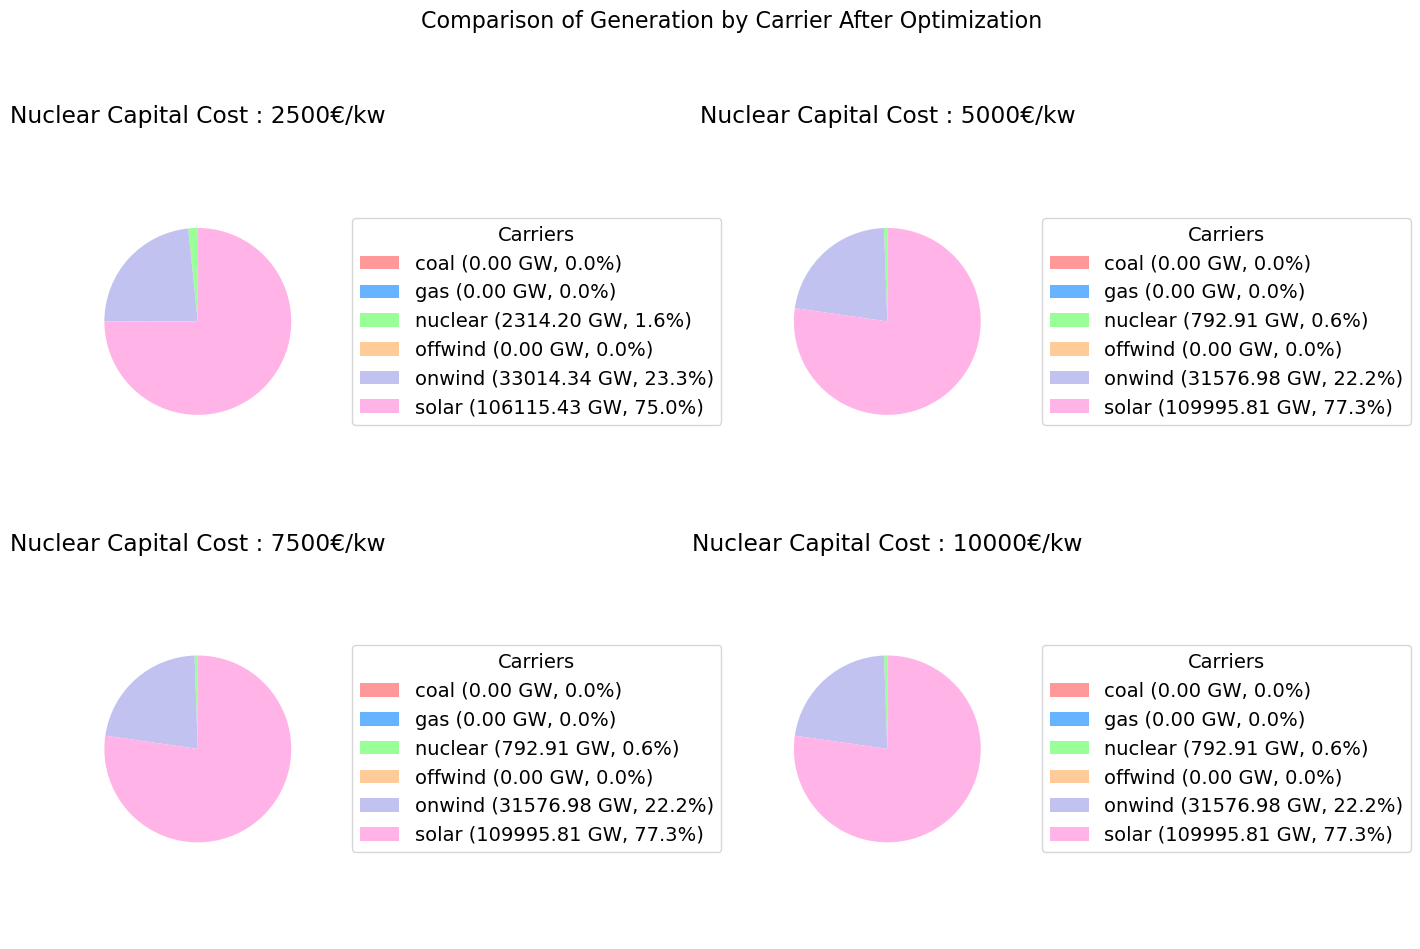

In [1011]:
def get_generation_by_carrier(network):
    generation = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum().sum()
    return generation

# Get generation by carrier for each network
gen_n2 = get_generation_by_carrier(n2)
gen_n3 = get_generation_by_carrier(n3)
gen_n4 = get_generation_by_carrier(n4)
gen_n5 = get_generation_by_carrier(n5)

# Define colors for the pie charts
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Create the figure and subplots for the pie charts
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Main title for the figure
fig.suptitle('Comparison of Generation by Carrier After Optimization', fontsize=16)

# Function to plot a pie chart
def plot_pie(ax, generation, title):
    wedges, texts = ax.pie(generation, labels=None, startangle=90, colors=colors)
    ax.set_title(title)
    ax.axis('equal')  # Ensure the pie chart is circular
    # Create legend labels with values and percentages
    total_gen = generation.sum()
    legend_labels = [f'{carrier} ({gen/1e3:.2f} GW, {gen/total_gen:.1%})' for carrier, gen in generation.items()]
    ax.legend(wedges, legend_labels, title="Carriers", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot the pie charts for each network
plot_pie(axs[0, 0], gen_n2, 'Nuclear Capital Cost : 2500€/kw')
plot_pie(axs[0, 1], gen_n3, 'Nuclear Capital Cost : 5000€/kw')
plot_pie(axs[1, 0], gen_n4, 'Nuclear Capital Cost : 7500€/kw')
plot_pie(axs[1, 1], gen_n5, 'Nuclear Capital Cost : 10000€/kw')

# Adjust the layout to make room for the legend
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()